In [1]:
# System
import os
from collections import defaultdict
import csv
import re
import progressbar

# Data Analysis
import pandas
import tabulate
import seaborn
import numpy
import matplotlib.pyplot as plt

# Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Short hack for display of images in jupyter notebook

from IPython.display import display, HTML
display(HTML("<style>div.output_area pre {white-space: pre;}</style>"))

In [2]:
FIGS_DIR = "figs"
def save_figure(fig, ext=".png"):
    """Stores @p fig at `figs/fig.@ext`"""
    tgt_dir = os.path.join(DATA_SOURCE, FIGS_DIR)
    tgt = os.path.join(tgt_dir, fig + ext)    
    if not os.path.exists(tgt_dir):
        os.makedirs(tgt_dir)
    print(f"Saving to {tgt}")
    if ext == ".png":
        plt.savefig(tgt, backend="cairo", bbox_inches="tight", pad_inches=0.2)
    else:
        plt.savefig(tgt, bbox_inches="tight", pad_inches=0.2)

In [3]:
DATA_DIR = "./data/"
for experiment_dir in os.listdir(DATA_DIR):
    full_path = os.path.join(DATA_DIR, experiment_dir)
    if os.path.isdir(full_path):
        print(f'DATA_SOURCE = "{full_path}"')

DATA_SOURCE = "./data/experiments-09-18"
DATA_SOURCE = "./data/experiments-09-19"
DATA_SOURCE = "./data/experiments-09-21"
DATA_SOURCE = "./data/experiments-09-23"


In [4]:
DATA_SOURCE = "./data/experiments-09-23"

## Creating DataFrame

In [5]:
ERR = -1
TIMEOUT = -1

def to_operation(src):
    op = src.split('-')[-1]
    if 'runtime' in op:
        return 'runtime'
    elif 'inter' in op:
        return 'intersection'
    elif 'union' in op:
        return 'union'
    elif 'construction' in op or 'conversion' in op:
        return 'transform'
    elif 'parsing' in op:
        return 'parsing'
    elif 'result' in op:
        return 'result'
    elif 'inclusion_check' == op or 'inclusion' == op:
        return 'inclusion'
    elif 'emptiness_check' == op or 'emptiness' == op:
        return 'emptiness'
    elif 'compl' == op or 'complementation' == op or 'complement' == op:
        return 'complement'
    elif 'trim' in op:
        return 'trim'
    print(f"{src} unhandled")
    assert False

def to_tool_and_lang(tool):
    if 'mata-bin' in tool:
        return None, None
    elif 'awali' in tool:
        return 'awali', 'c++'
    elif 'mona' in tool:
        return 'mona', 'c++'
    elif 'vata' in tool:
        return 'vata', 'c++'
    elif 'java-brics' in tool:
        return 'brics', 'java'
    elif 'java-automata' in tool:
        return '(j)alib', 'java'
    elif 'pyfado' in tool:
        return 'fado', 'python'
    elif 'pyautomata-lib' in tool:
        return '(py)alib', 'python'
    elif 'pymata' in tool:
        return '(py)mata', 'python'
    elif 'automata' in tool:
        return 'automata', 'c#'
    elif 'mata' in tool:
        return 'mata', 'c++'
    print(f"{tool} unhandled")
    assert False

def to_bench(bench):
    if 'automata_inclusion' in bench:
        return 'aut_inclusion'
    elif 'cox/diff' in bench:
        return 'bc_cox_diff'
    elif 'cox/inter' in bench:
        return 'bc_cox_inter'
    elif 'intersect' in bench:
        return 'bc_intersect'
    elif 'email_filter' in bench:
        return 'email_filter'
    elif 'z3-noodler' in bench:
        return 'z3_noodler'
    elif 'presburger' in bench:
        return 'presburger'
    print(f"{bench} unhandled")
    assert False

def to_value(val):
    val = val.strip()
    try:
        return float(val)
    except ValueError:
        pass
    if val in ['EMPTY', "NOT EMPTY"]:
        return val
    elif val in ('false', 'False'):
        return 'false'
    elif val in ('true', 'True'):
        return 'true'
    elif val == 'ERR':
        return 'ERR'
    elif val == 'MISSING':
        return numpy.NAN
    elif val == 'TIMEOUT' or val == 'TO':
        return TIMEOUT if TIMEOUT < 0 else -TIMEOUT
    print(f"{val} unhandled")
    assert False

In [6]:
HEADERS = ["bench", "input", "tool", "lang", "op", "time"]
TIMEOUT = -60
TIMEOUT_REGEX = re.compile("timeout-(\d+)")
processed = defaultdict(set)
def to_pandas(src_dir):
    global TIMEOUT
    data = []
    for csv_source in progressbar.progressbar(os.listdir(src_dir)):
        if csv_source.endswith('.csv'):
            if timeout := TIMEOUT_REGEX.search(csv_source):
                TIMEOUT = int(timeout.group(1))
            with open(os.path.join(src_dir, csv_source), 'r', newline='') as csvfile:
                try:
                    csv_reader = csv.reader(csvfile, delimiter=';')
                    head = next(csv_reader)
                    for row in csv_reader:
                        bench = to_bench(row[0]) # bench
                        inputs = row[0] # inputs
                        for i, val in enumerate(row[1:], 1):
                            tool, lang = to_tool_and_lang(head[i]) # tool, lang
                            if not tool:
                                continue
                            op = to_operation(head[i]) # op
                            val = to_value(val)
                            data.append([bench, inputs, tool, lang, op, val])
                except StopIteration:
                    pass
    return pandas.DataFrame(data, columns=HEADERS)
df = to_pandas(DATA_SOURCE)
print(df)

100% (7 of 7) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00


              bench                                              input  \
0       bc_cox_diff  /home/experiments/nfa-bench/benchmarks/bool_co...   
1       bc_cox_diff  /home/experiments/nfa-bench/benchmarks/bool_co...   
2       bc_cox_diff  /home/experiments/nfa-bench/benchmarks/bool_co...   
3       bc_cox_diff  /home/experiments/nfa-bench/benchmarks/bool_co...   
4       bc_cox_diff  /home/experiments/nfa-bench/benchmarks/bool_co...   
...             ...                                                ...   
15855  bc_intersect  /home/experiments/nfa-bench/benchmarks/bool_co...   
15856  bc_intersect  /home/experiments/nfa-bench/benchmarks/bool_co...   
15857  bc_intersect  /home/experiments/nfa-bench/benchmarks/bool_co...   
15858  bc_intersect  /home/experiments/nfa-bench/benchmarks/bool_co...   
15859  bc_intersect  /home/experiments/nfa-bench/benchmarks/bool_co...   

           tool  lang            op      time  
0      automata    c#       runtime       ERR  
1          mata

In [22]:
def to_table(df, rows, aggregation, trim_rows=False, trimsize=5):
    tools = ['mata', 'awali', 'mona', 'vata',  'automata', 'brics', '(j)alib', 'fado', '(py)alib', '(py)mata']
    tools = [t for t in tools if t in set(df['tool'])]
    data = {
        grp: [grp[:trimsize] if trim_rows else grp] + ['-' for i in range(len(tools))] for grp in set(df[rows]) if grp != 'result' and 'result' not in grp
    }
    for grp, series in df.groupby([rows, 'tool'] if not isinstance(rows, list) else rows + tools):
        if grp[0] == 'result' or 'result' in grp[0]:
            continue
        vals = aggregation(series['time'])
        data[grp[0]][tools.index(grp[1]) + 1] = ", ".join(vals)
    return tabulate.tabulate(
        sorted(data.values()), headers=[rows] + tools
    )

def to_printable_table(table, title):
    table_len = len(table.split('\n')[1])
    printable = title.center(table_len) + "\n"
    printable += "-" * table_len + "\n"
    printable += table
    return printable

def print_table(table, title):
    printable = to_printable_table(table, title)
    print(printable)

def save_table(table, title, filename):
    tgt_dir = os.path.join(DATA_SOURCE, FIGS_DIR)
    tgt = os.path.join(tgt_dir, filename)    
    printable = to_printable_table(table, title)
    with open(tgt, 'w') as table_h:
        table_h.write(printable)
    print(f"Saved to {tgt}")
    

In [23]:
## Mean, Median Mean with timeouts/errors
def mean_med_overall(series):
    times = [t for t in series if  (isinstance(t, float) or isinstance(t, int)) and t >= 0]
    times_with_timeout = [t if (isinstance(t, float) or isinstance(t, int)) and t >= 0 else TIMEOUT for t in series]
    mean = round(numpy.mean(times or [-1]), 1)
    mean_with_timeouts = round(numpy.mean(times_with_timeout or [-1]), 1)
    median = round(numpy.median(times or [-1]), 1)
    return (
        f"{mean:0.1f}" if mean != -1 else f"{'-':<4}", 
        f"{median:0.1f}" if median != -1 else f"{'-':<5}", 
        f"{mean_with_timeouts:0.1f}" if mean != -1 else f"{'-':<4}"
    )
table = to_table(df, 'op', mean_med_overall, trim_rows=True)
print_table(table, "Average / Median / Average with Timeouts")
print()
save_table(table, "Average / Median / Average with Timeouts", "avg-med-avgt.txt")

                                                               Average / Median / Average with Timeouts                                                              
---------------------------------------------------------------------------------------------------------------------------------------------------------------------
op     mata             awali            vata             automata         brics             (j)alib             fado               (py)alib          (py)mata
-----  ---------------  ---------------  ---------------  ---------------  ----------------  ------------------  -----------------  ----------------  ---------------
empti  0.0, 0.0, 294.0  0.1, 0.0, 294.0  0.5, 0.0, 294.2  0.0, 0.0, 294.0  0.0, 0.0, 295.9   0.0, 0.0, 358.3     0.0, 0.0, 326.2    0.1, 0.0, 377.0   0.0, 0.0, 294.0
inter  1.8, 0.1, 317.4  1.2, 0.1, 294.5  1.8, 0.1, 292.3  8.8, 3.3, 297.6  7.5, 3.4, 298.9   4.3, 0.2, 359.5     95.6, 26.3, 359.4  7.5, 0.2, 378.9   5.4, 1.7, 296.2
parsi  0.3,

In [24]:
## Finished, Errors and Timeouts
def fin_err_tim(series):
    timeouts = [a for a in series if (isinstance(a, float) or isinstance(a, int)) and a < 0 and not numpy.isnan(a) and a != 'ERR']
    errors = [a for a in series if a == 'ERR']
    times = [t for t in series if  (isinstance(t, float) or isinstance(t, int)) and t >= 0]
    return (
        f"{len(times):}",
        f"{len(errors):}",
        f"{len(timeouts):}"
    )
table = to_table(df[df['op'] == 'runtime'], 'bench', fin_err_tim)
print_table(table, "Finished / Errors / Timeouts")
print()
save_table(table, "Finished / Errors / Timeouts", "fin-err-to.txt")

                                               Finished / Errors / Timeouts                                               
--------------------------------------------------------------------------------------------------------------------------
bench         mata        awali       vata        automata     brics        (j)alib     fado        (py)alib    (py)mata
------------  ----------  ----------  ----------  -----------  -----------  ----------  ----------  ----------  ----------
bc_cox_diff   40, 35, 5   40, 40, 0   40, 28, 12  40, 40, 0    40, 40, 0    0, 2, 78    0, 6, 74    0, 80, 0    40, 33, 7
bc_cox_inter  40, 40, 0   40, 40, 0   40, 16, 24  40, 40, 0    40, 40, 0    0, 6, 74    0, 4, 76    0, 79, 1    40, 40, 0
bc_intersect  30, 157, 0  30, 157, 0  30, 157, 0  30, 138, 19  29, 137, 21  53, 70, 64  65, 6, 115  46, 52, 88  30, 157, 0

Saved to ./data/experiments-09-23/figs/fin-err-to.txt


In [25]:
## First, Second, Third Quartiles
def quartiles(series):
    times = [t if (isinstance(t, float) or isinstance(t, int)) and t >= 0 else TIMEOUT for t in series]
    first = numpy.quantile(times, 0.25)
    second = numpy.quantile(times, 0.5)
    third = numpy.quantile(times, 0.75)
    iqr = third - first
    return (
        f"{first:0.1f}" if first < TIMEOUT else f"{TIMEOUT}", 
        f"{second:0.1f}" if second < TIMEOUT else f"{TIMEOUT}", 
        f"{third:0.1f}" if third < TIMEOUT else f"{TIMEOUT}"
    )
table = to_table(df, 'bench', quartiles, trim_rows=True)
print_table(table, "1st Quartile / Median / 3rd Quartile")
print()
save_table(table, "1st Quartile / Median / 3rd Quartile", "quartiles.txt")

                                                        1st Quartile / Median / 3rd Quartile                                                        
----------------------------------------------------------------------------------------------------------------------------------------------------
bench    mata           awali           vata           automata       brics          (j)alib          fado            (py)alib       (py)mata
-------  -------------  --------------  -------------  -------------  -------------  ---------------  --------------  -------------  ---------------
bc_co    0.1, 2.4, 500  0.1, 0.6, 12.8  0.1, 2.5, 500  0.0, 1.3, 500  0.1, 8.6, 500  500, 500, 500    500, 500, 500   500, 500, 500  0.0, 1.5, 143.7
bc_co    0.1, 3.7, 500  0.1, 0.6, 13.6  0.1, 0.7, 500  0.0, 1.4, 500  0.1, 8.0, 500  500, 500, 500    500, 500, 500   500, 500, 500  0.0, 1.5, 146.2
bc_in    500, 500, 500  500, 500, 500   500, 500, 500  500, 500, 500  500, 500, 500  494.5, 500, 500  33.2, 500, 

In [26]:
## First, Second, Third Quartiles
def quartiles(series):
    times = [t if (isinstance(t, float) or isinstance(t, int)) and t >= 0 else TIMEOUT for t in series]
    first = numpy.quantile(times, 0.25)
    second = numpy.quantile(times, 0.5)
    third = numpy.quantile(times, 0.75)
    iqr = third - first
    return (
        f"{first:0.1f}" if first < TIMEOUT else f"{TIMEOUT}", 
        f"{second:0.1f}" if second < TIMEOUT else f"{TIMEOUT}", 
        f"{third:0.1f}" if third < TIMEOUT else f"{TIMEOUT}"
    )
table = to_table(df, 'op', quartiles, trim_rows=True)
print_table(table, "1st Quartile / Median / 3rd Quartile per operation")
print()
save_table(table, "1st Quartile / Median / 3rd Quartile per operation", "quartiles-op.txt")

                                                  1st Quartile / Median / 3rd Quartile per operation                                                 
-----------------------------------------------------------------------------------------------------------------------------------------------------
op     mata           awali           vata            automata        brics           (j)alib          fado             (py)alib       (py)mata
-----  -------------  --------------  --------------  --------------  --------------  ---------------  ---------------  -------------  --------------
empti  0.0, 500, 500  0.0, 500, 500   0.0, 500, 500   0.0, 500, 500   0.0, 500, 500   0.0, 500, 500    0.0, 500, 500    500, 500, 500  0.0, 500, 500
inter  0.7, 500, 500  0.1, 500, 500   0.1, 500, 500   6.3, 500, 500   6.0, 500, 500   1.8, 500, 500    120.5, 500, 500  500, 500, 500  3.6, 500, 500
parsi  0.4, 500, 500  0.3, 500, 500   0.4, 500, 500   -               -               -                -    

In [27]:
## First, Second, Third Quartiles
def quartiles(series):
    times = [t if (isinstance(t, float) or isinstance(t, int)) and t >= 0 else TIMEOUT for t in series]
    first = numpy.quantile(times, 0.25)
    second = numpy.quantile(times, 0.5)
    third = numpy.quantile(times, 0.75)
    iqr = third - first
    return (
        f"{first:0.1f}" if first < TIMEOUT else f"{TIMEOUT}", 
        f"{second:0.1f}" if second < TIMEOUT else f"{TIMEOUT}", 
        f"{third:0.1f}" if third < TIMEOUT else f"{TIMEOUT}"
    )
df['benchop'] = [f"{o[:5]}/{''.join(a[0] for a in b.split('_'))}" for b, o in zip(df['bench'], df['op'])]
table = to_table(df, 'benchop', quartiles, trim_rows=True, trimsize=9)
print_table(table, "1st Quartile / Median / 3rd Quartile per op/bench")
print()
save_table(table, "1st Quartile / Median / 3rd Quartile per op/bench", "quartiles-benchop.txt")

                                                        1st Quartile / Median / 3rd Quartile per op/bench                                                        
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
benchop    mata             awali            vata             automata         brics             (j)alib          fado             (py)alib       (py)mata
---------  ---------------  ---------------  ---------------  ---------------  ----------------  ---------------  ---------------  -------------  ---------------
empti/bcd  0.0, 0.0, 0.0    0.0, 0.0, 0.1    0.0, 0.7, 1.6    0.0, 0.0, 0.0    0.0, 0.0, 0.0     -                -                -              0.0, 0.0, 0.0
empti/bci  0.0, 0.0, 0.0    0.0, 0.0, 0.1    0.0, 0.0, 0.8    0.0, 0.0, 0.0    0.0, 0.0, 0.0     -                -                -              0.0, 0.0, 0.0
empti/bi   500, 500, 500    500, 500, 5

In [16]:
def sum_generator(series, timeout=None):
    """Cumulatively sums the @p series wrt @p timeout"""
    sum = 0
    series = sorted(
        [a if isinstance(a, float) else numpy.NAN for a in series['time']],
        key = lambda x: float('inf') if numpy.isnan(x) else x
    )
    for num in sorted(series):
        if timeout and num >= timeout:
            yield None
        else:
            sum += num
            yield sum

Saving to ./data/experiments-09-23/figs/cactus-plot-bc_cox_diff-emptiness.png
Saving to ./data/experiments-09-23/figs/cactus-plot-bc_cox_diff-intersection.png
Saving to ./data/experiments-09-23/figs/cactus-plot-bc_cox_diff-parsing.png
Saving to ./data/experiments-09-23/figs/cactus-plot-bc_cox_diff-result.png
Saving to ./data/experiments-09-23/figs/cactus-plot-bc_cox_diff-runtime.png
Saving to ./data/experiments-09-23/figs/cactus-plot-bc_cox_diff-transform.png
Saving to ./data/experiments-09-23/figs/cactus-plot-bc_cox_diff-trim.png
Saving to ./data/experiments-09-23/figs/cactus-plot-bc_cox_inter-emptiness.png
Saving to ./data/experiments-09-23/figs/cactus-plot-bc_cox_inter-intersection.png
Saving to ./data/experiments-09-23/figs/cactus-plot-bc_cox_inter-parsing.png
Saving to ./data/experiments-09-23/figs/cactus-plot-bc_cox_inter-result.png
Saving to ./data/experiments-09-23/figs/cactus-plot-bc_cox_inter-runtime.png
Saving to ./data/experiments-09-23/figs/cactus-plot-bc_cox_inter-transfo

/tmp/ipykernel_1199/3546106254.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15, 8))


Saving to ./data/experiments-09-23/figs/cactus-plot-bc_intersect-trim.png


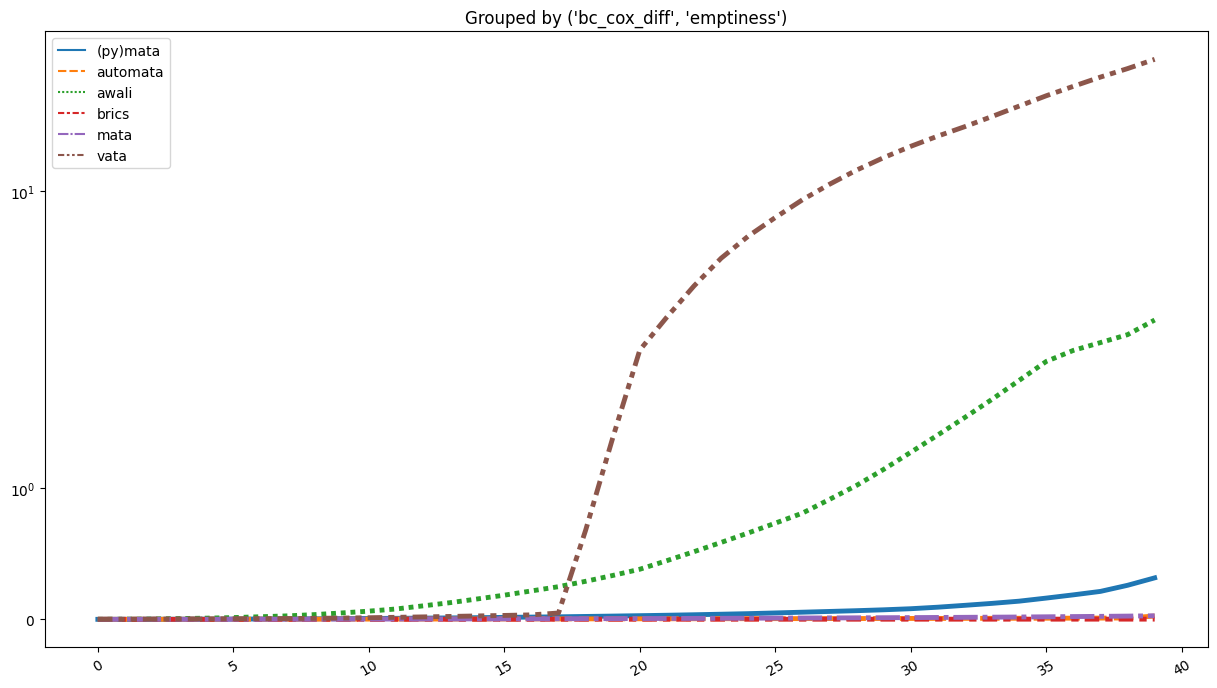

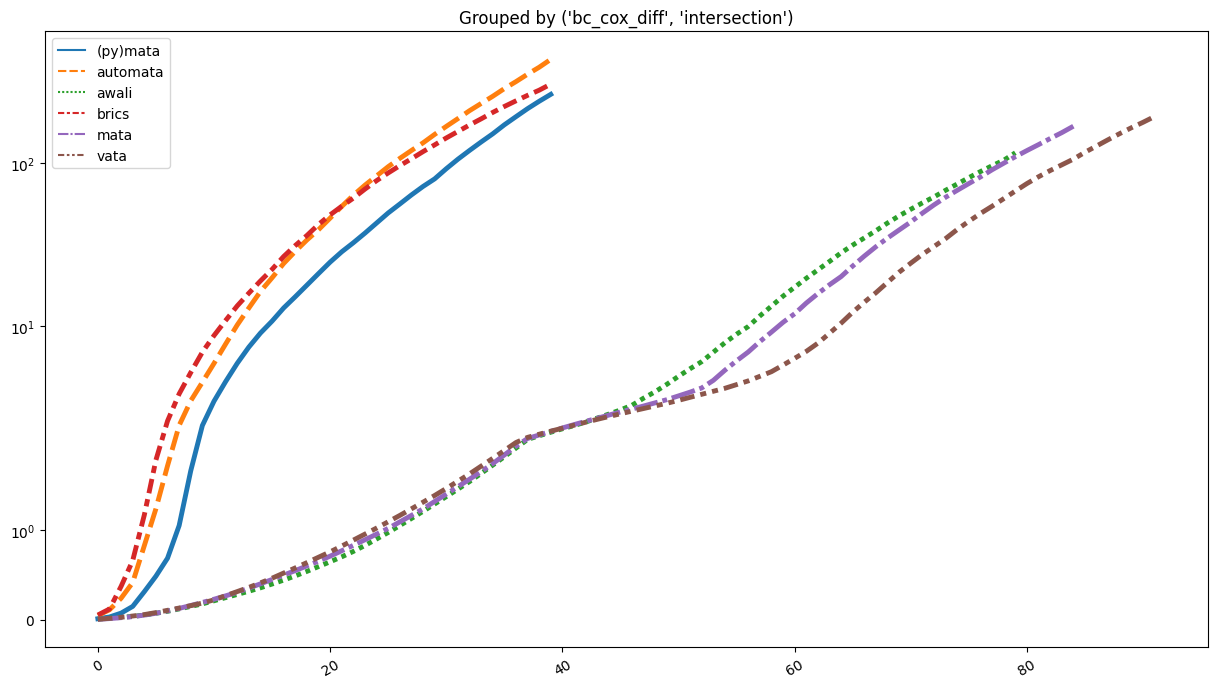

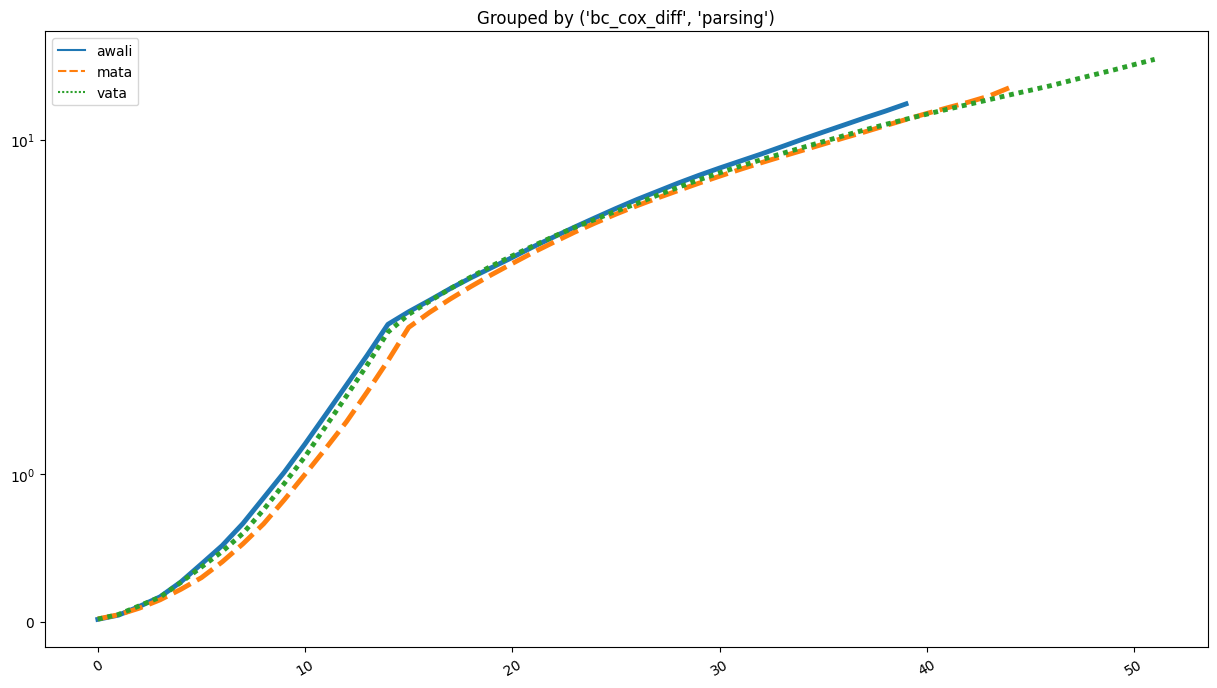

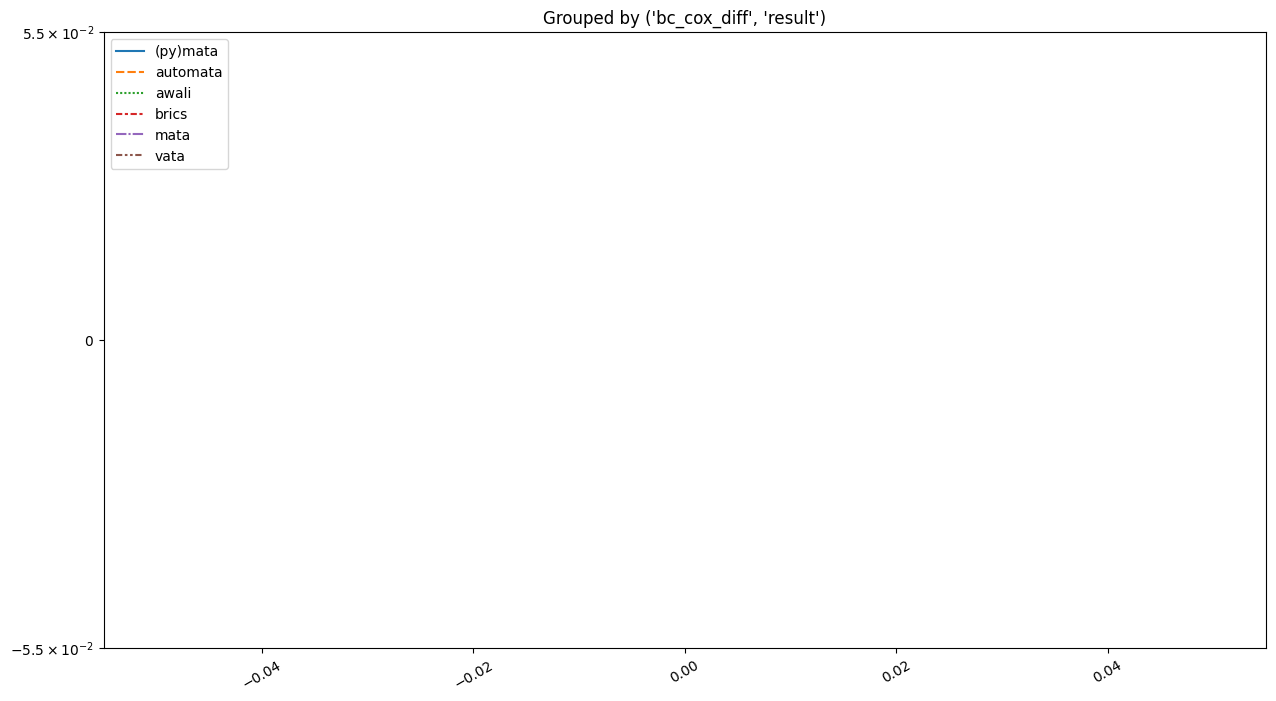

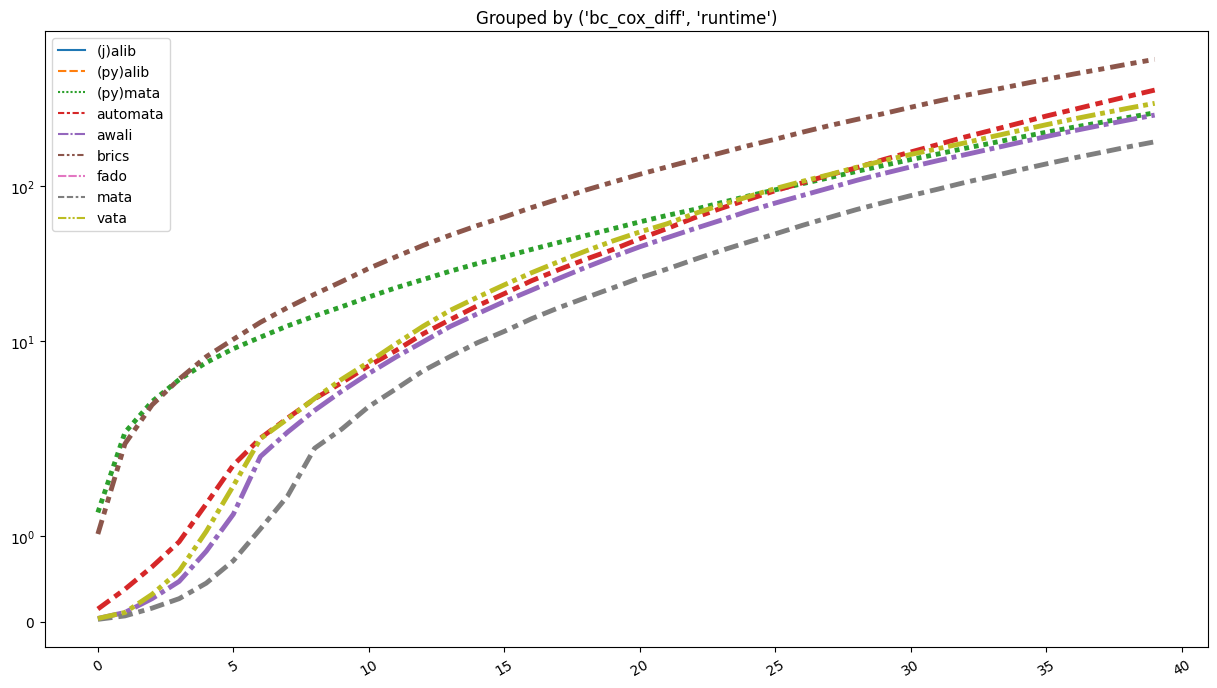

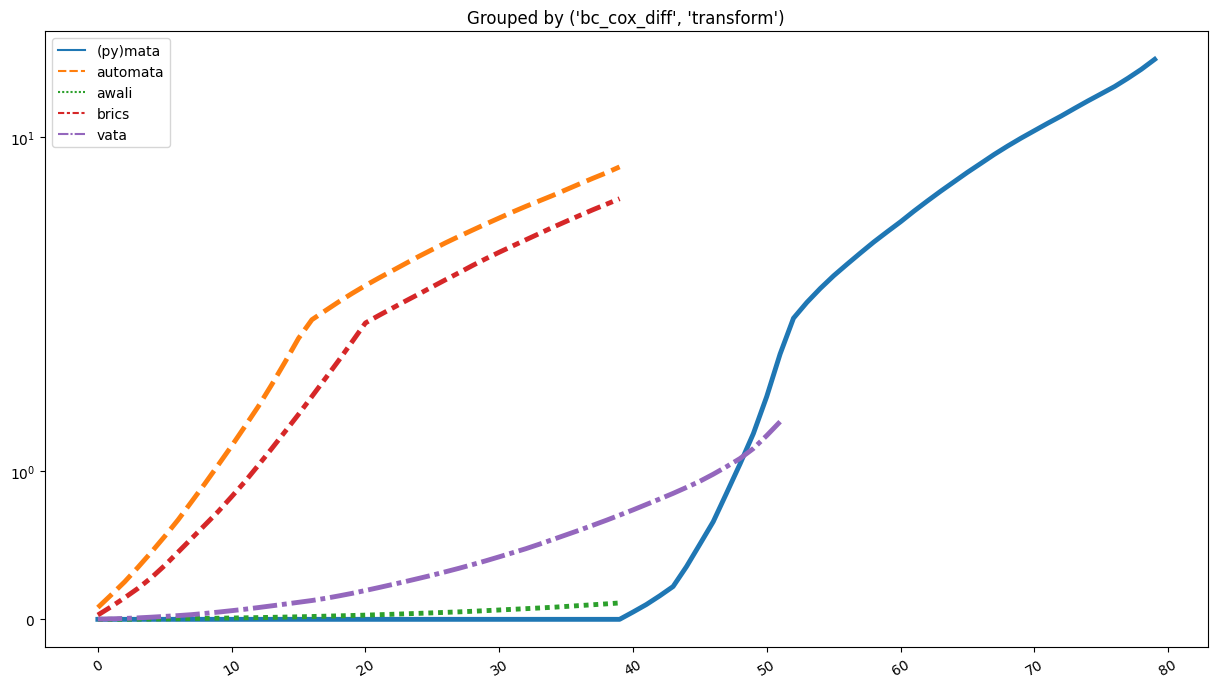

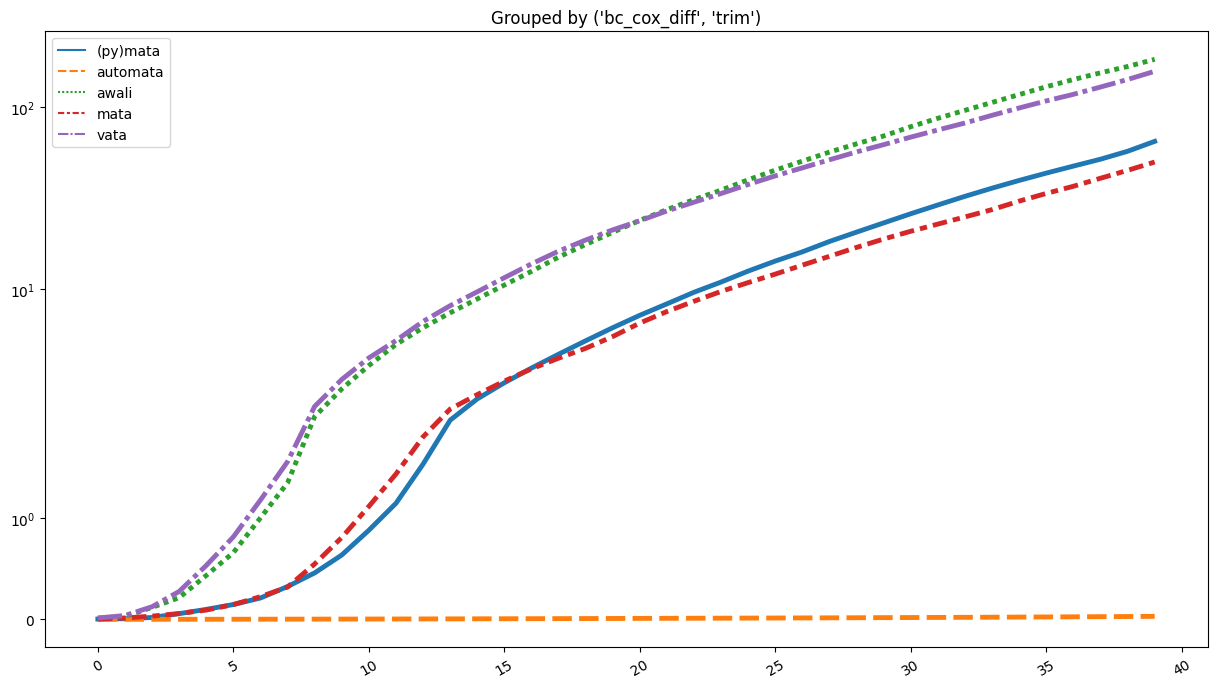

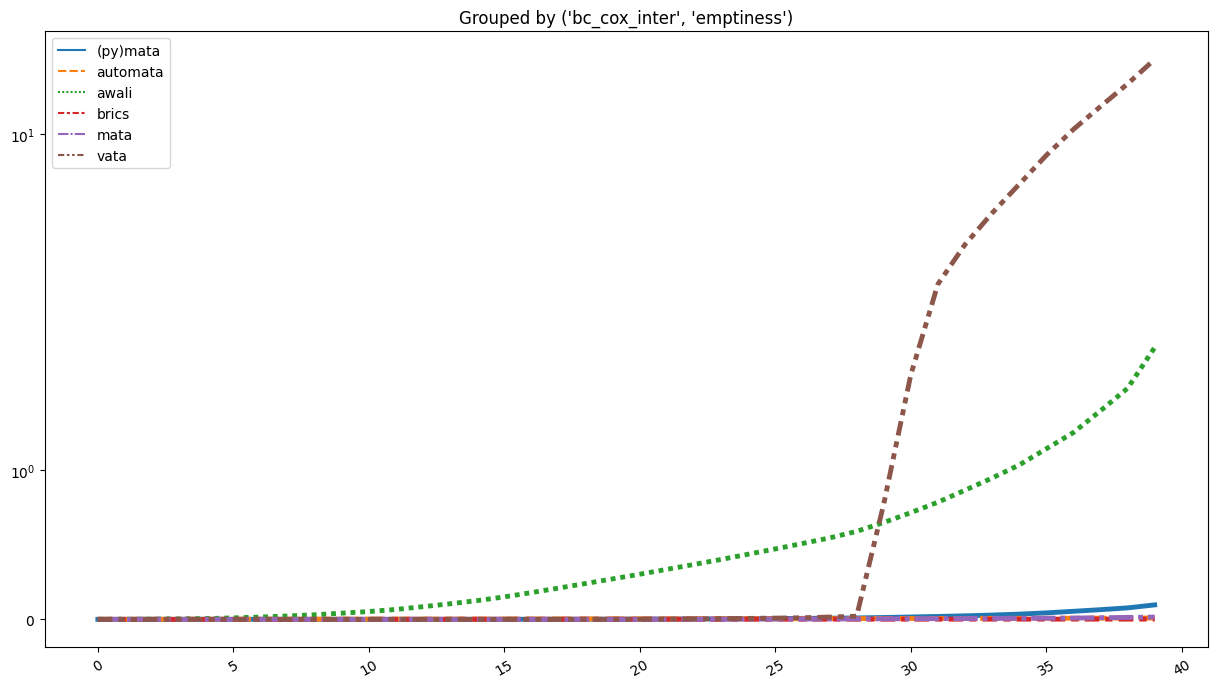

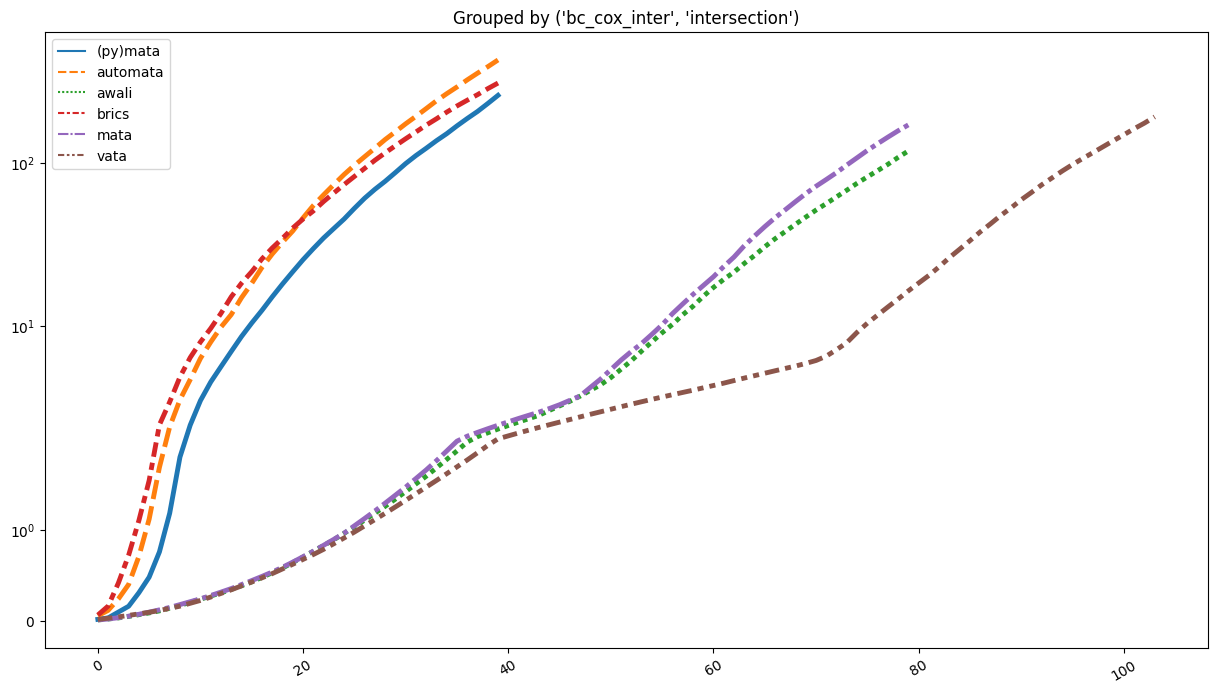

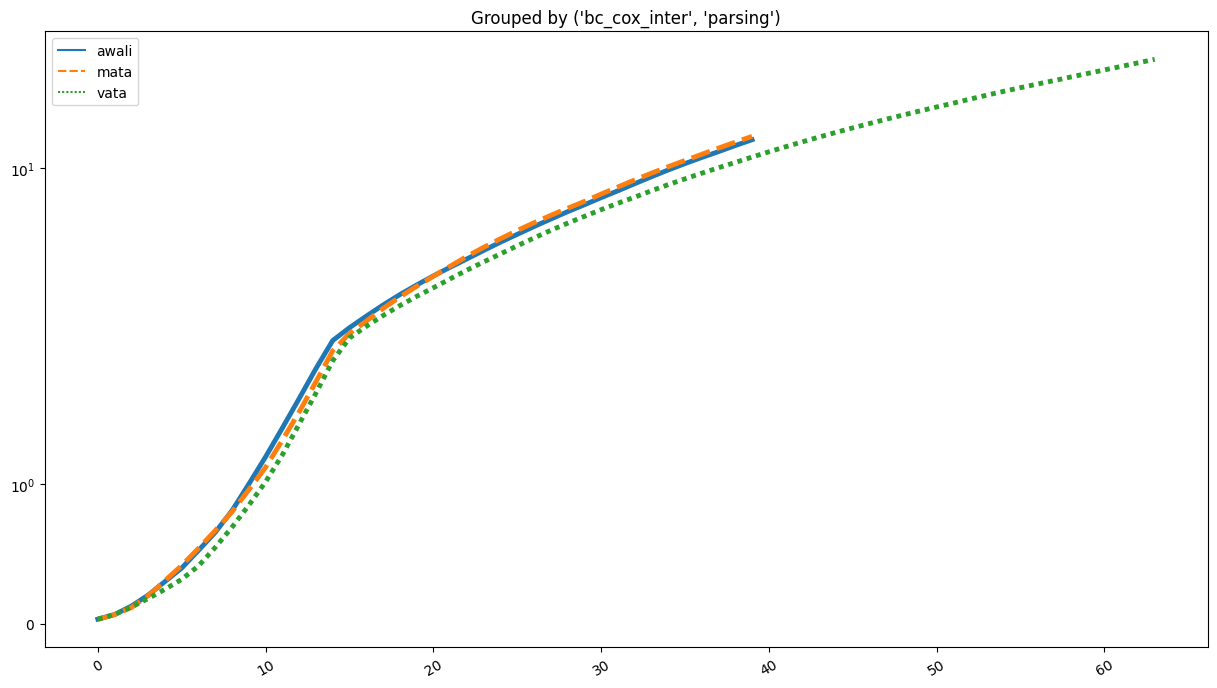

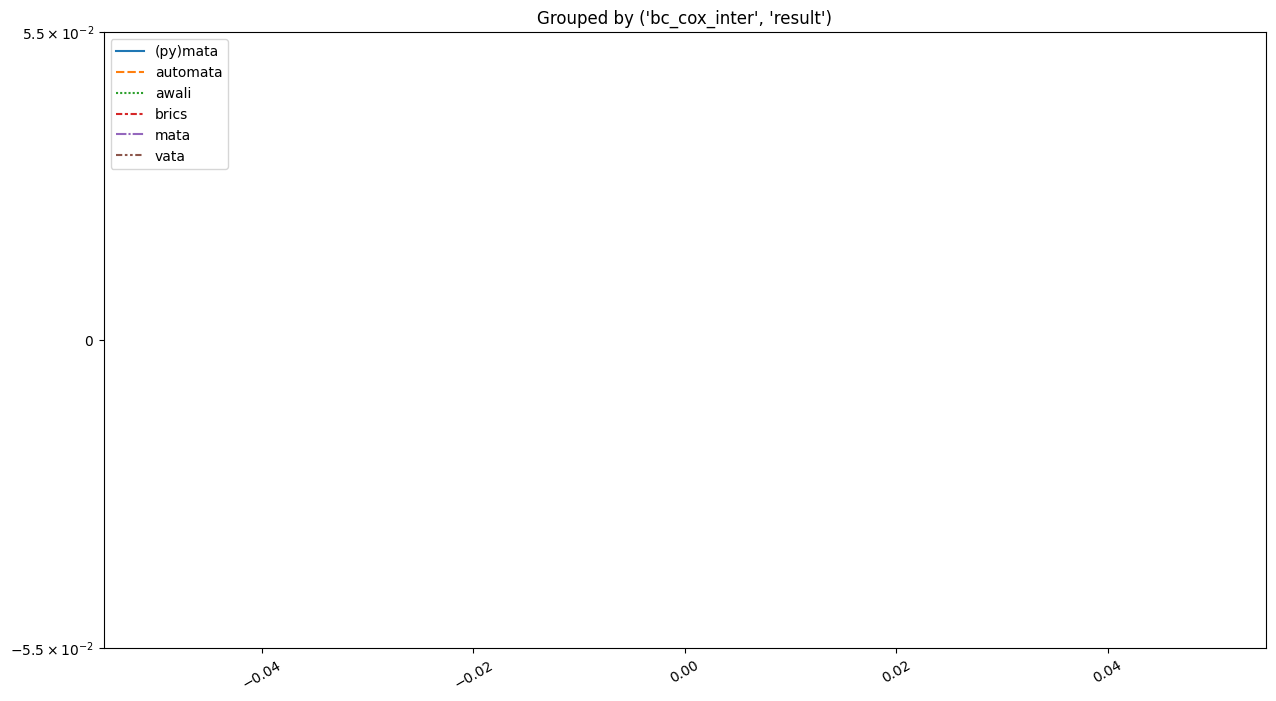

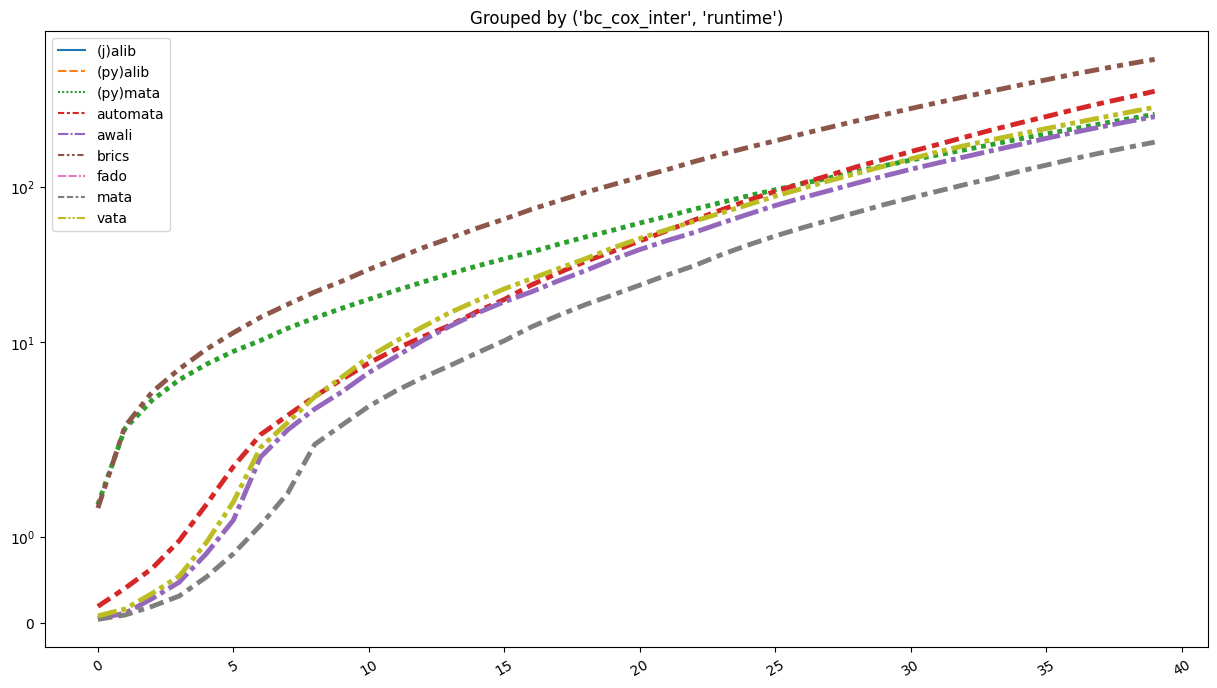

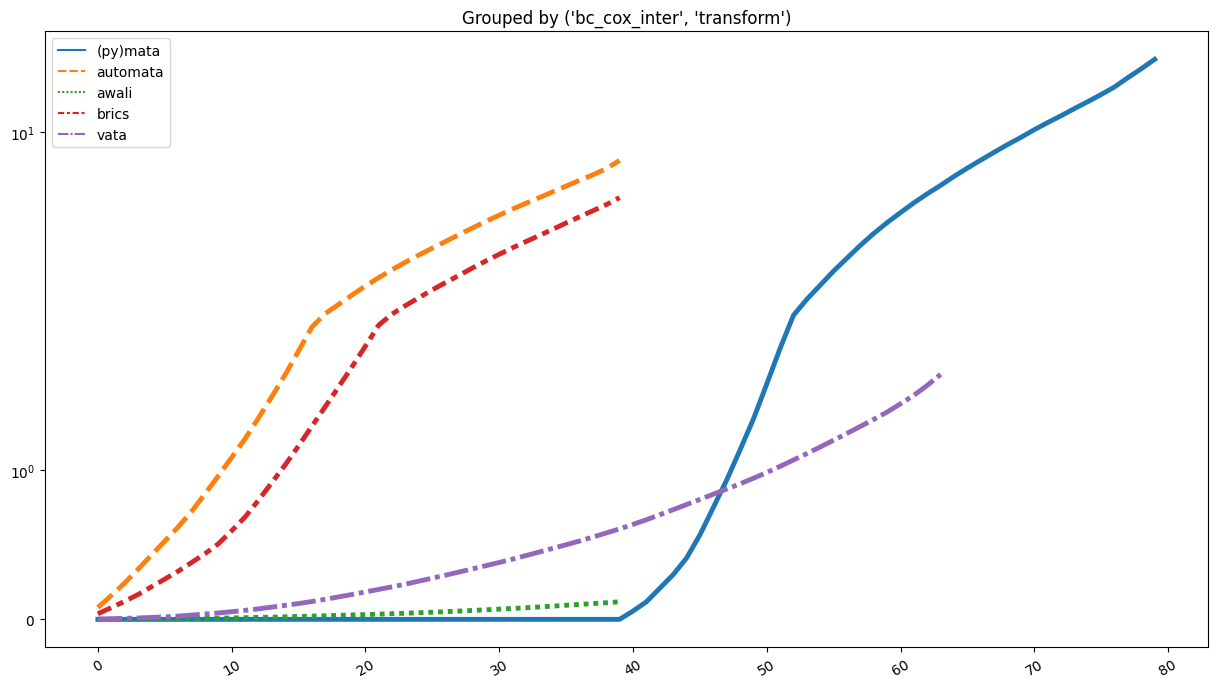

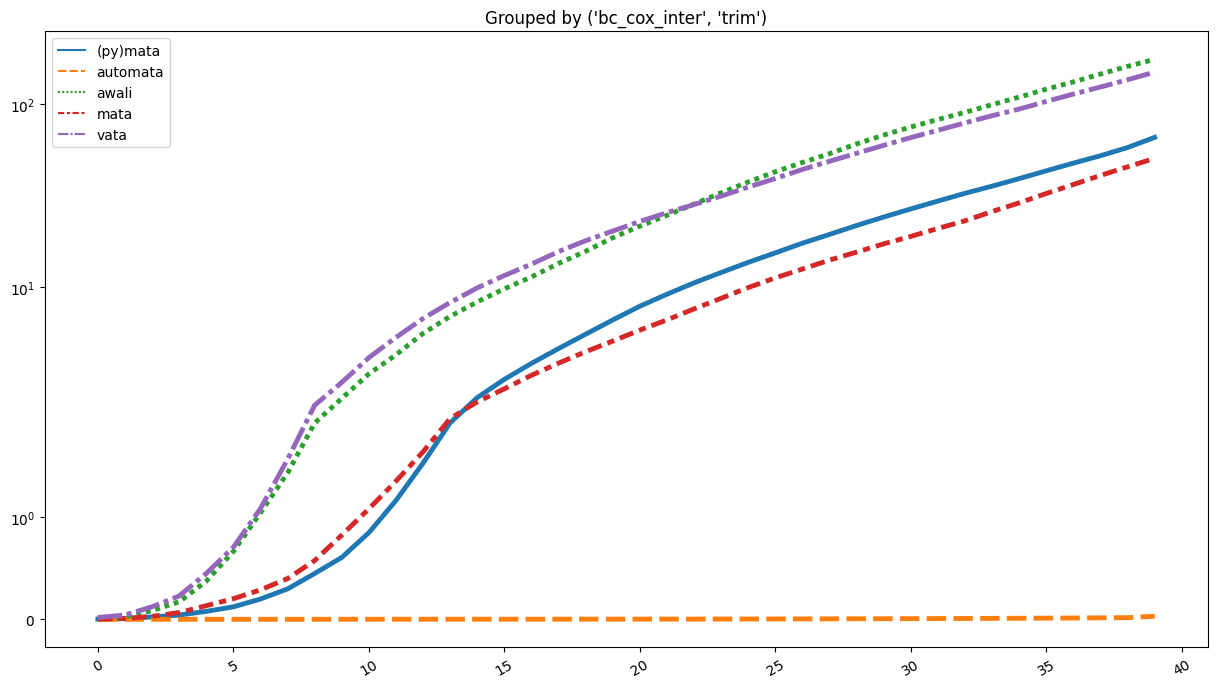

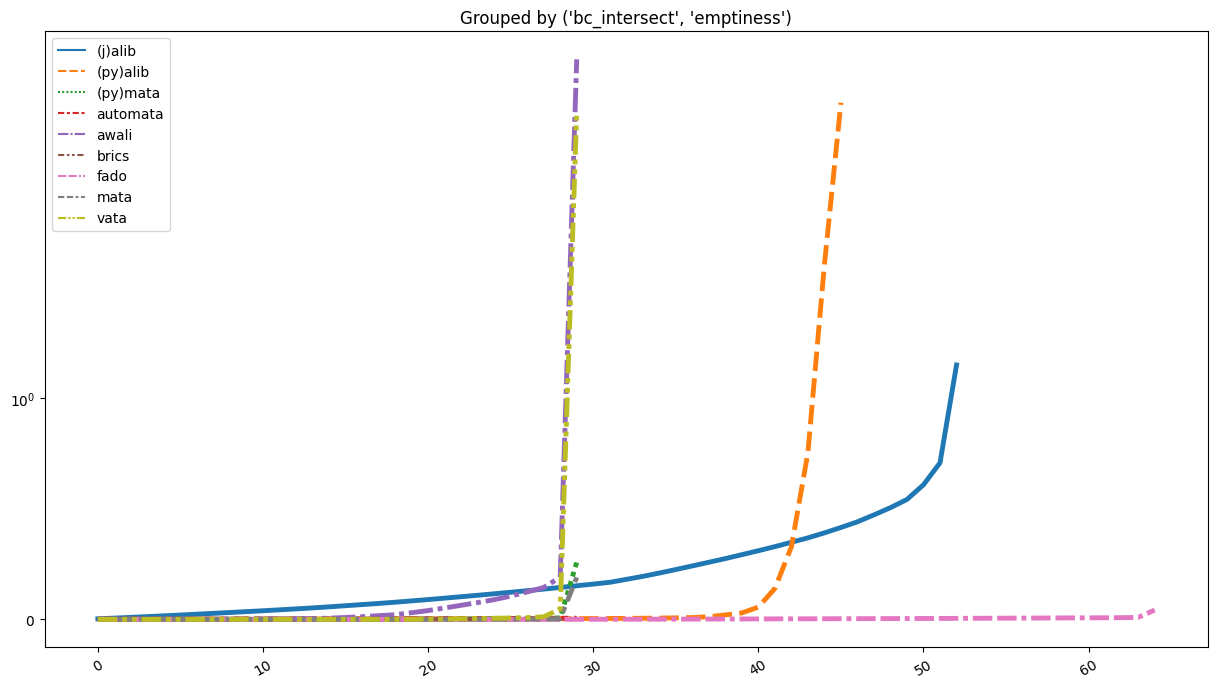

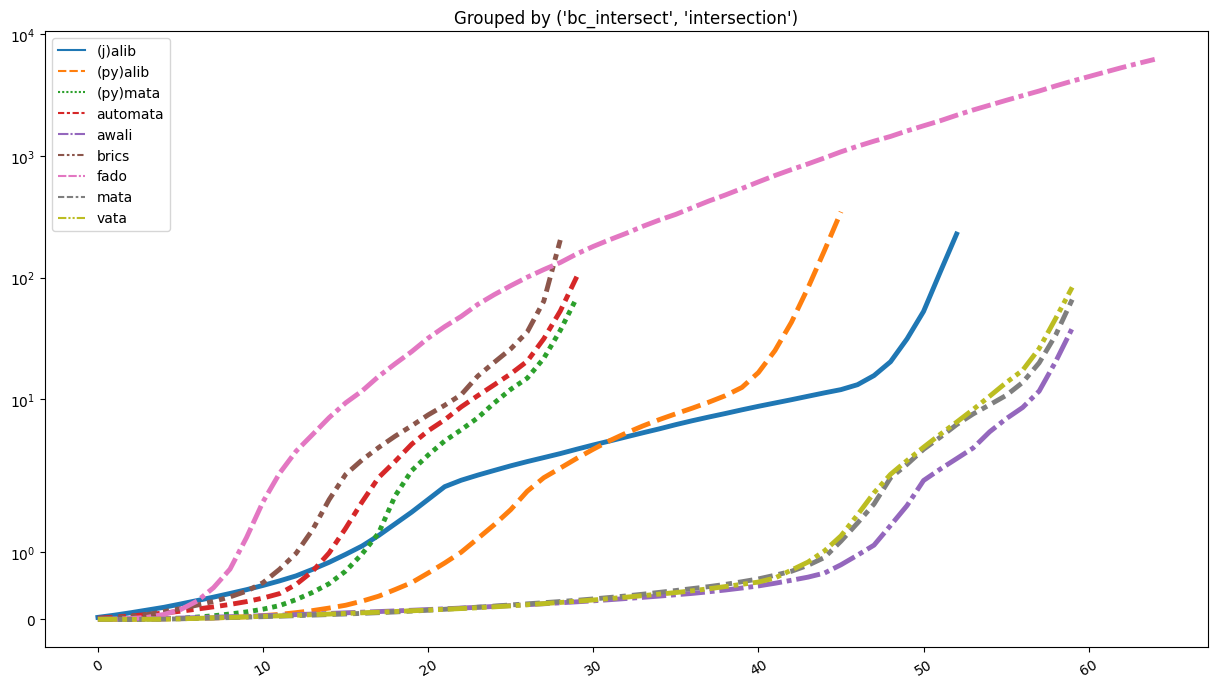

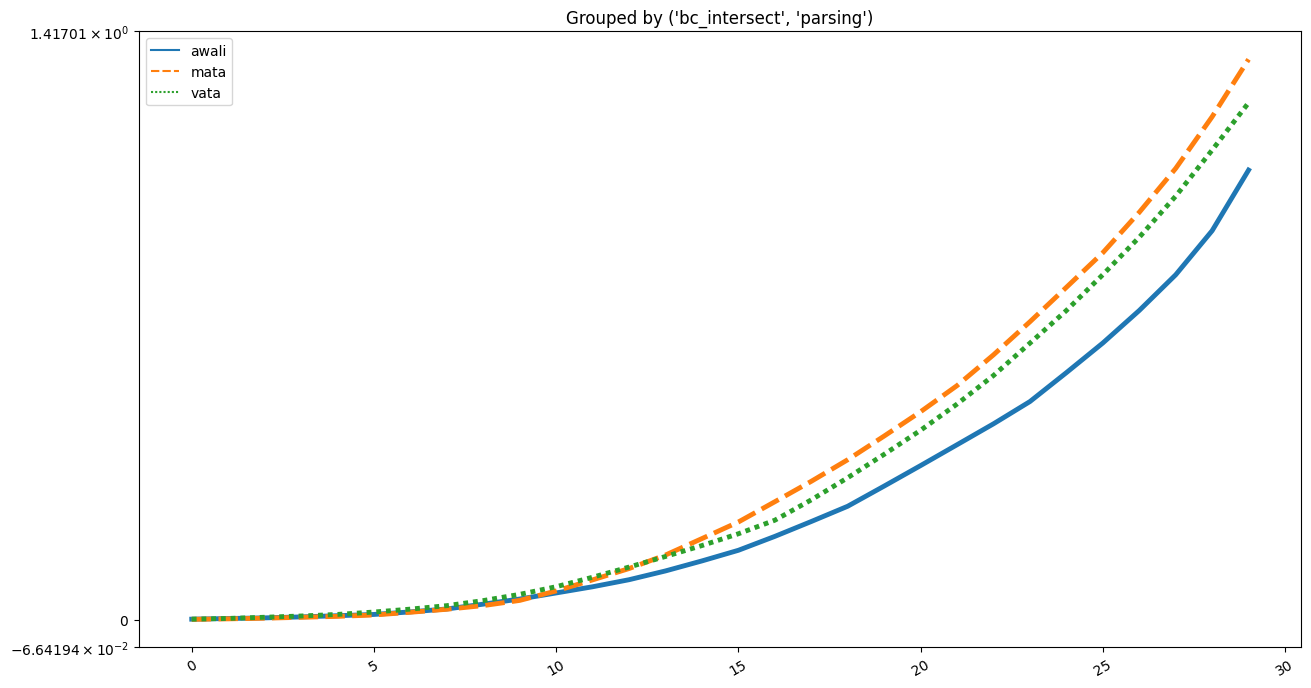

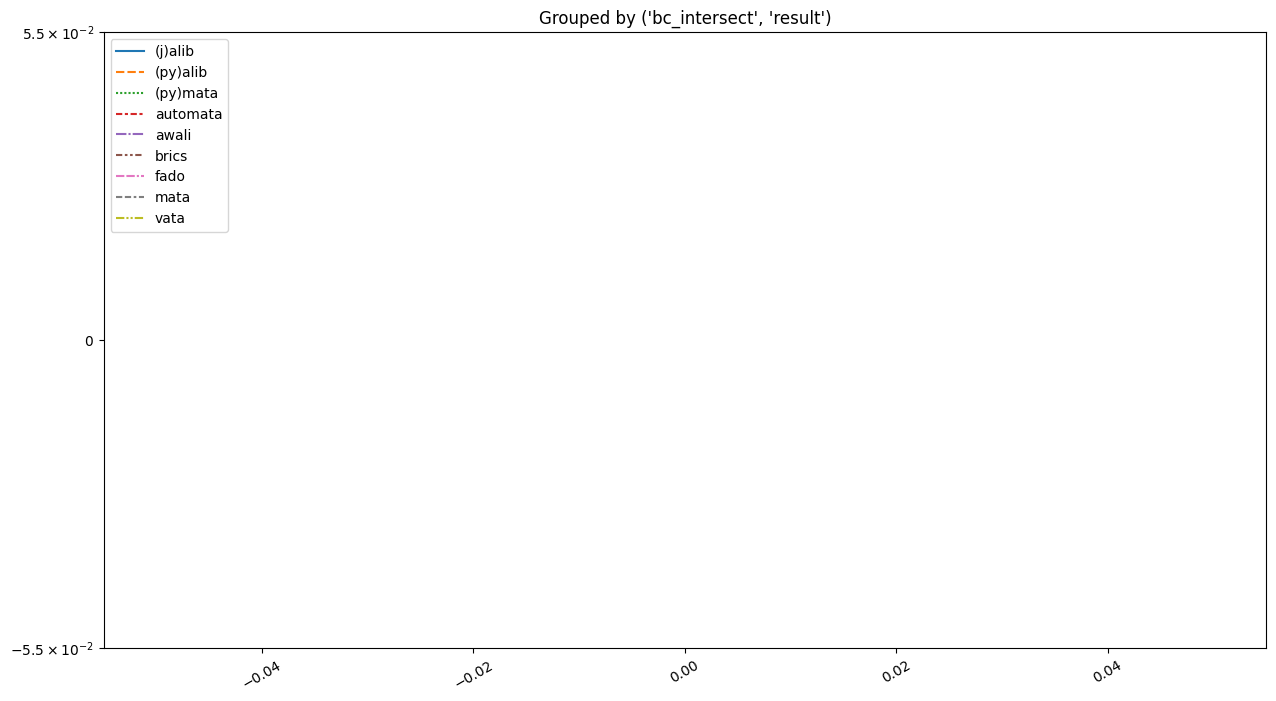

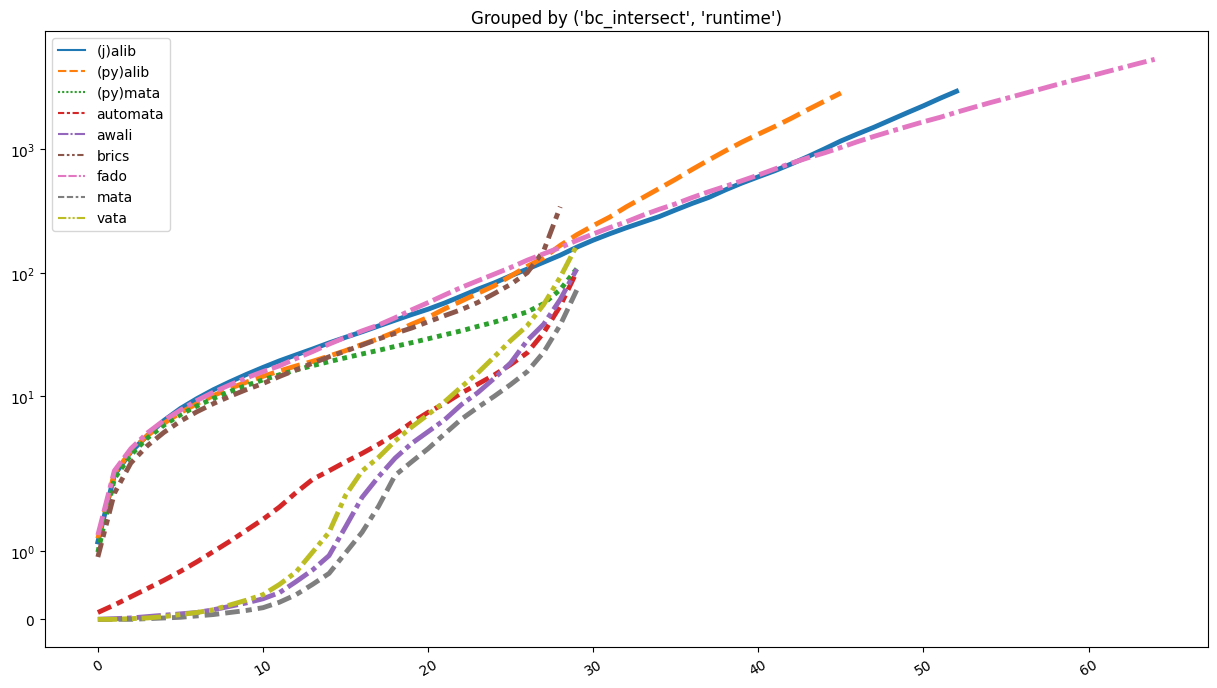

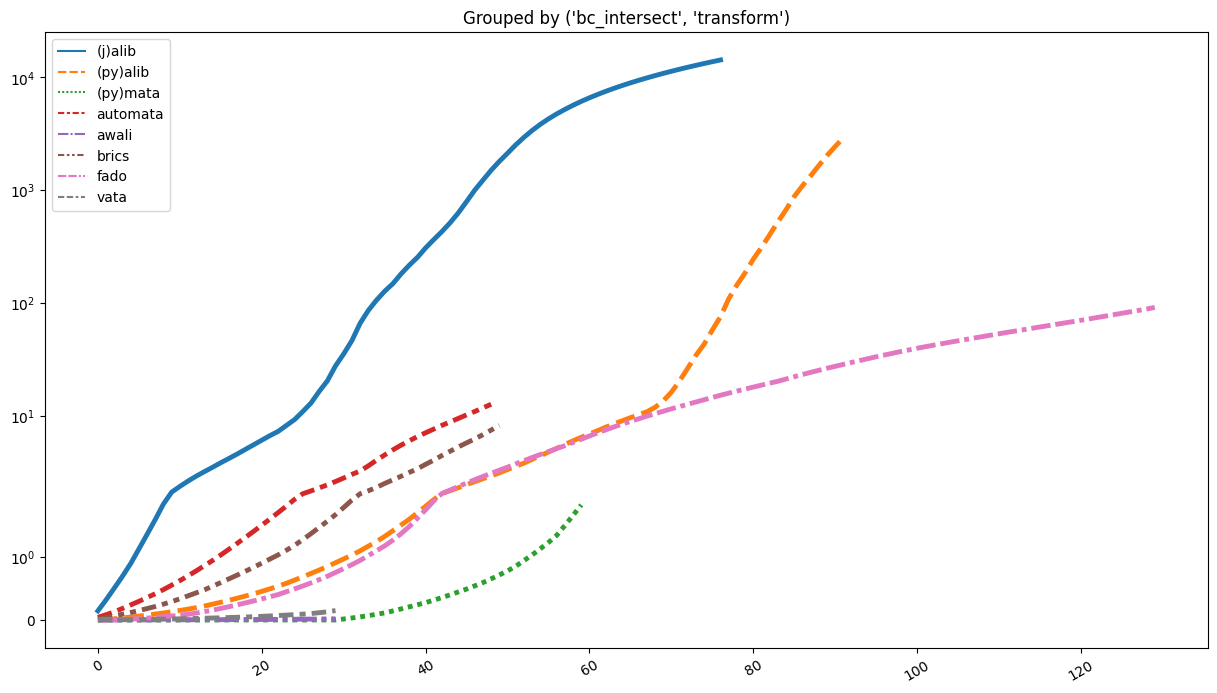

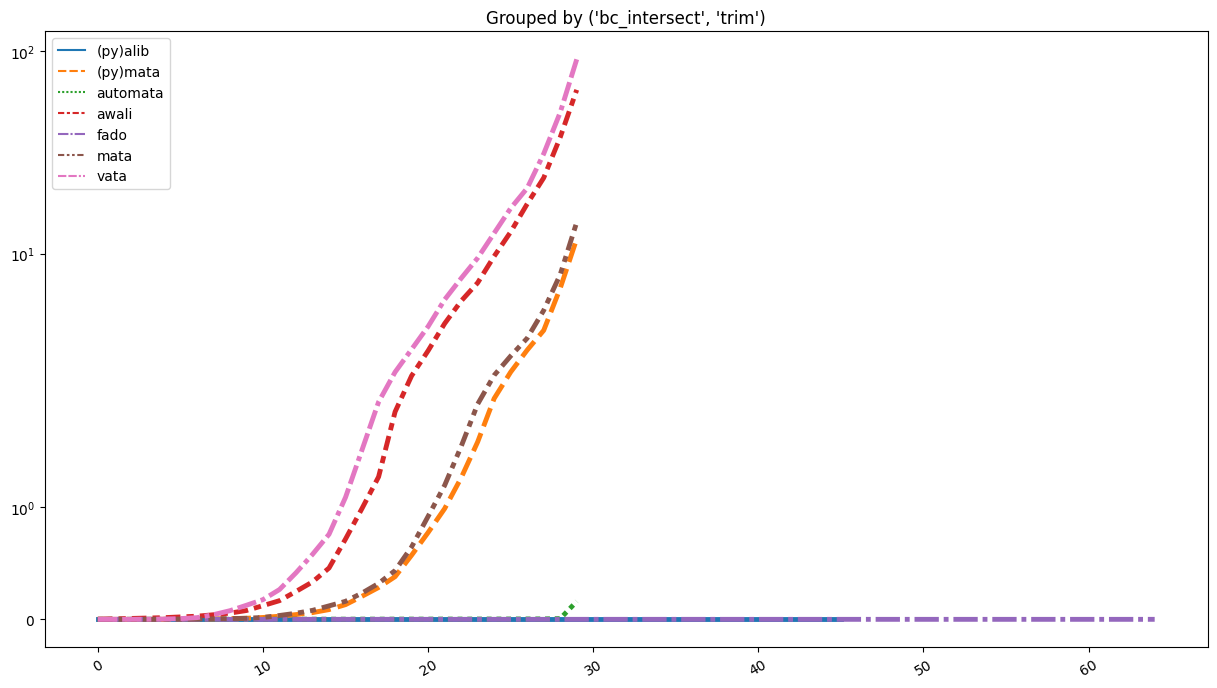

In [17]:
for grp, series in df.groupby(['bench', 'op']):
    plt.figure(figsize=(15, 8))
    data = {}
    for tool, values in series.groupby('tool'):
        data[tool] = list(sum_generator(values))
        
    g = seaborn.lineplot(
        data, linewidth=3.5
    )
    g.set(yscale="symlog")
    g.set_xticklabels(g.get_xticklabels(), rotation=30)
    g.set_title(f"Grouped by {grp}")
    seaborn.move_legend(g, "upper left", bbox_to_anchor=(0., 1), frameon=True)
    save_figure(f"cactus-plot-{grp[0]}-{grp[1]}")

Saving to ./data/experiments-09-23/figs/scatter-plot-mata-awali-bc_cox_diff-emptiness.png
Saving to ./data/experiments-09-23/figs/scatter-plot-mata-vata-bc_cox_diff-emptiness.png
Saving to ./data/experiments-09-23/figs/scatter-plot-mata-automata-bc_cox_diff-emptiness.png
Saving to ./data/experiments-09-23/figs/scatter-plot-mata-(py)mata-bc_cox_diff-emptiness.png
Saving to ./data/experiments-09-23/figs/scatter-plot-mata-brics-bc_cox_diff-emptiness.png
Saving to ./data/experiments-09-23/figs/scatter-plot-mata-vata-bc_cox_diff-intersection.png
Saving to ./data/experiments-09-23/figs/scatter-plot-mata-vata-bc_cox_diff-parsing.png
Saving to ./data/experiments-09-23/figs/scatter-plot-mata-awali-bc_cox_diff-result.png
Saving to ./data/experiments-09-23/figs/scatter-plot-mata-vata-bc_cox_diff-result.png
Saving to ./data/experiments-09-23/figs/scatter-plot-mata-automata-bc_cox_diff-result.png
Saving to ./data/experiments-09-23/figs/scatter-plot-mata-(py)mata-bc_cox_diff-result.png
Saving to ./d

/tmp/ipykernel_1199/75127428.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15, 8))


Saving to ./data/experiments-09-23/figs/scatter-plot-mata-awali-bc_cox_diff-trim.png
Saving to ./data/experiments-09-23/figs/scatter-plot-mata-vata-bc_cox_diff-trim.png
Saving to ./data/experiments-09-23/figs/scatter-plot-mata-automata-bc_cox_diff-trim.png
Saving to ./data/experiments-09-23/figs/scatter-plot-mata-(py)mata-bc_cox_diff-trim.png
Saving to ./data/experiments-09-23/figs/scatter-plot-mata-awali-bc_cox_inter-emptiness.png
Saving to ./data/experiments-09-23/figs/scatter-plot-mata-vata-bc_cox_inter-emptiness.png
Saving to ./data/experiments-09-23/figs/scatter-plot-mata-automata-bc_cox_inter-emptiness.png
Saving to ./data/experiments-09-23/figs/scatter-plot-mata-(py)mata-bc_cox_inter-emptiness.png
Saving to ./data/experiments-09-23/figs/scatter-plot-mata-brics-bc_cox_inter-emptiness.png
Saving to ./data/experiments-09-23/figs/scatter-plot-mata-vata-bc_cox_inter-intersection.png
Saving to ./data/experiments-09-23/figs/scatter-plot-mata-vata-bc_cox_inter-parsing.png
Saving to ./da

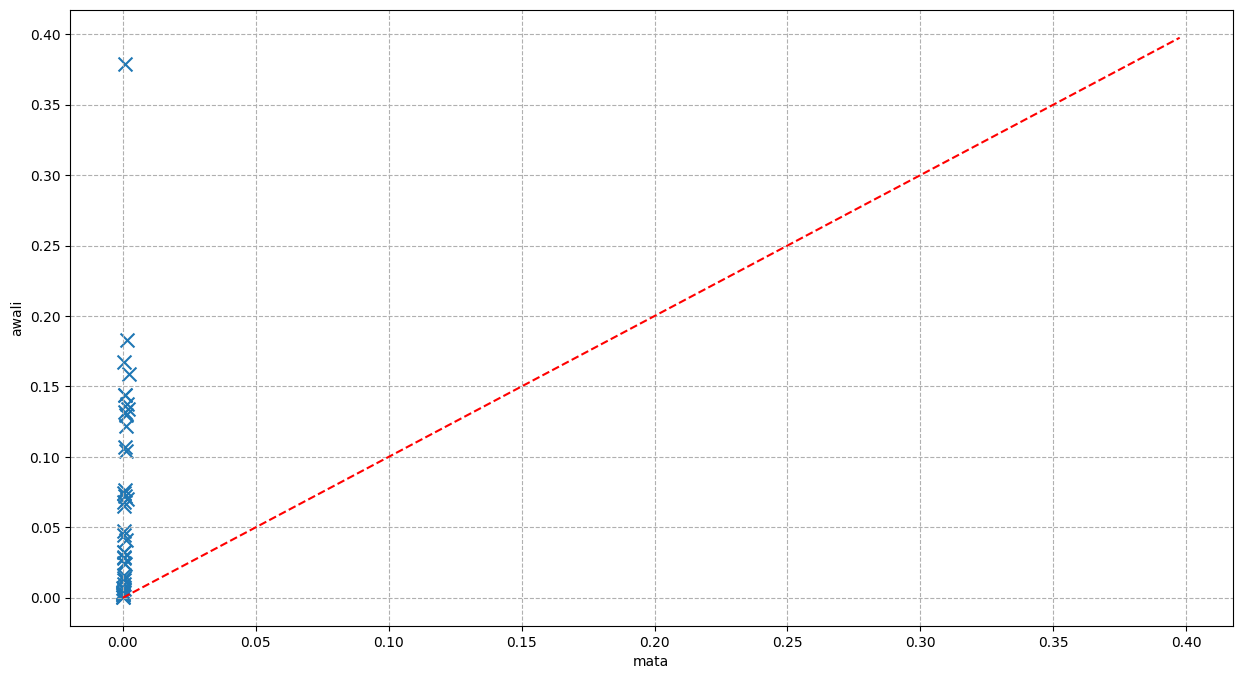

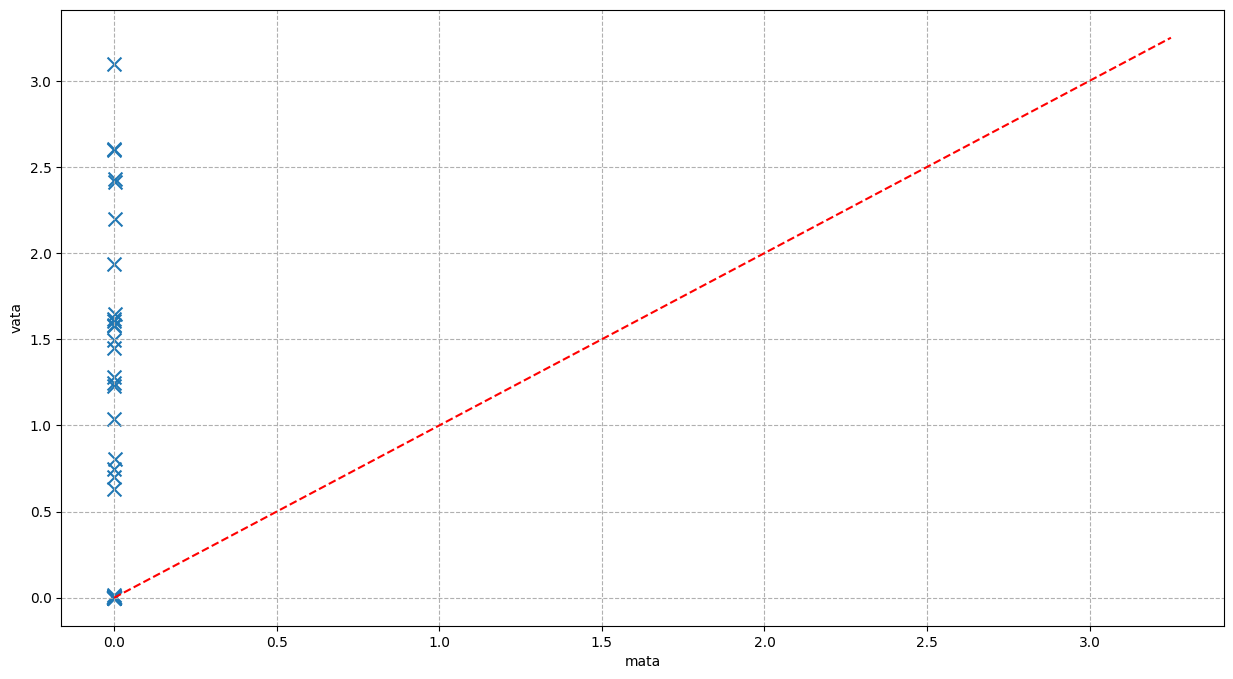

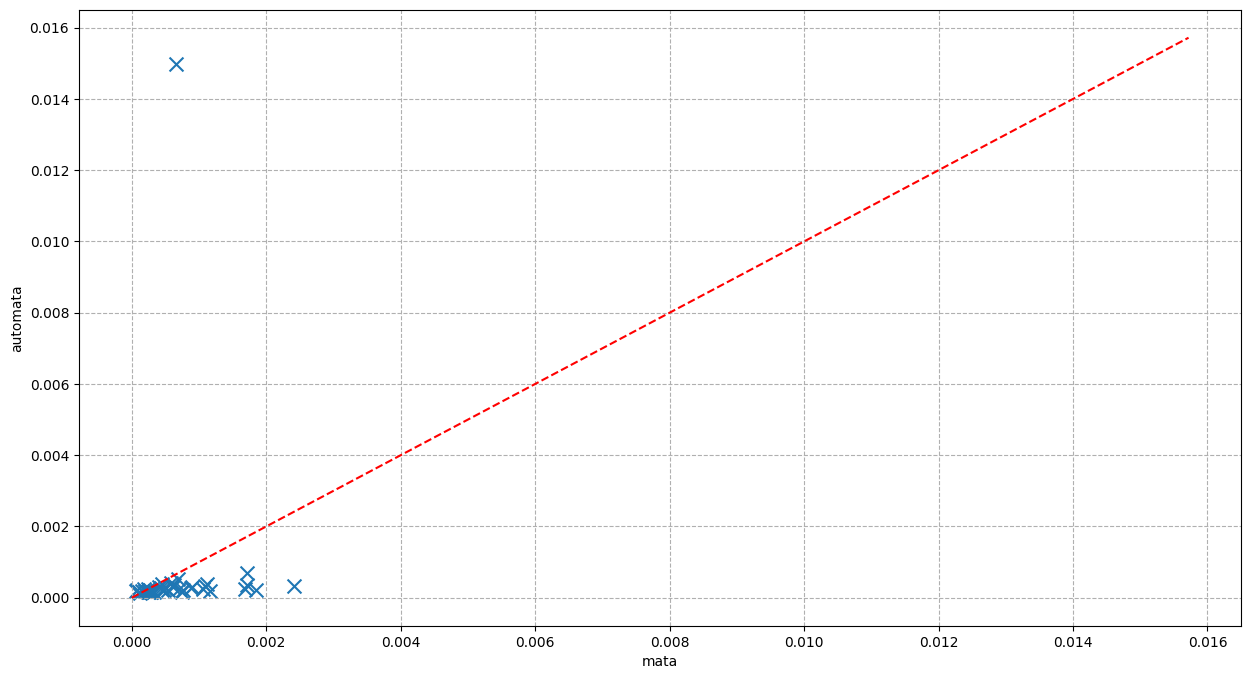

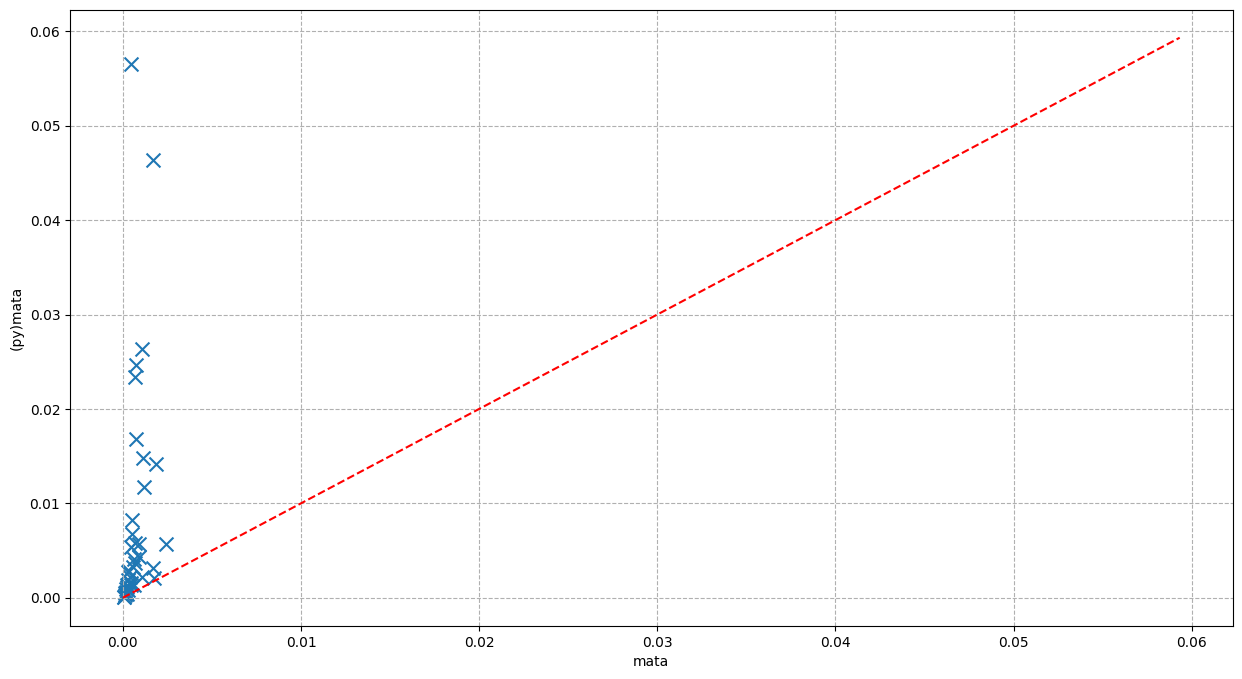

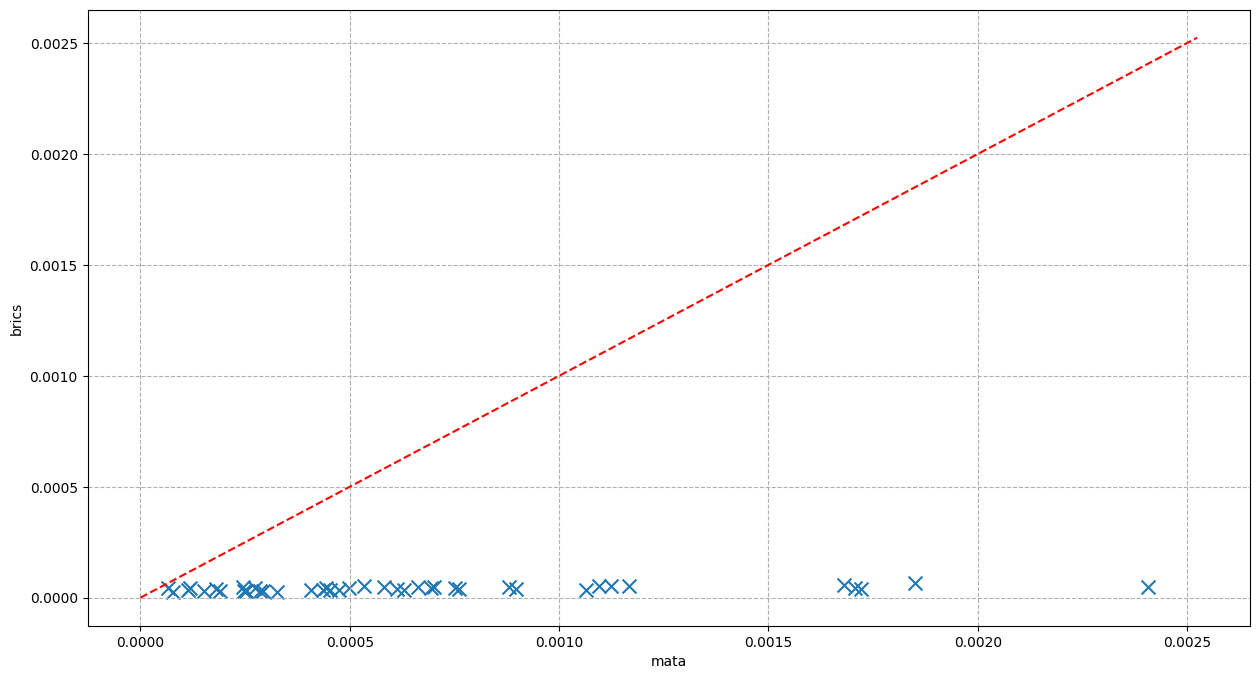

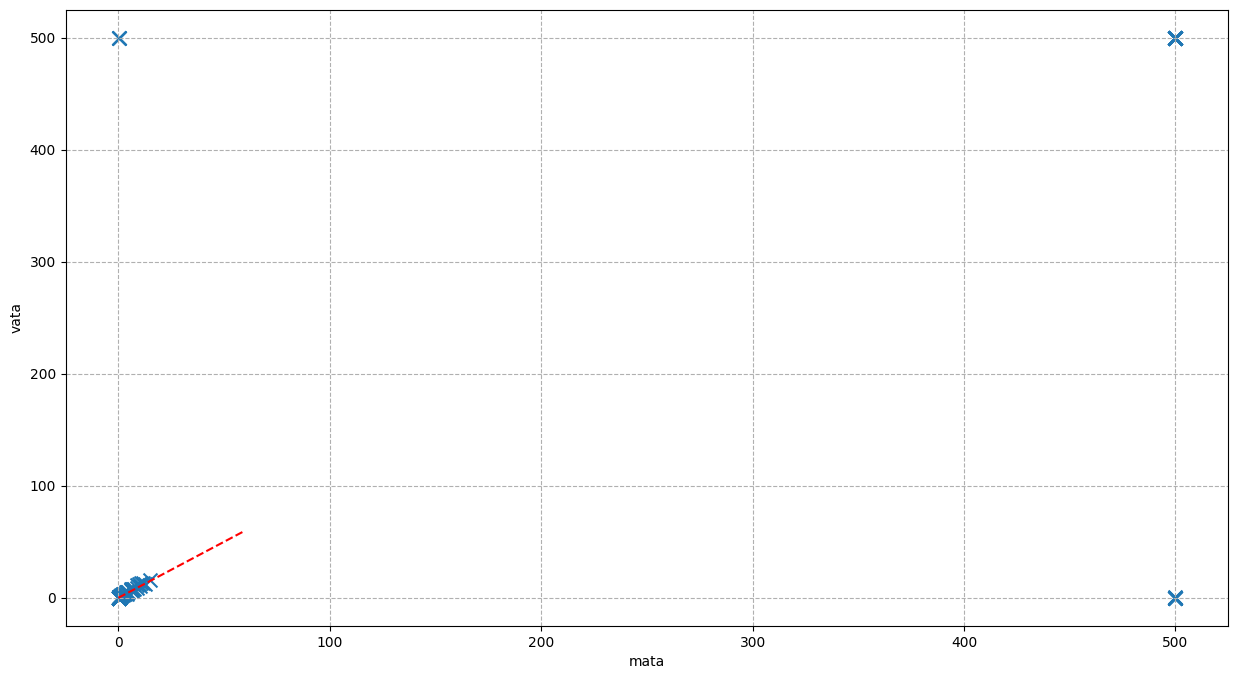

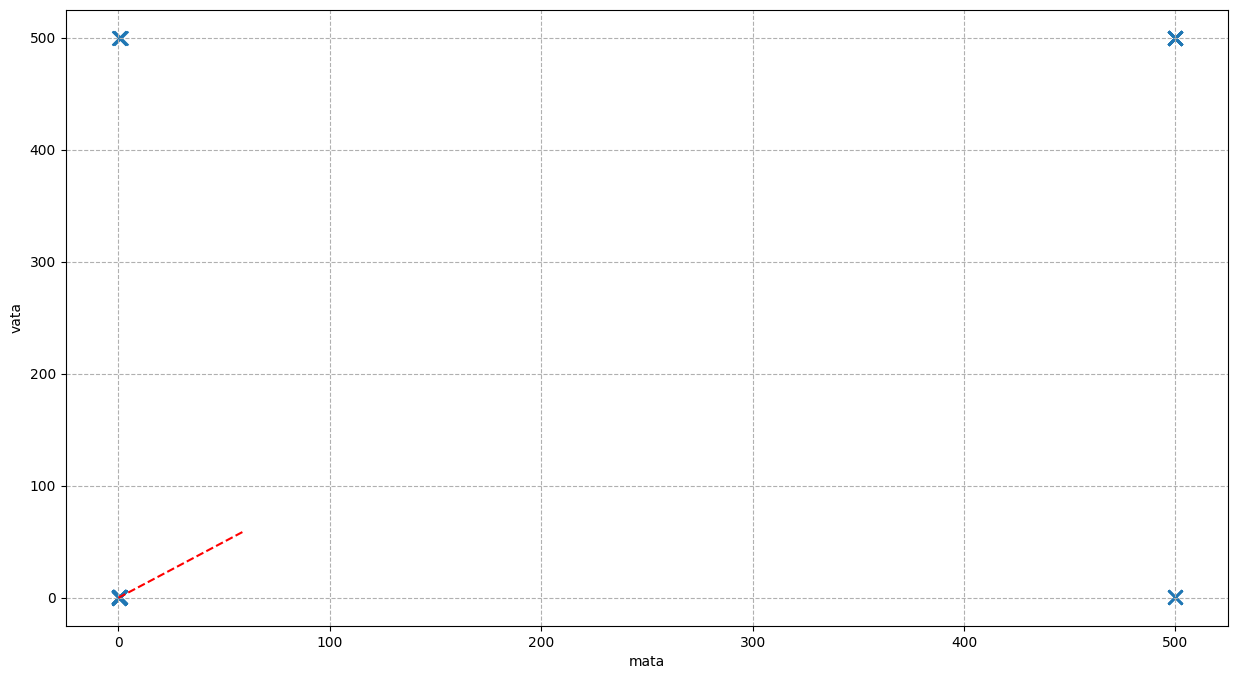

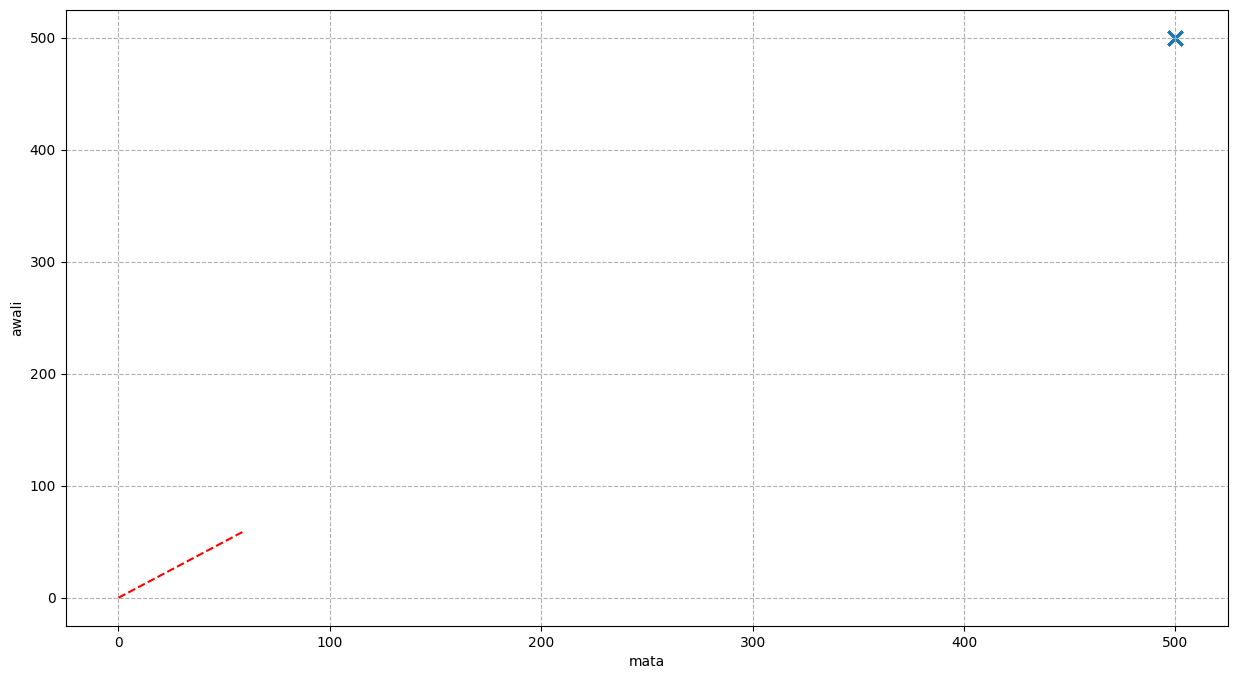

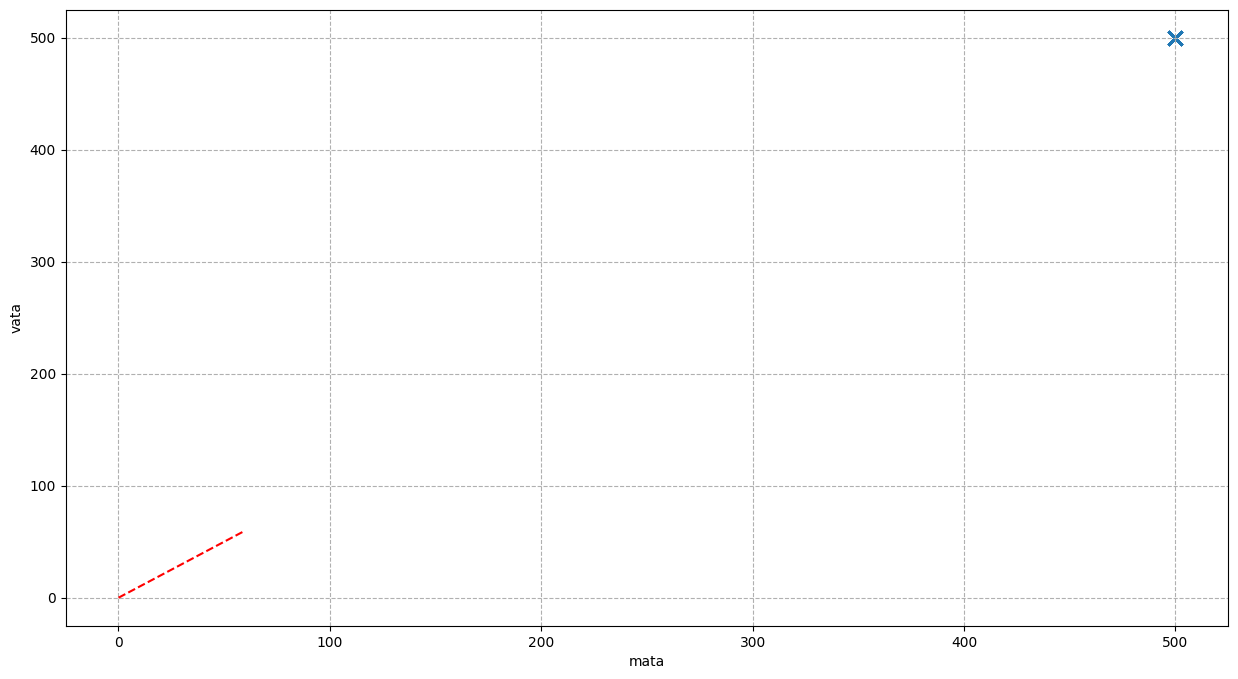

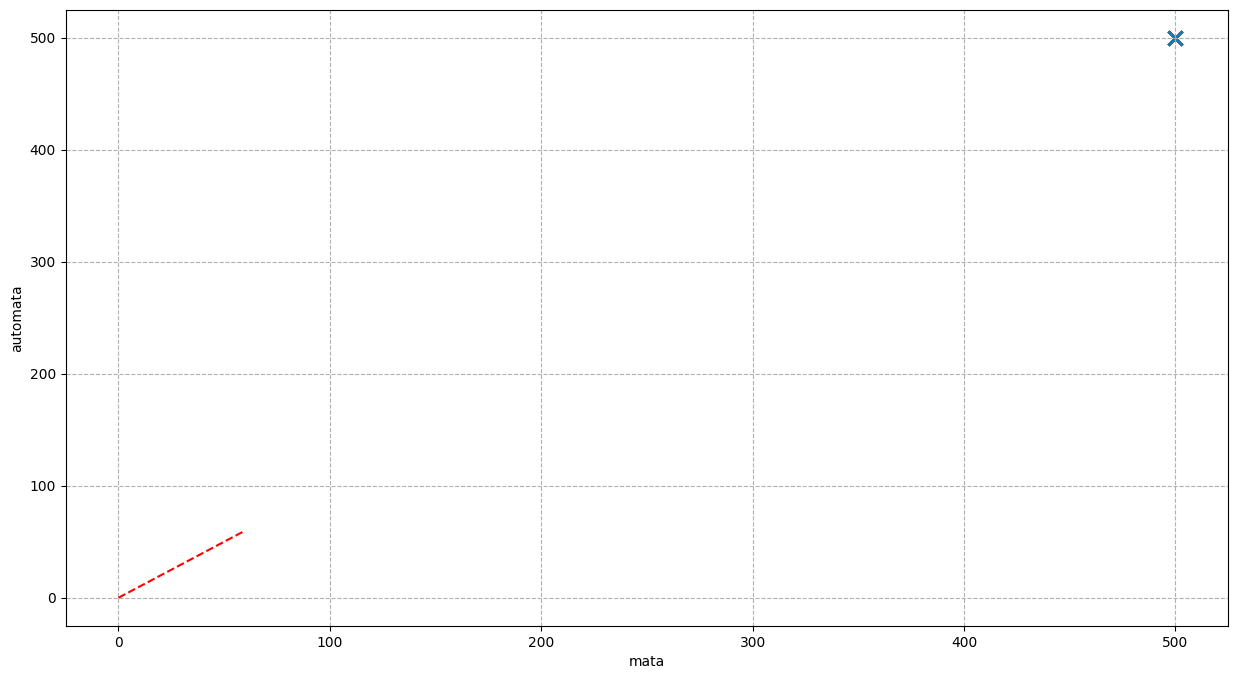

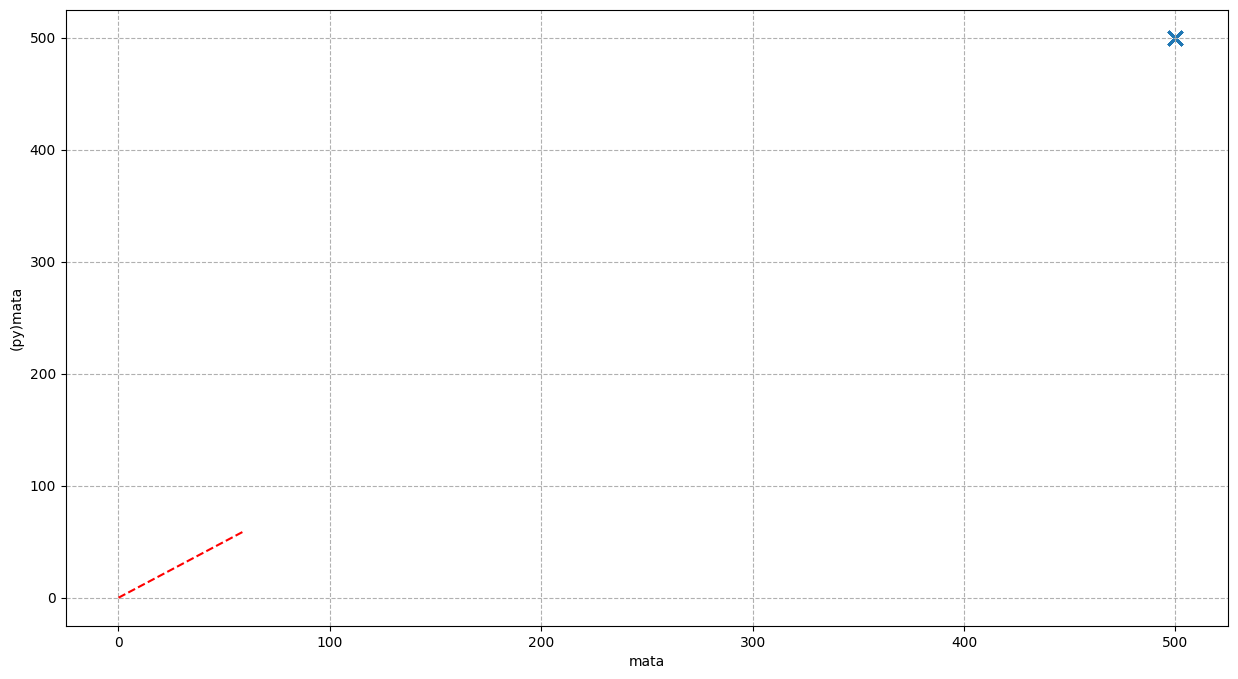

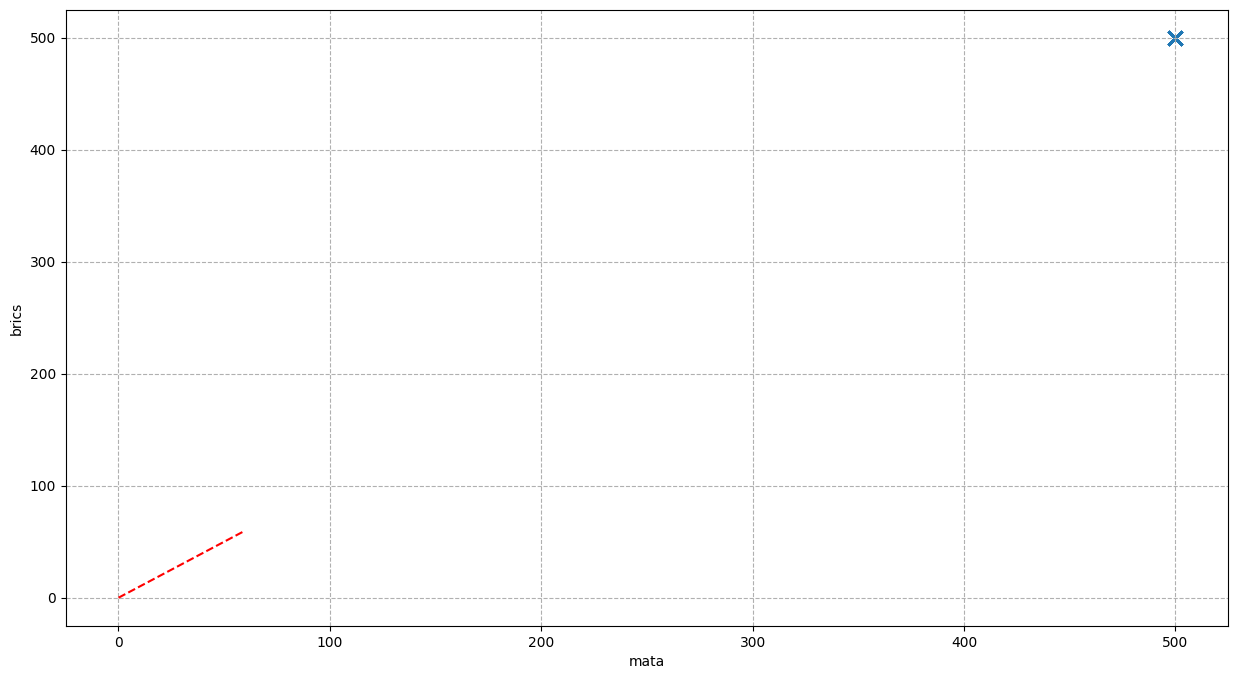

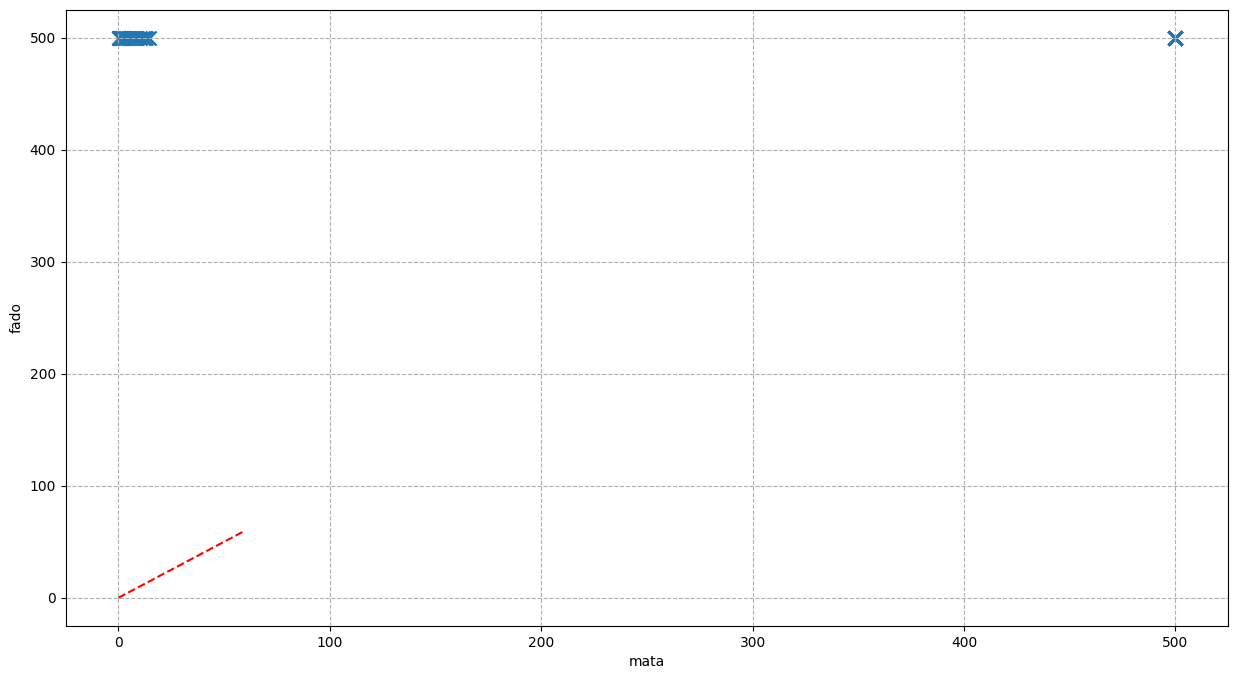

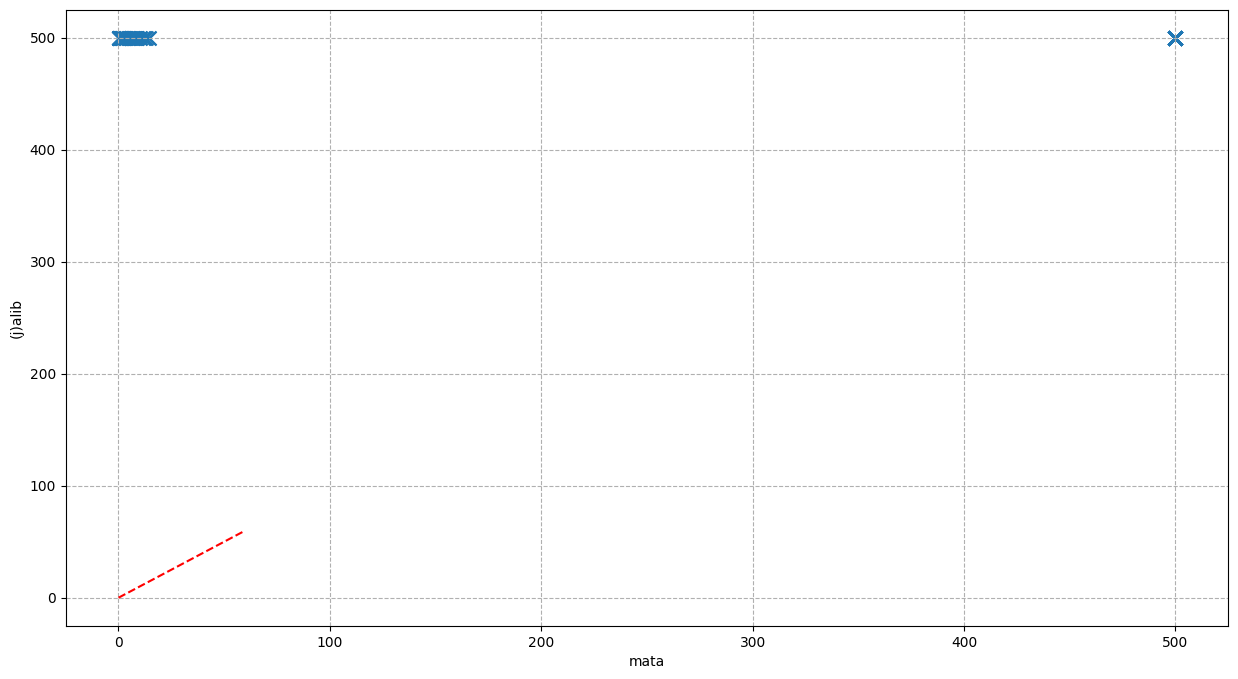

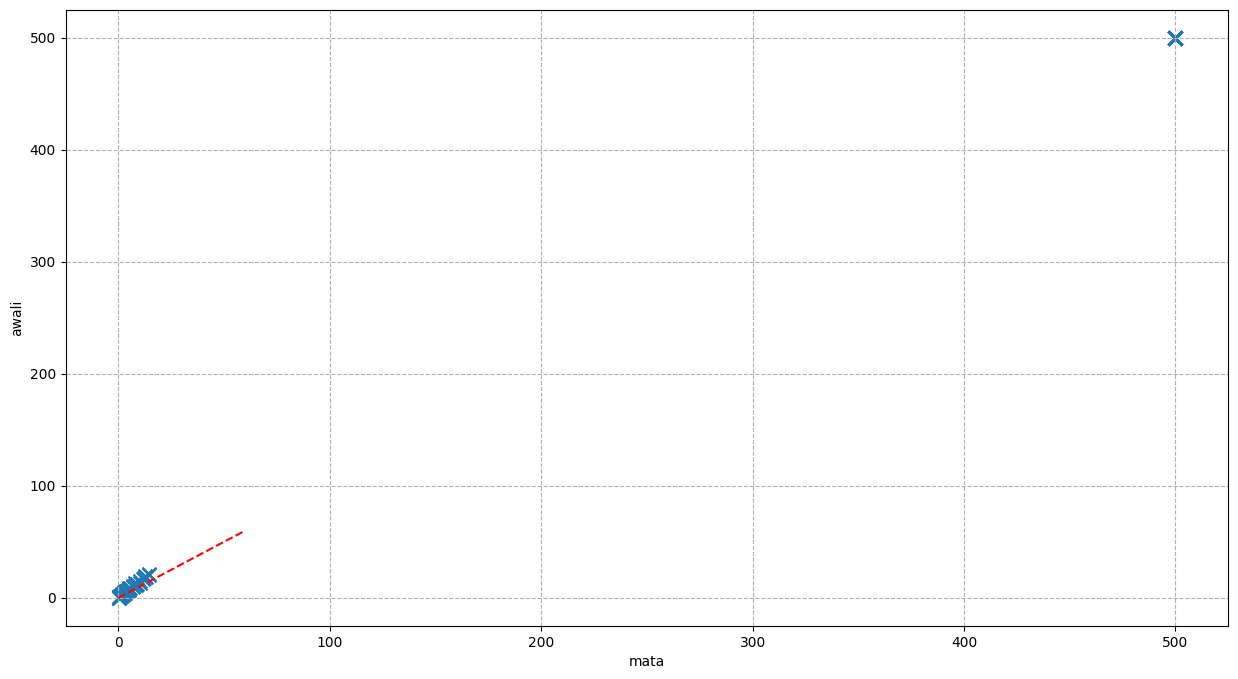

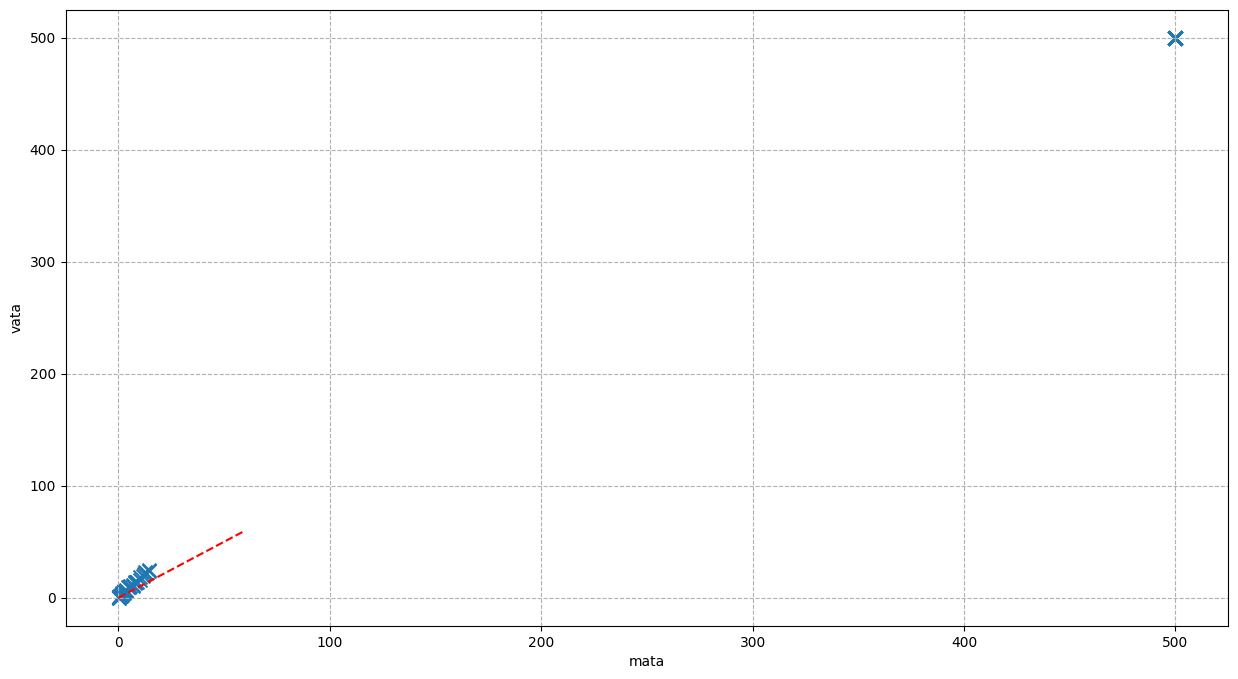

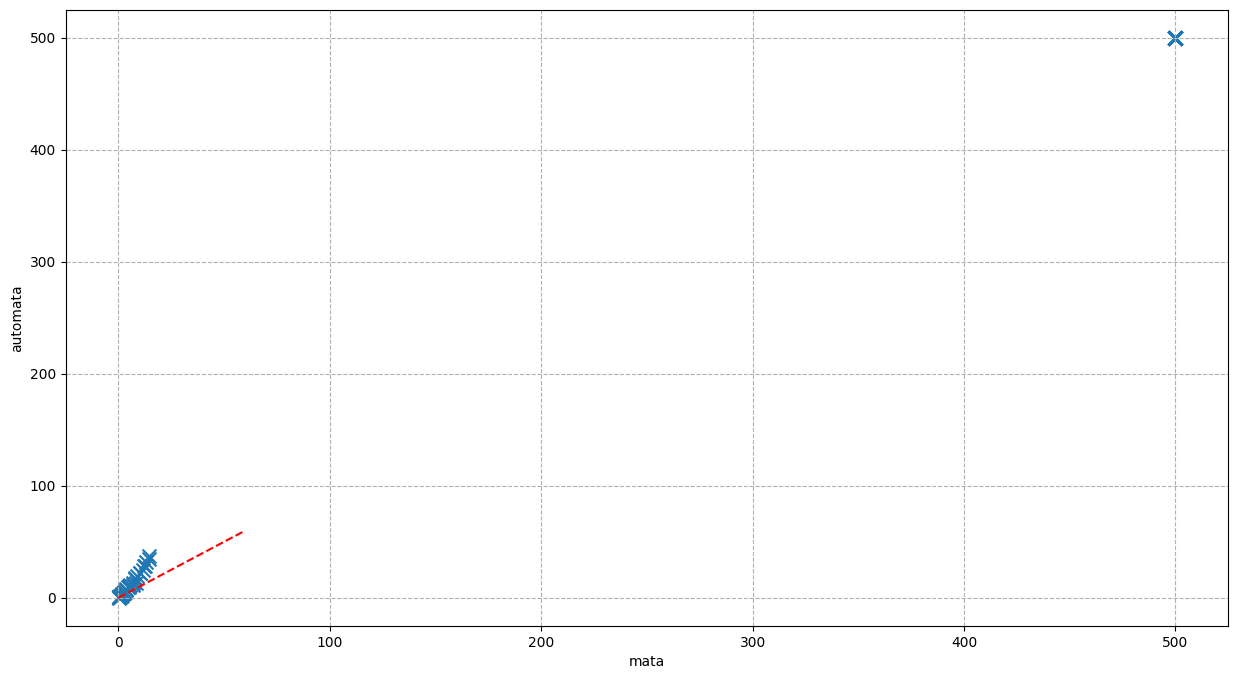

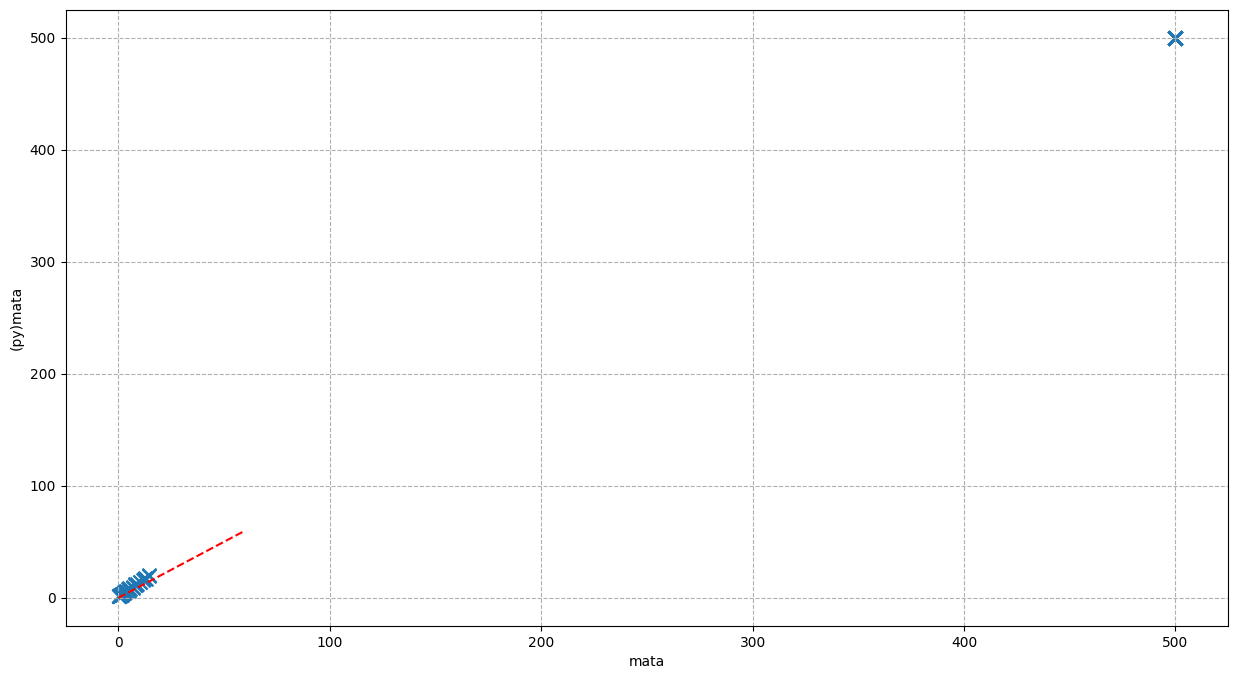

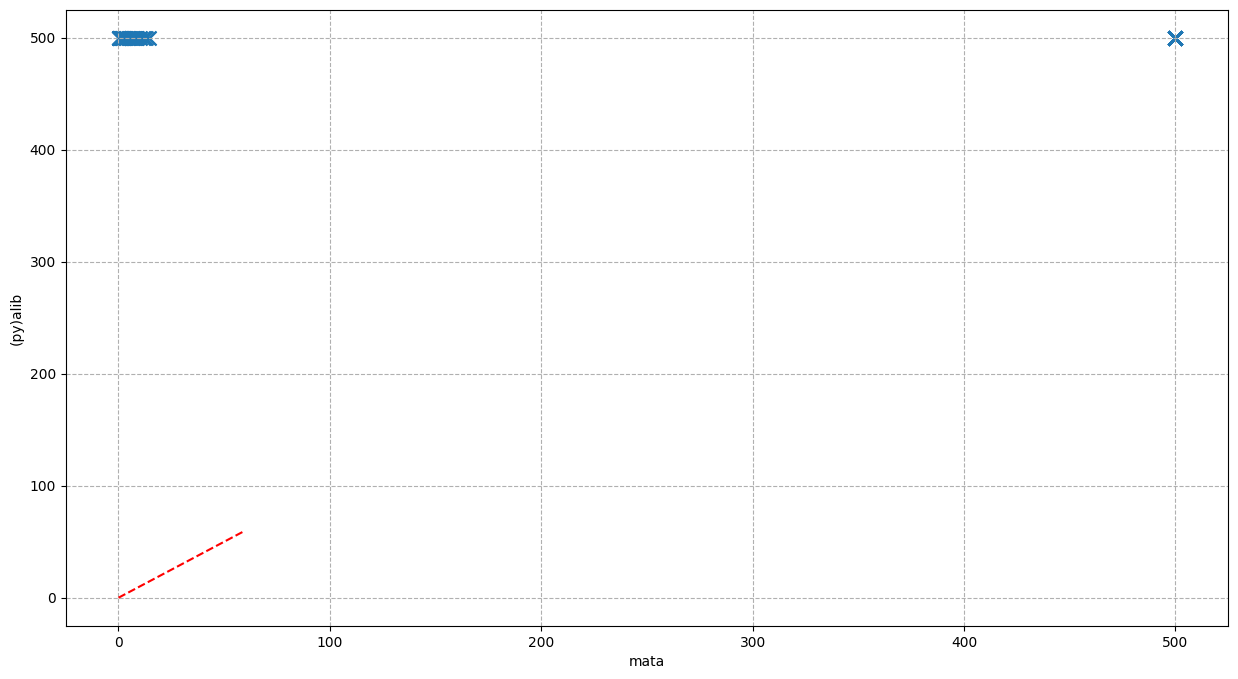

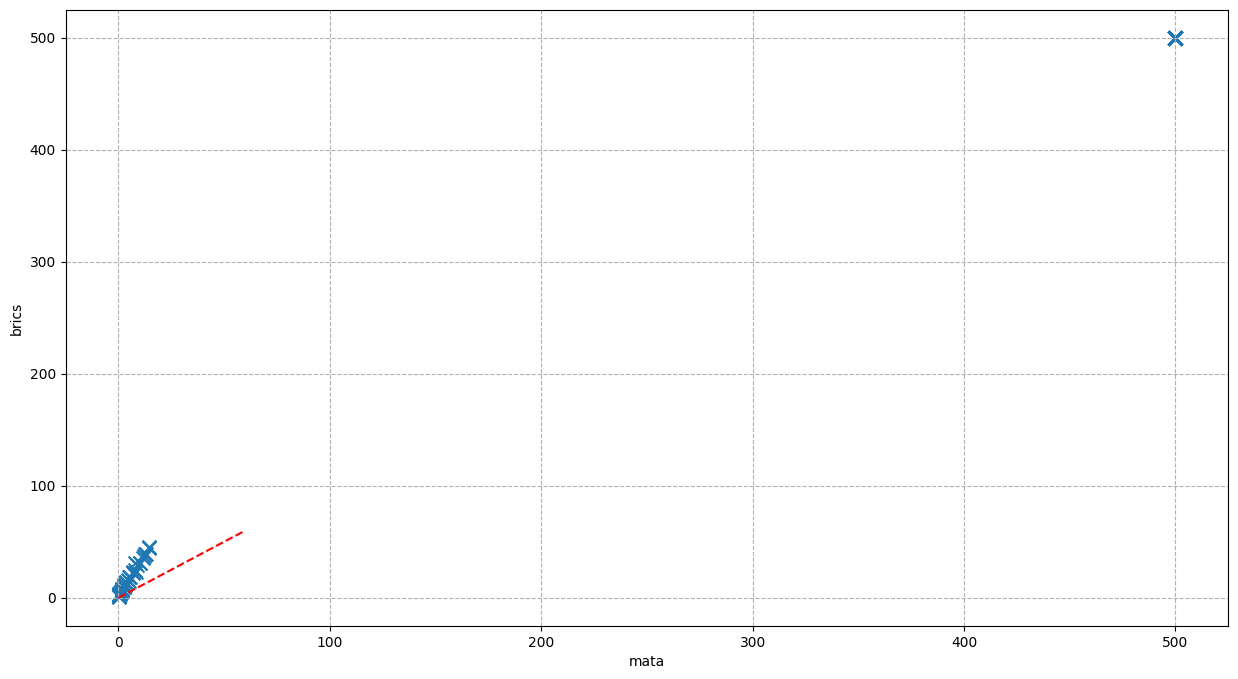

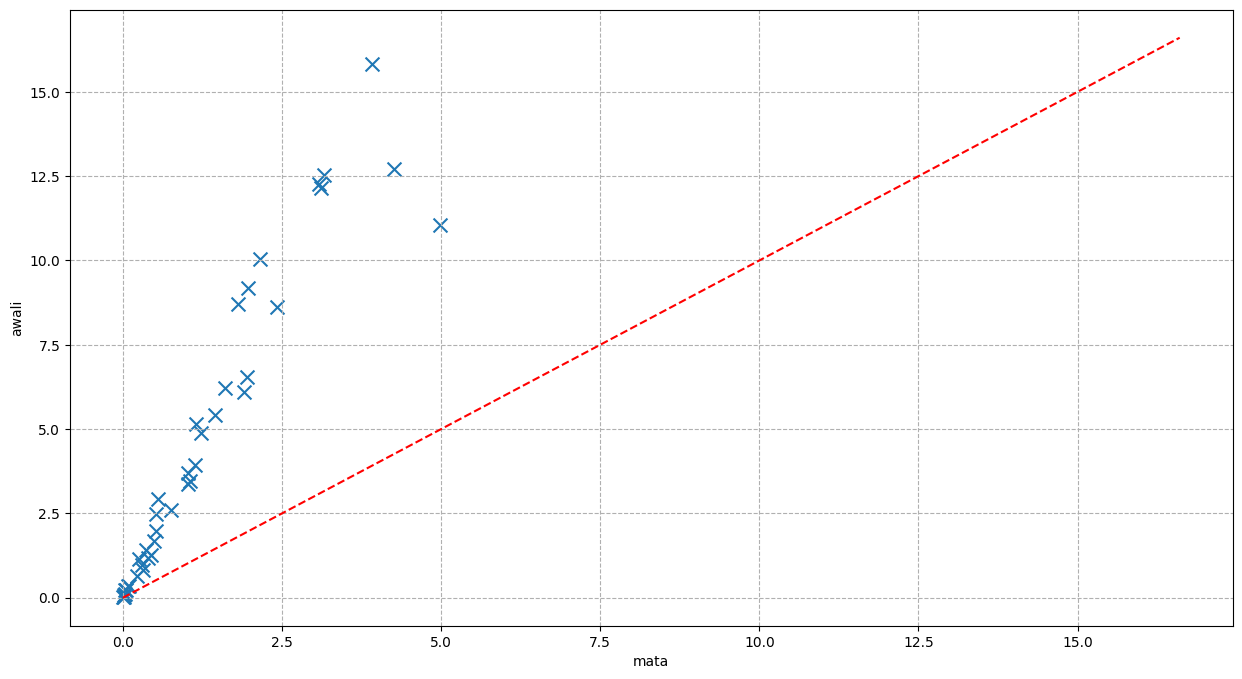

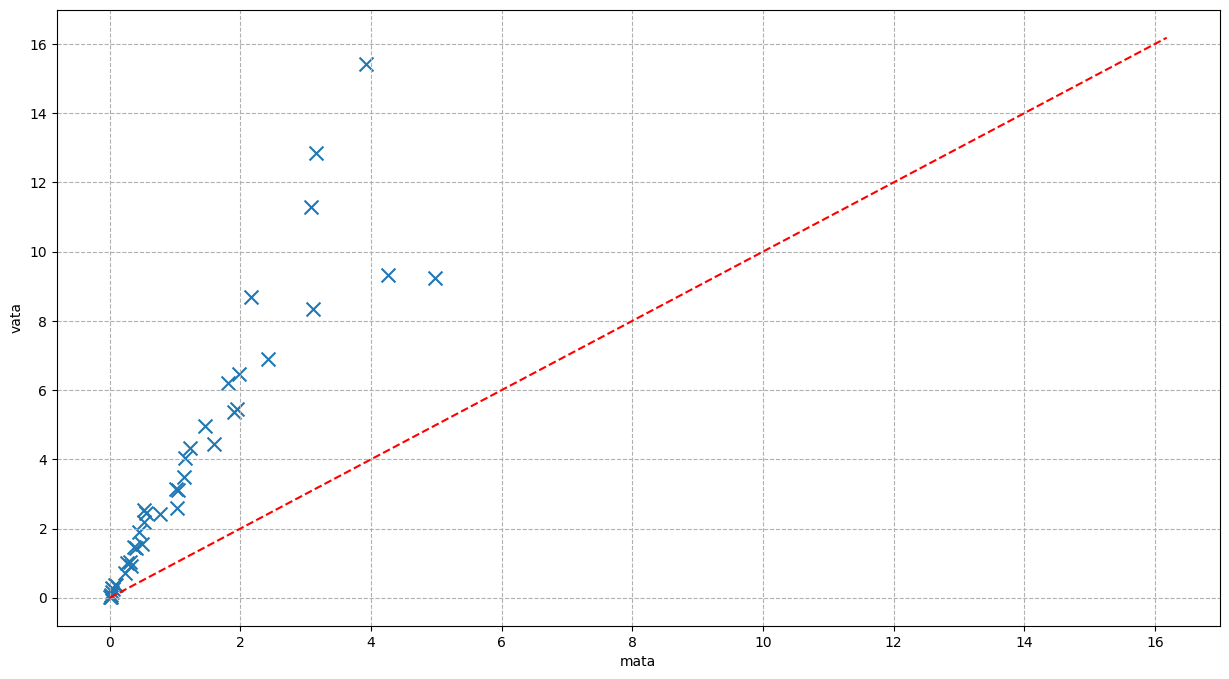

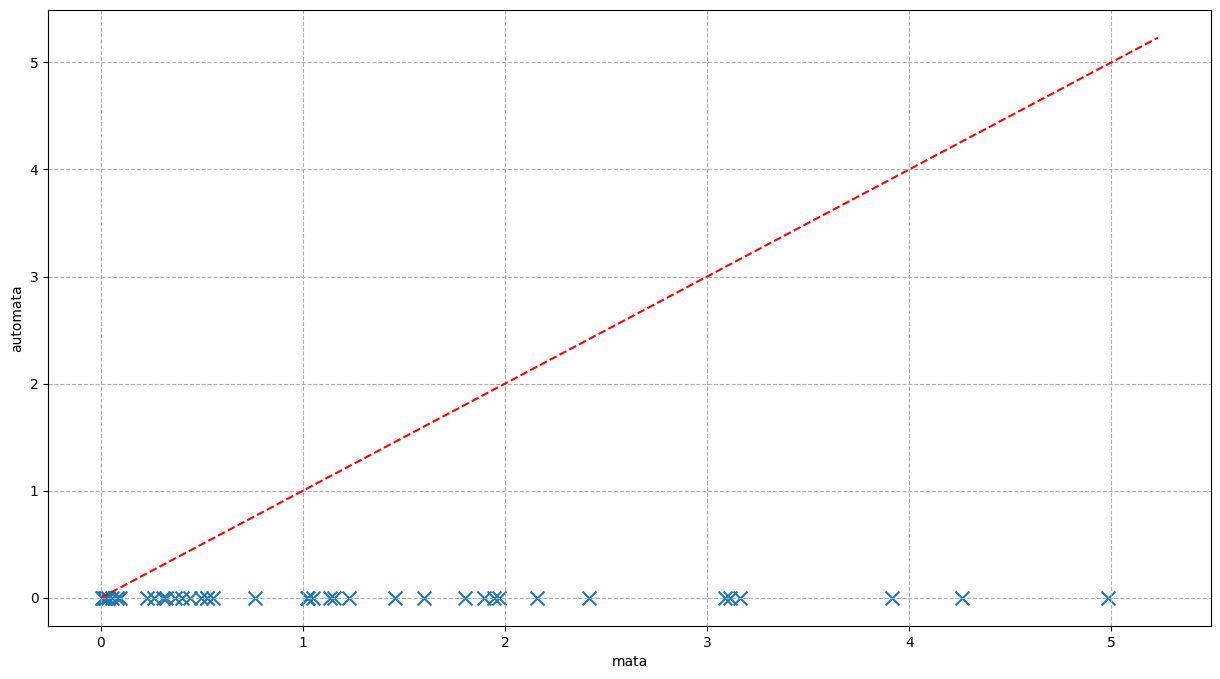

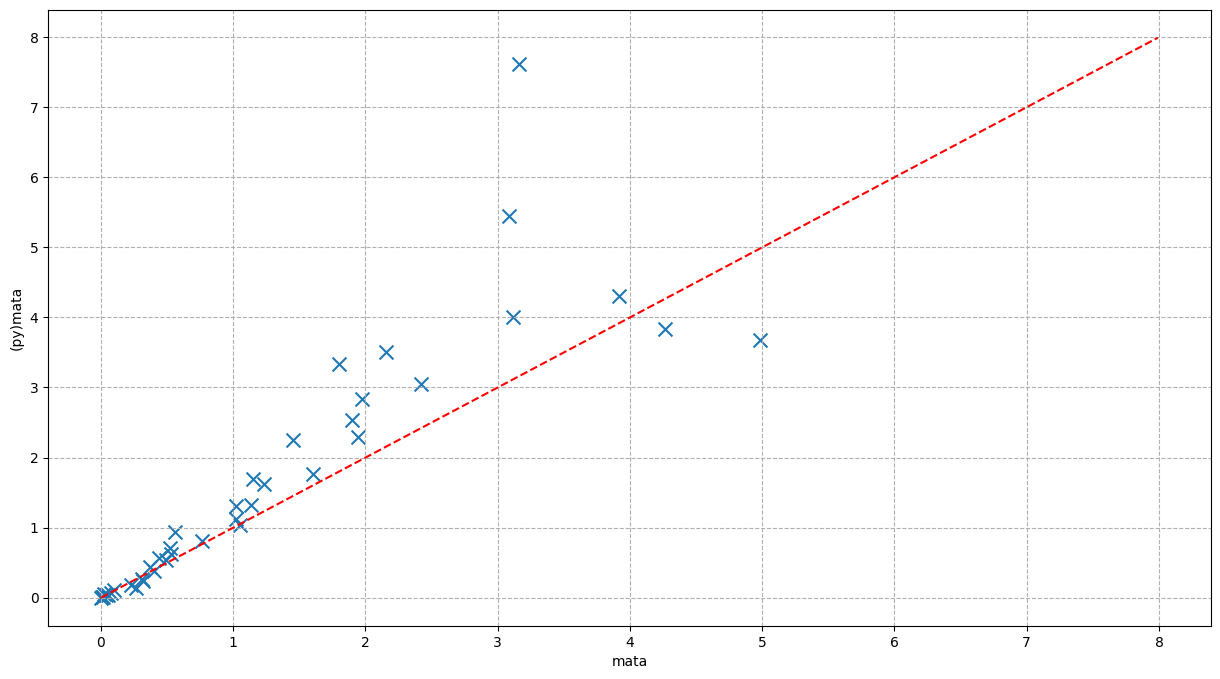

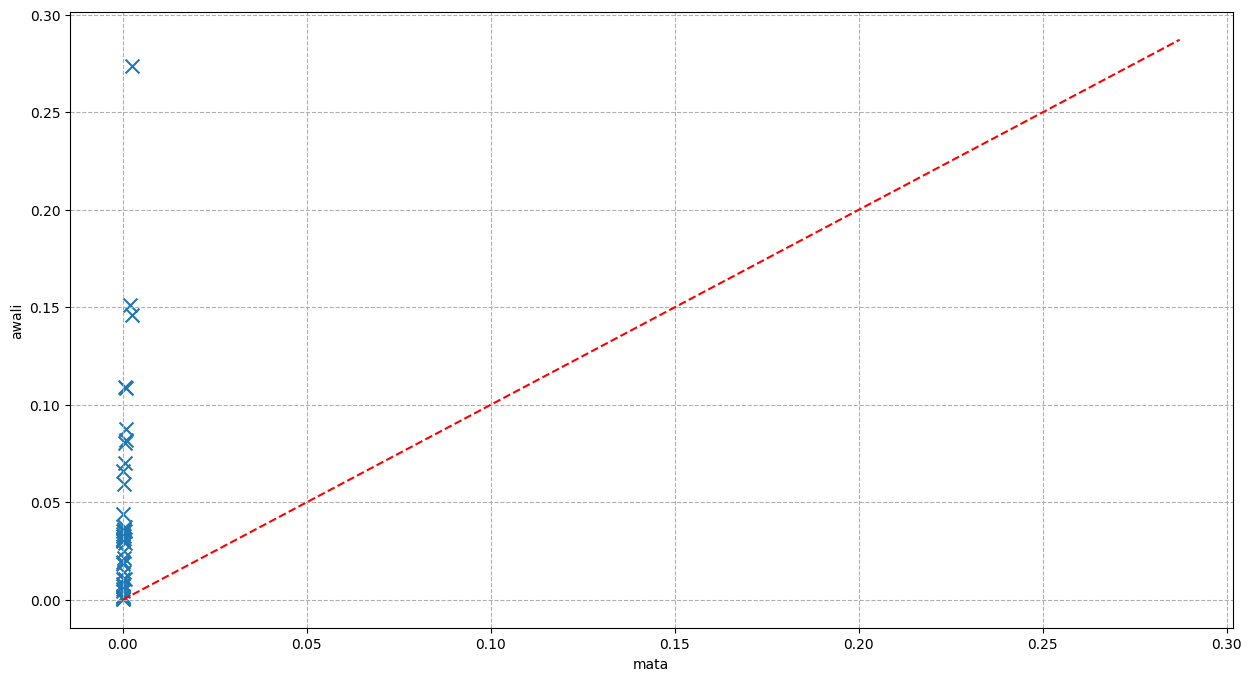

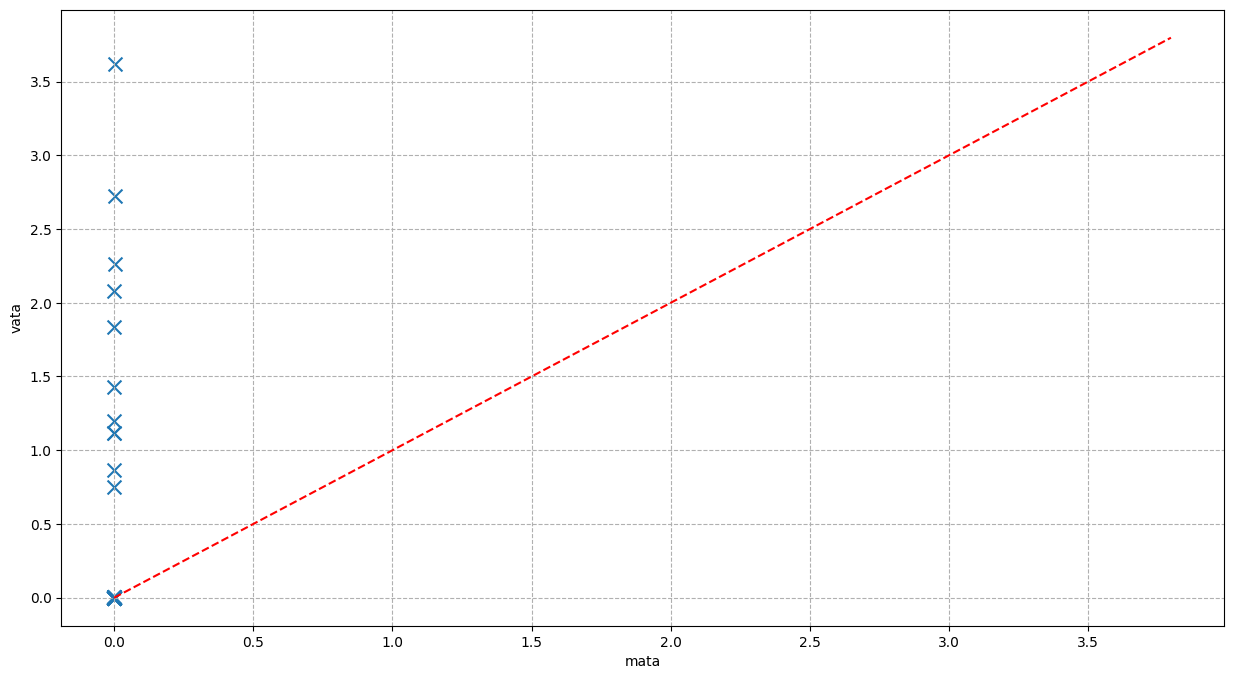

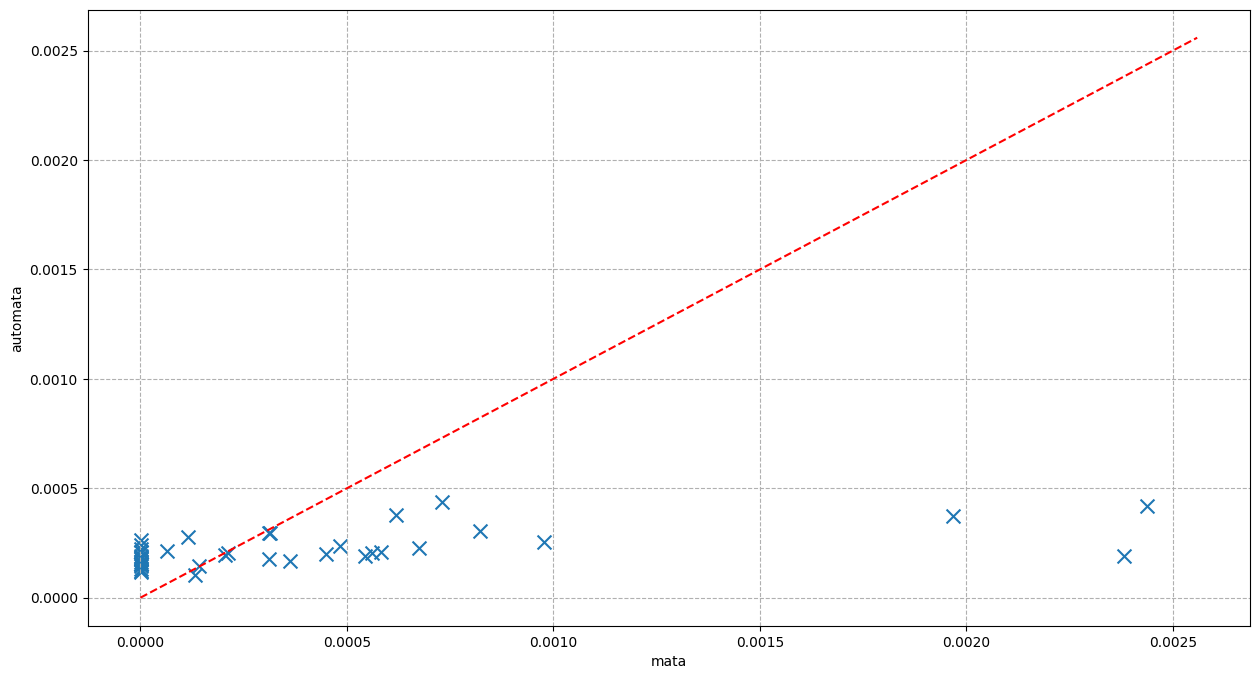

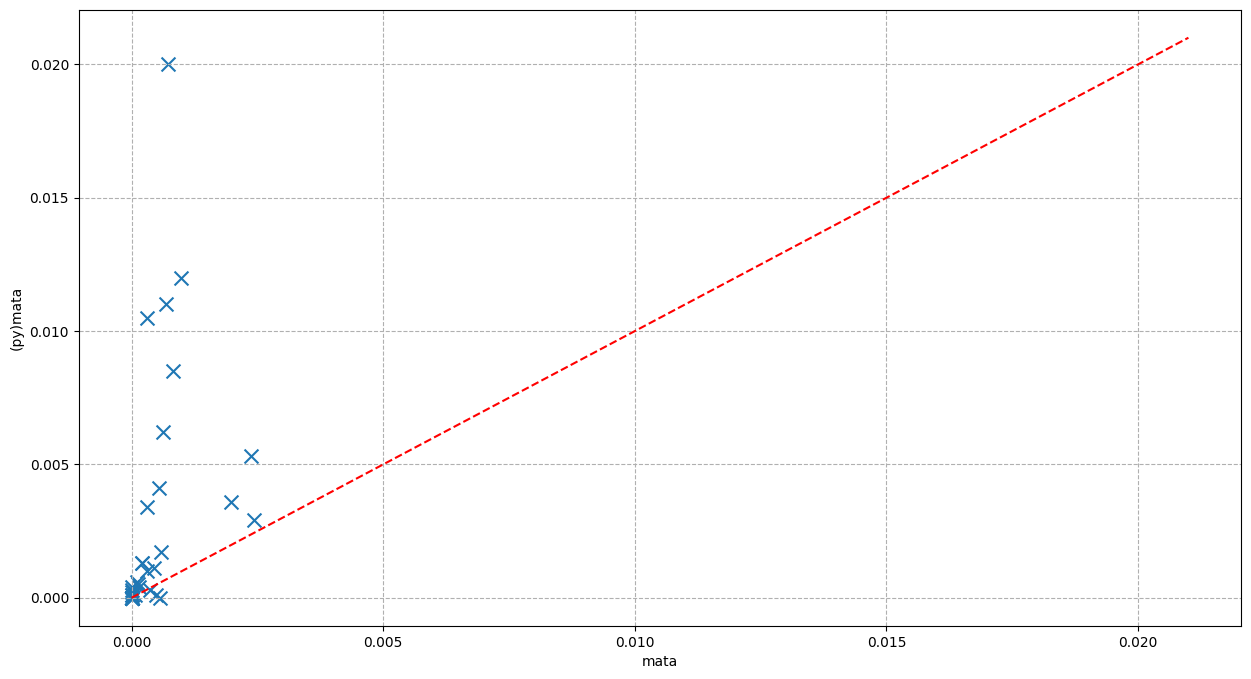

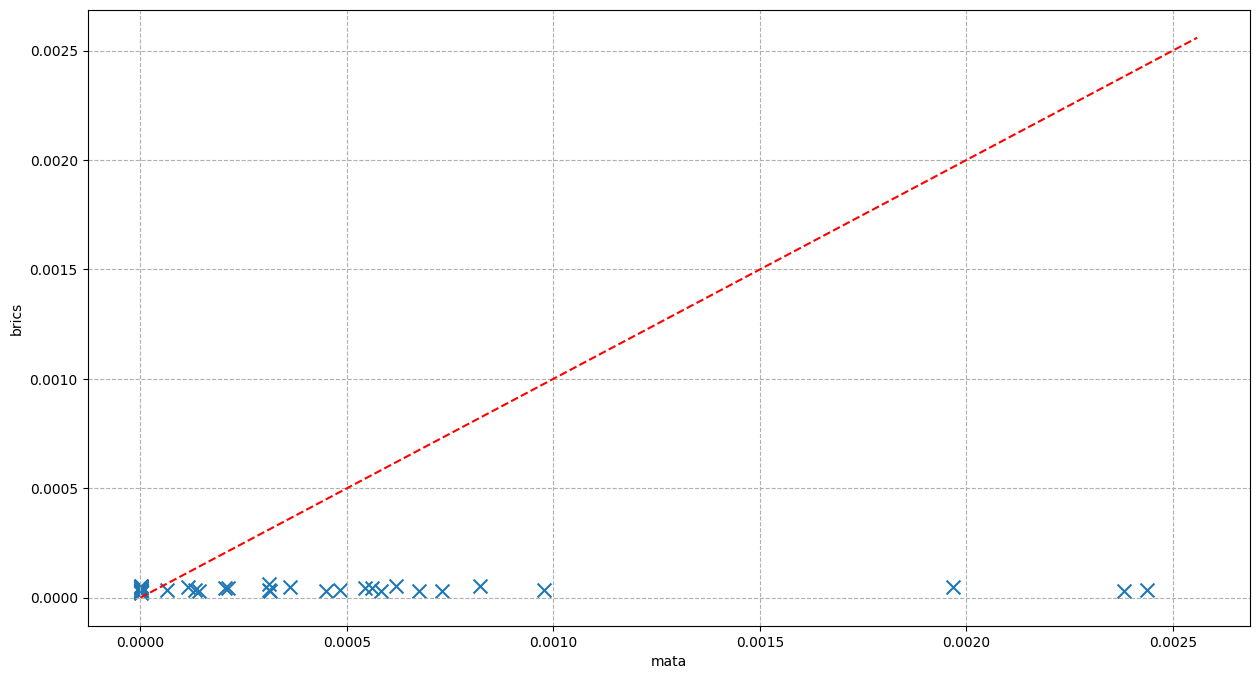

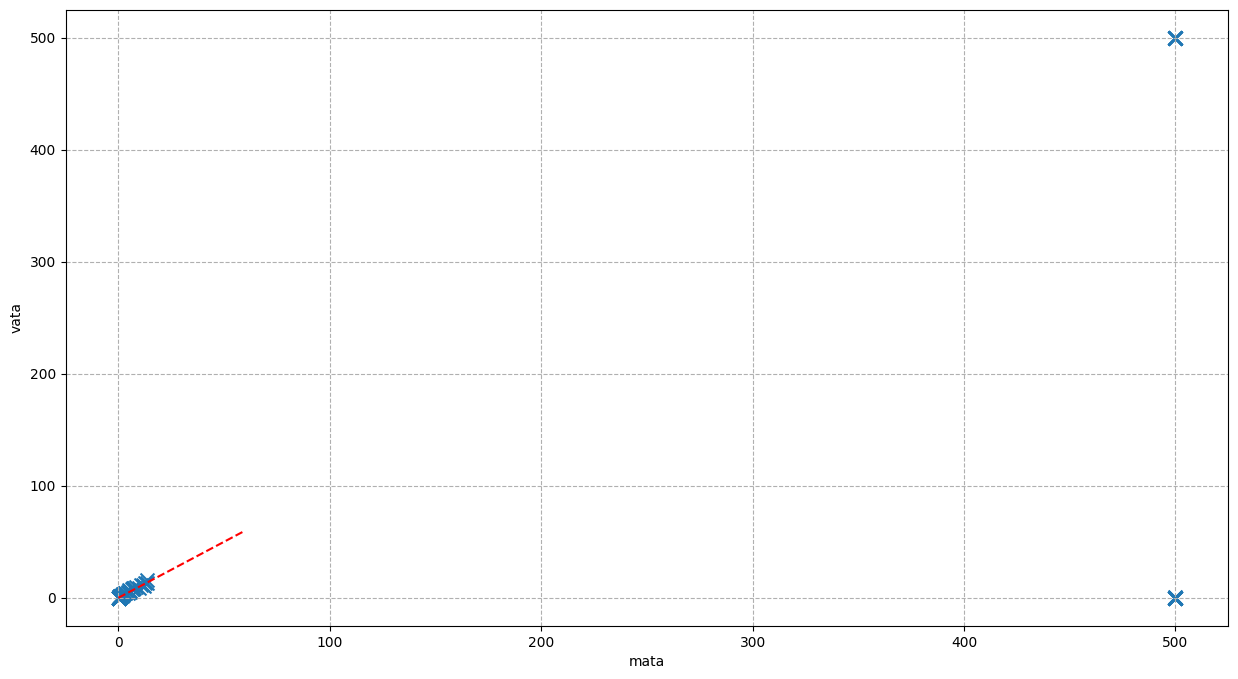

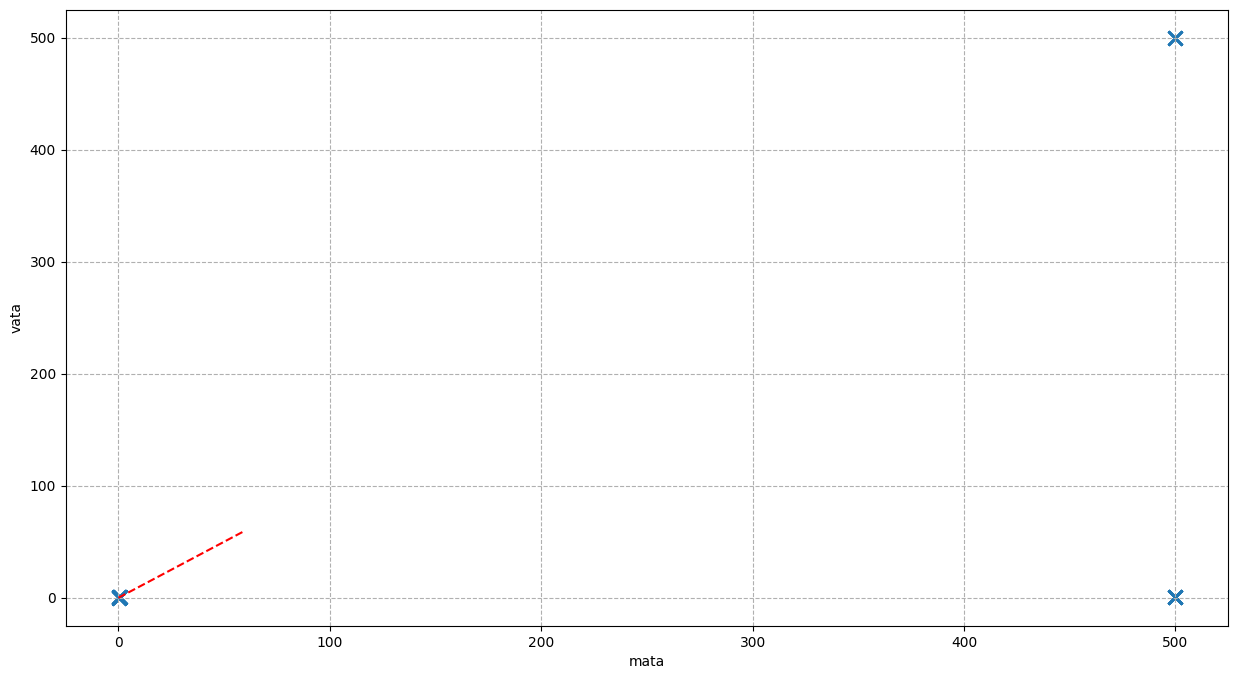

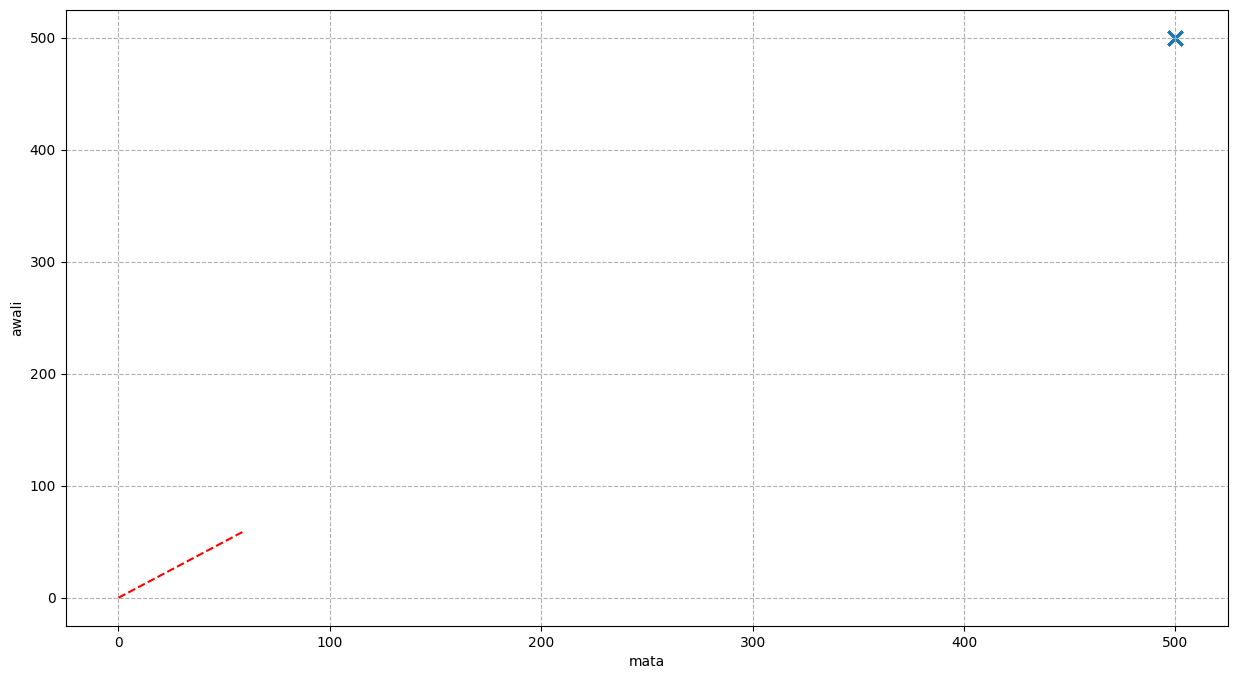

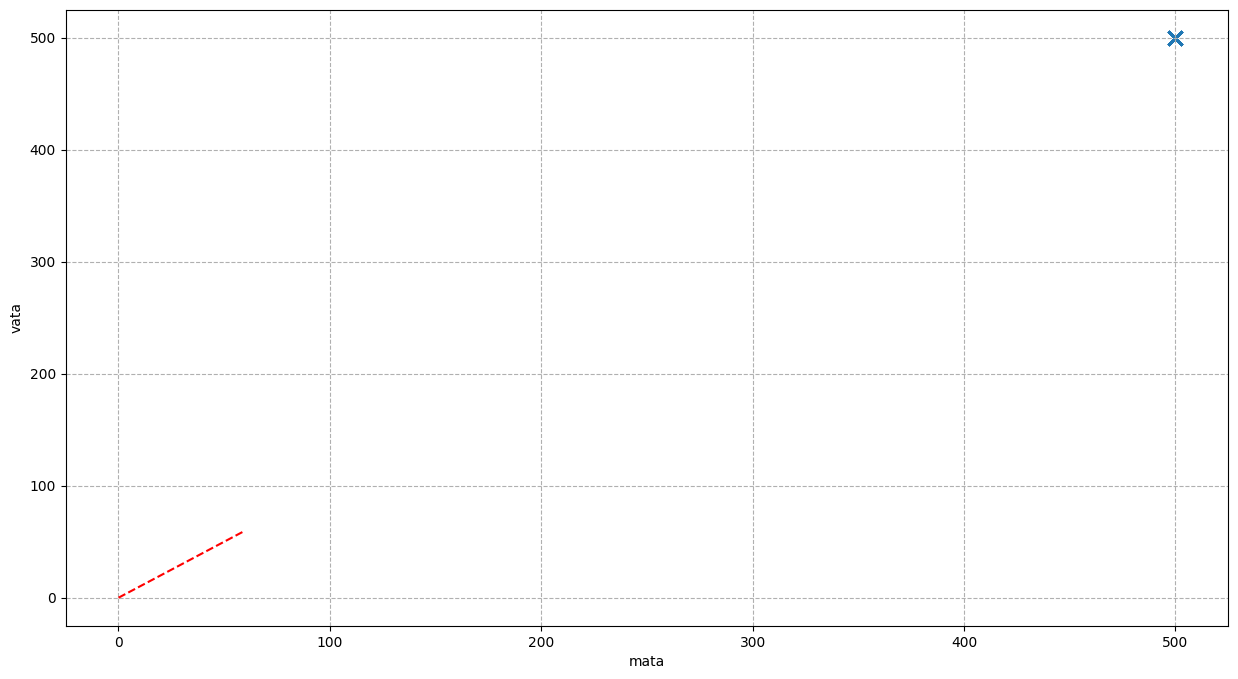

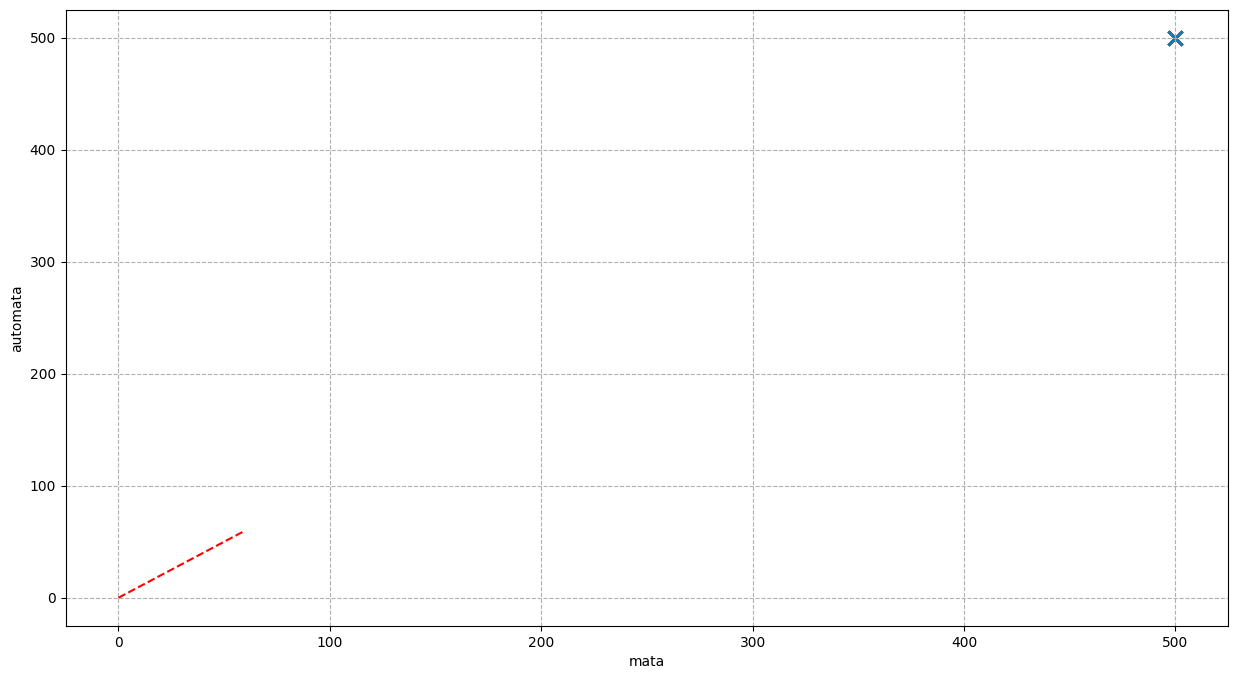

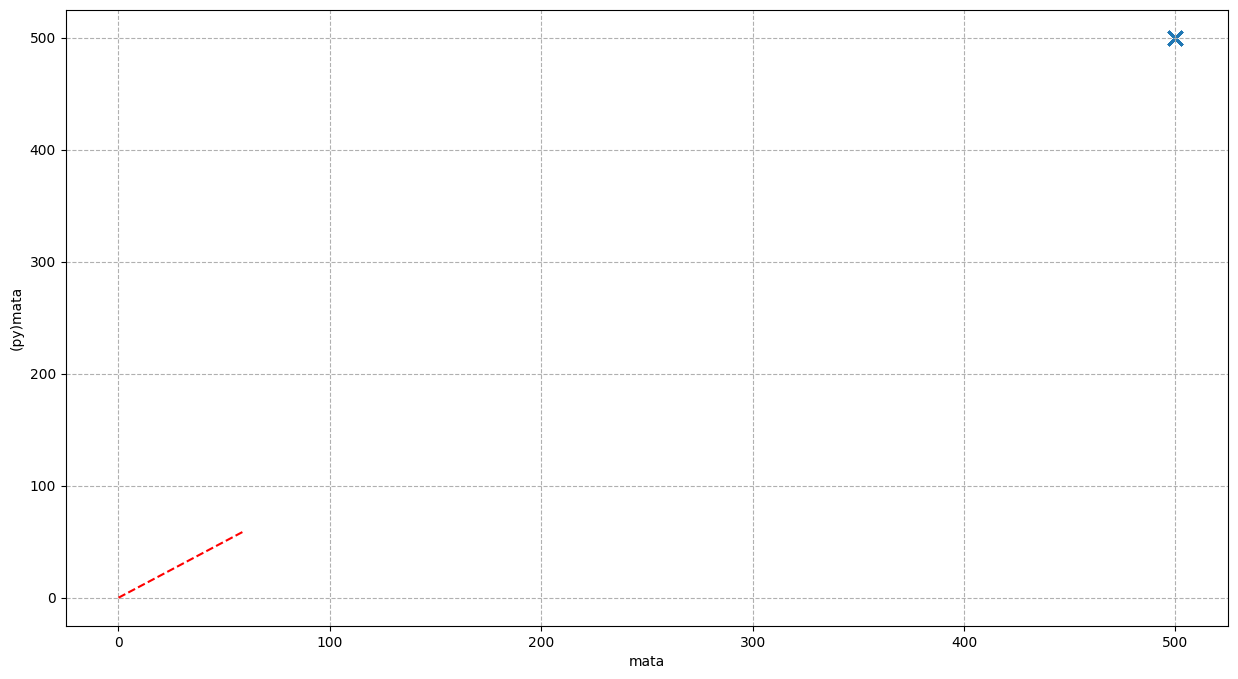

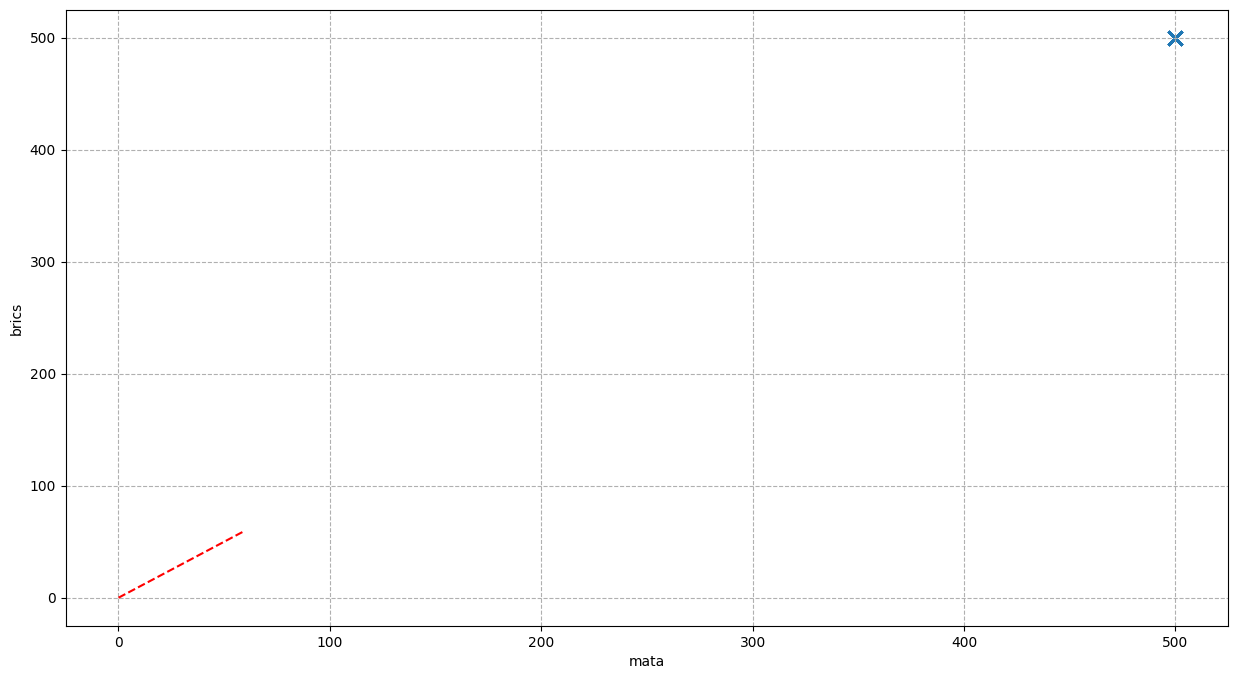

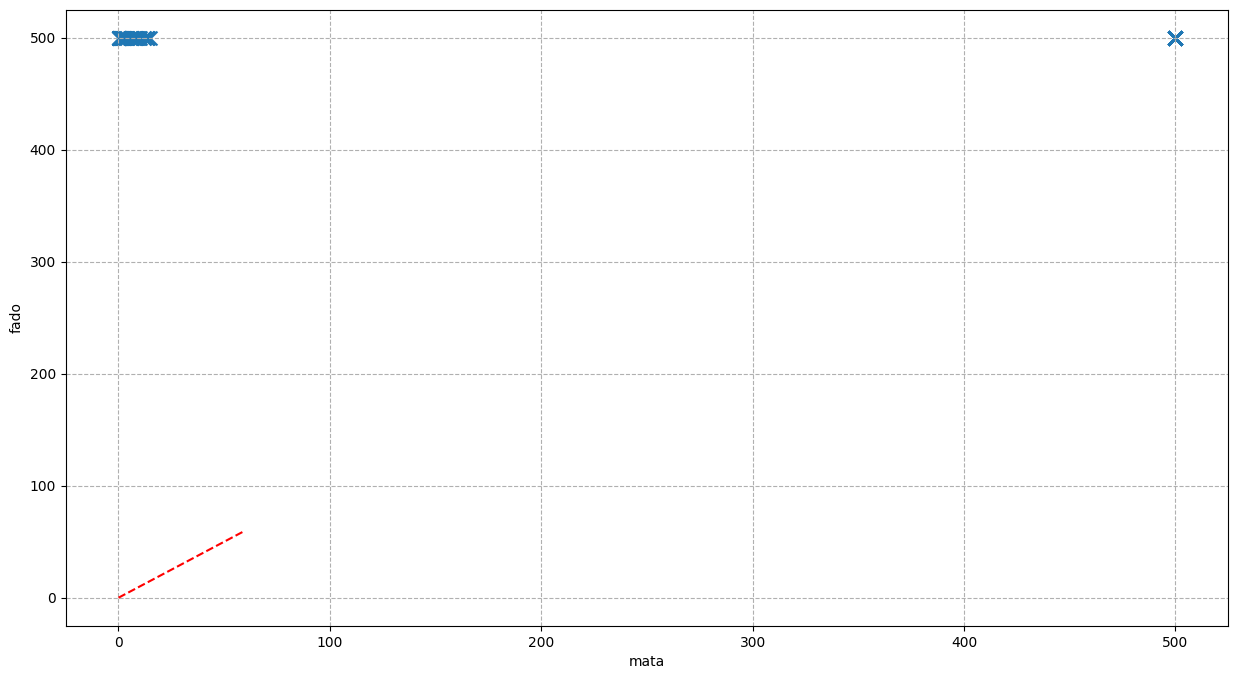

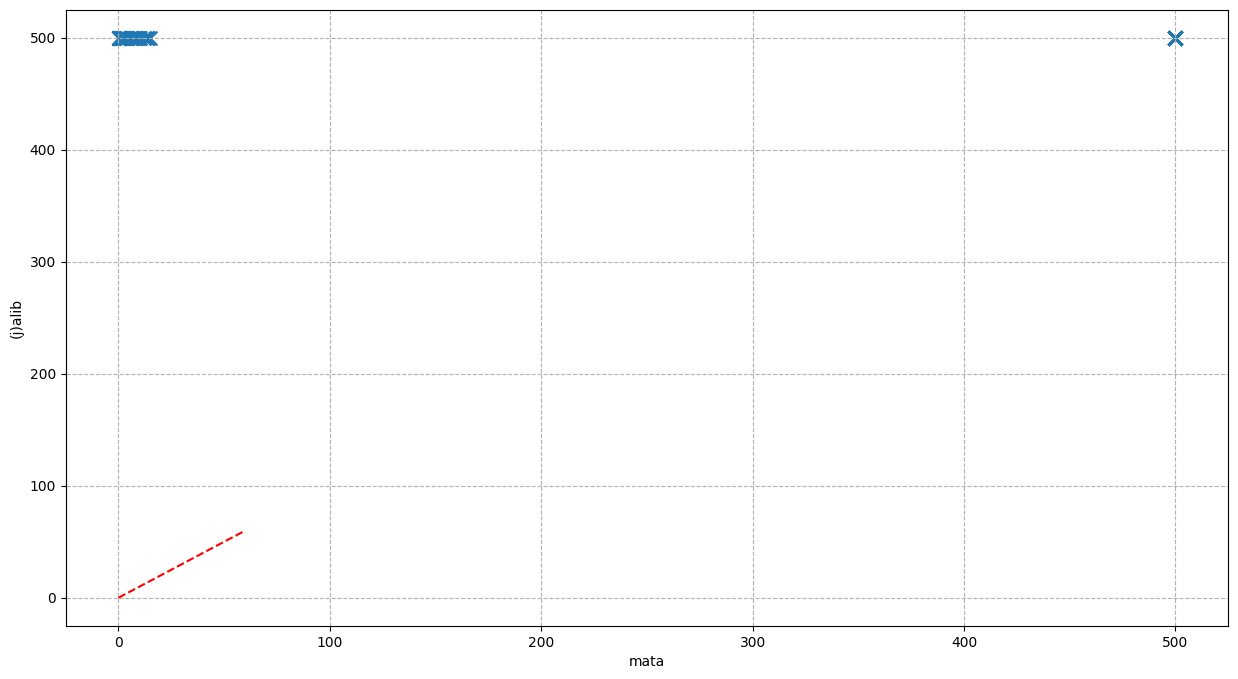

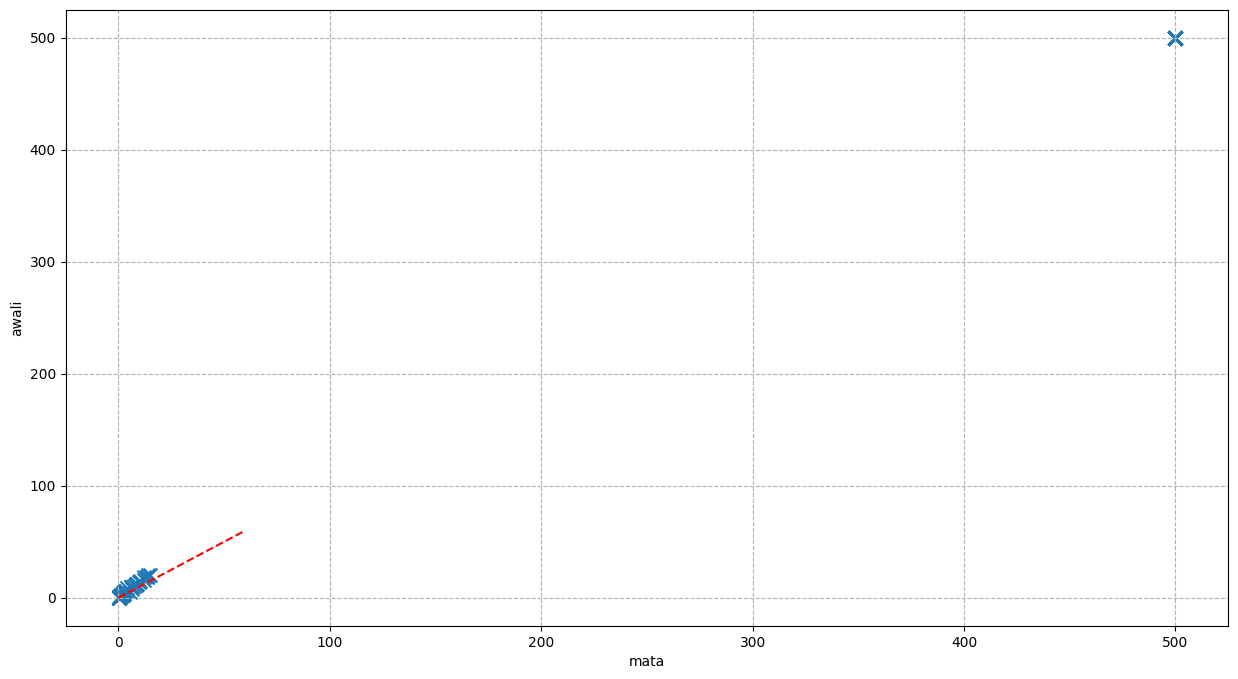

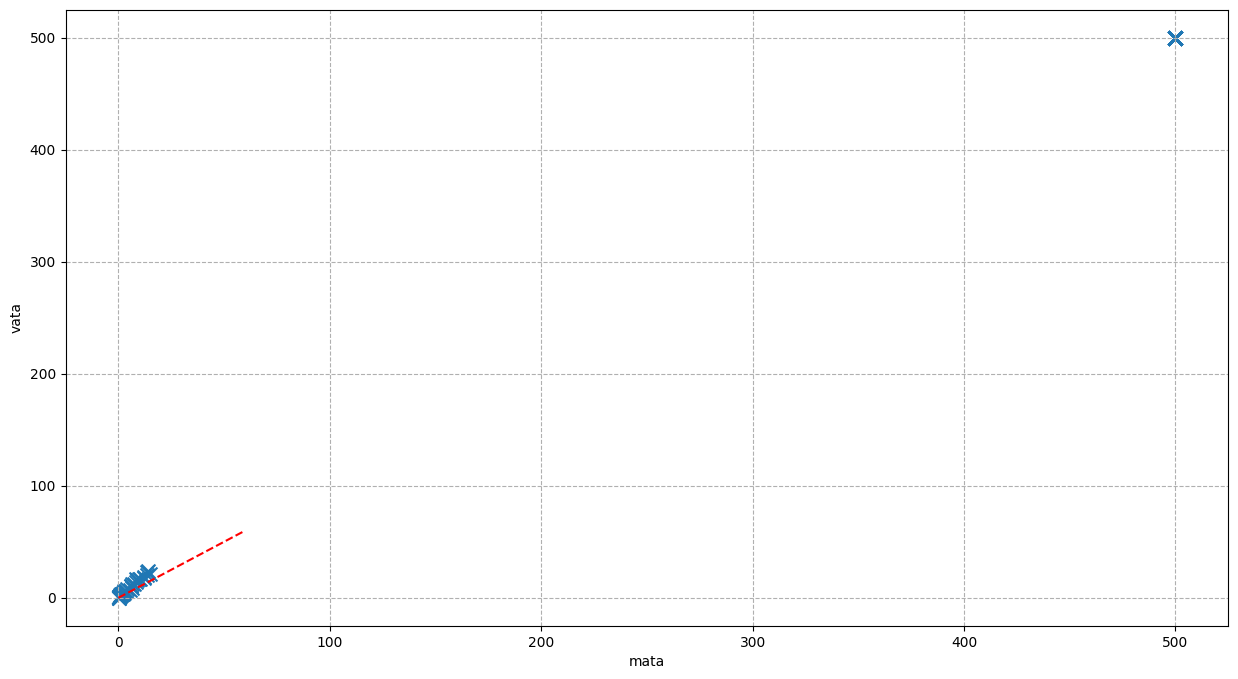

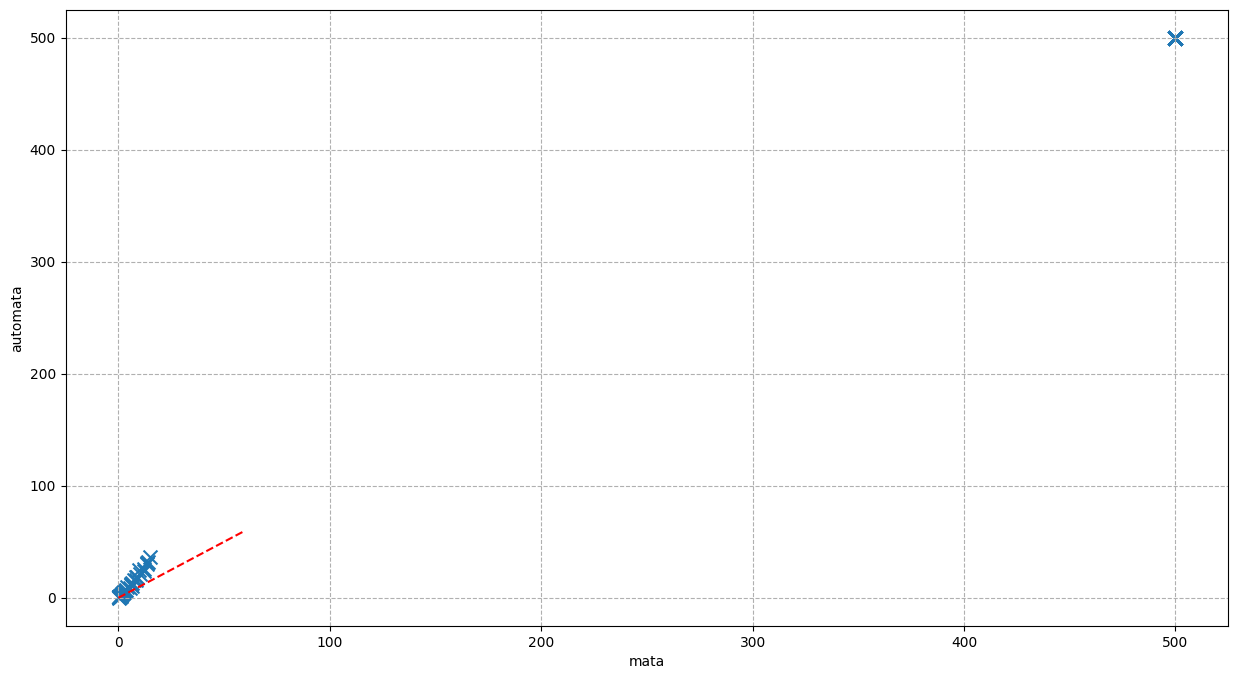

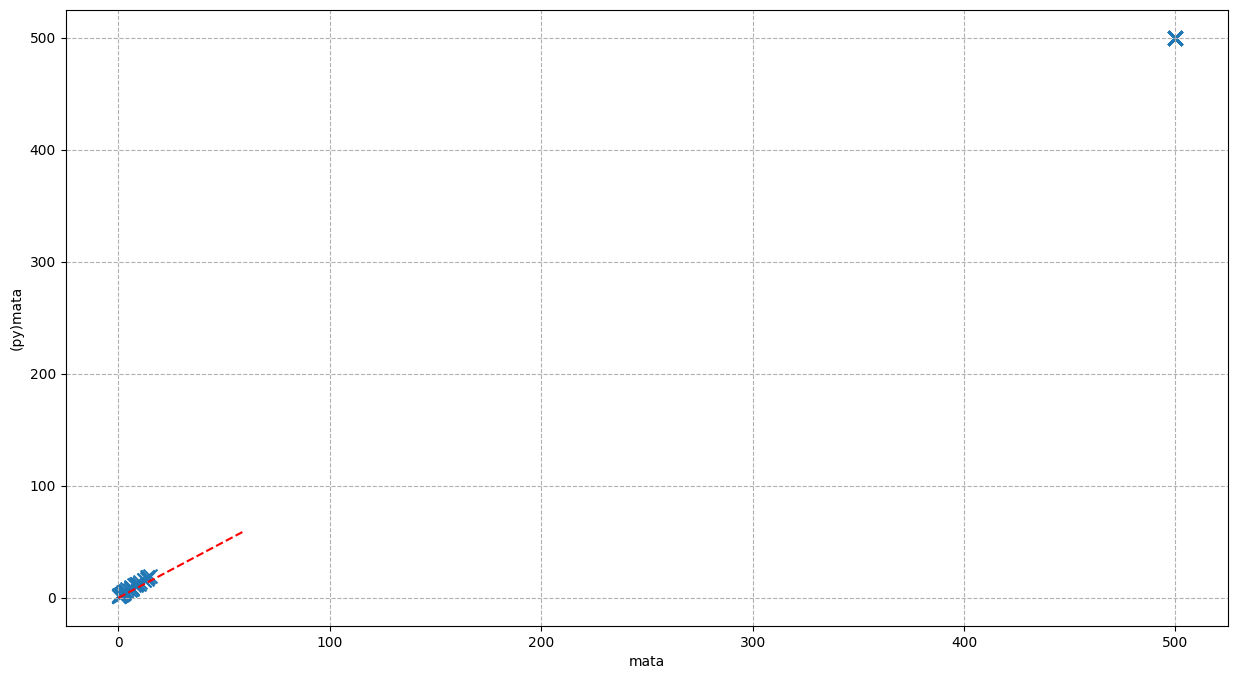

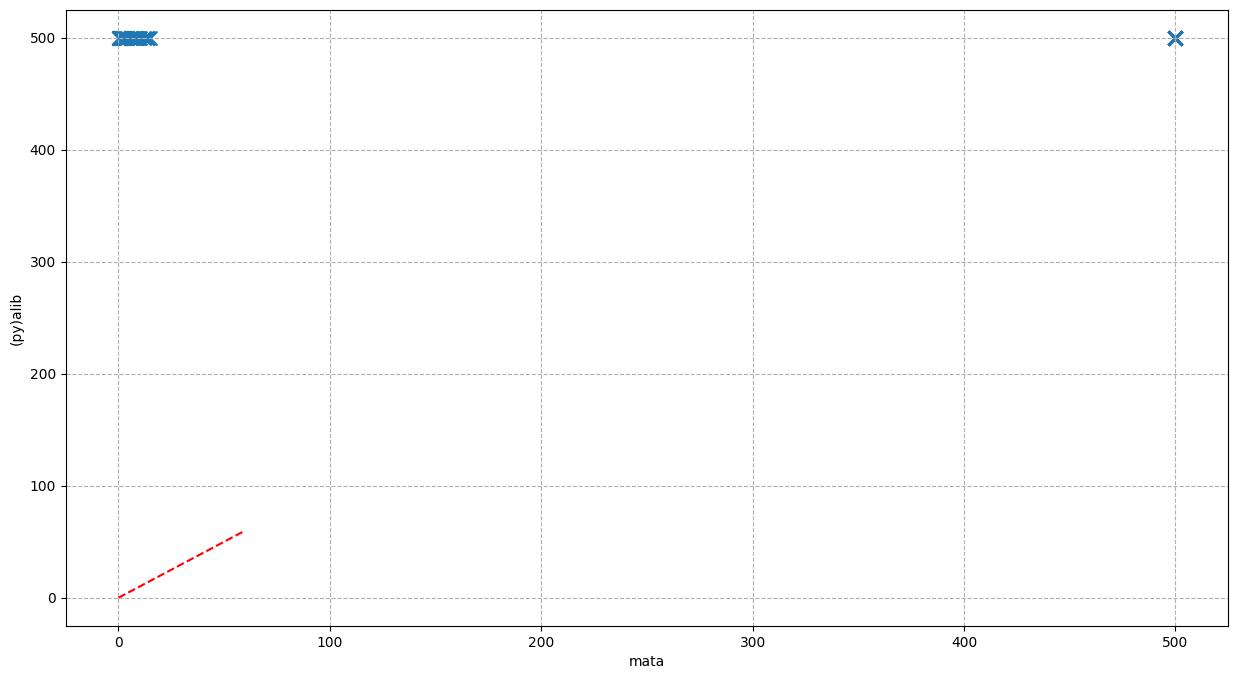

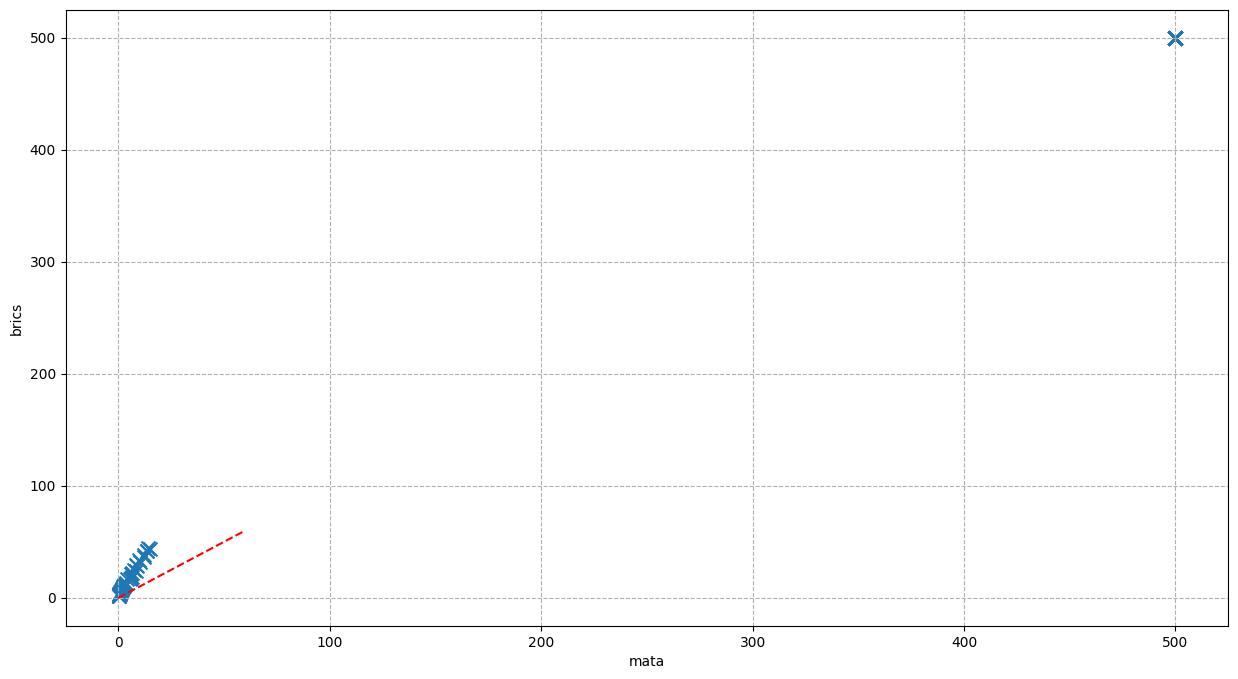

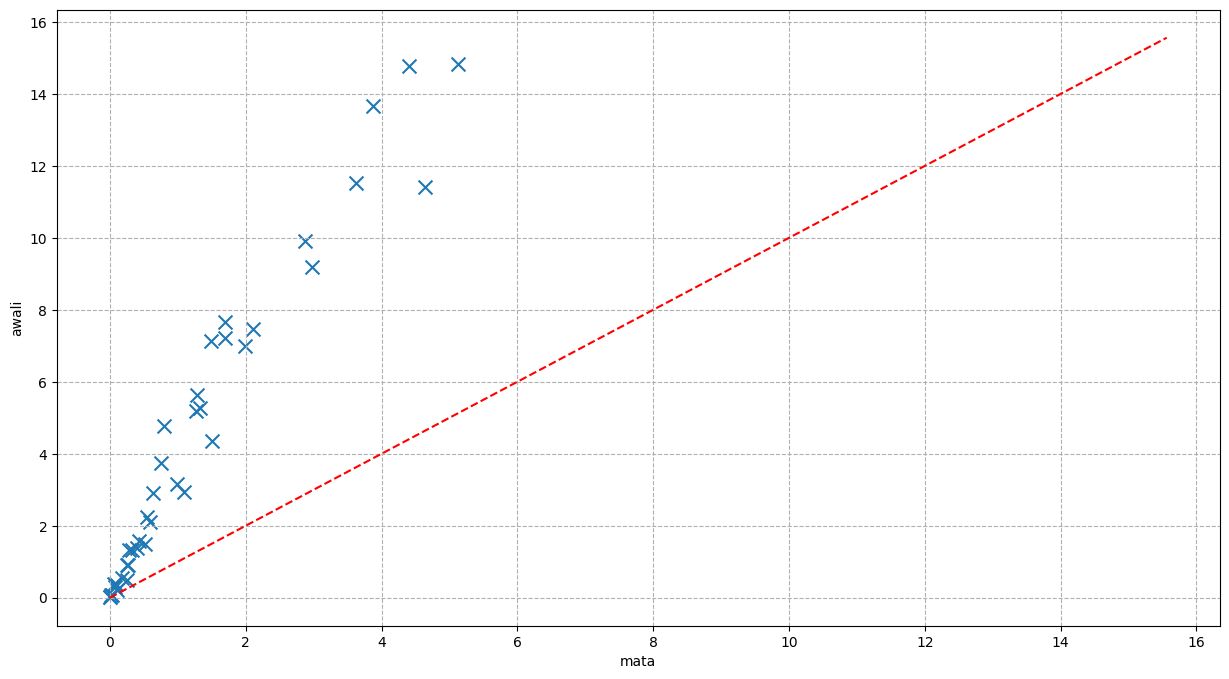

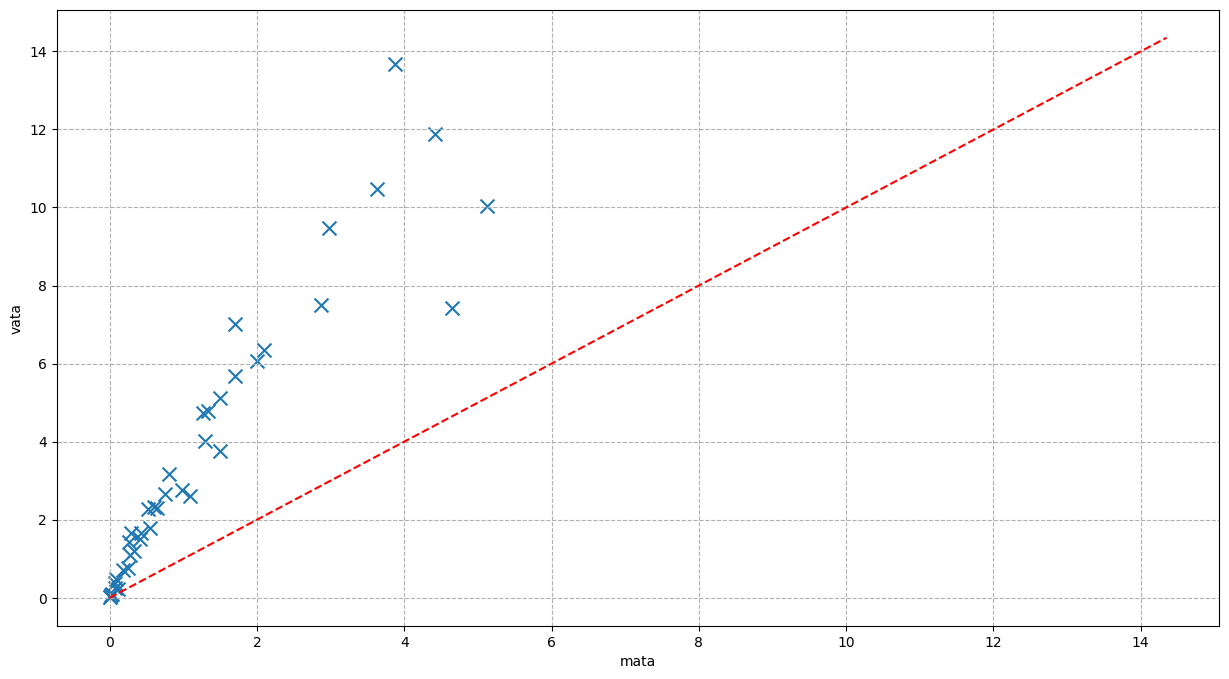

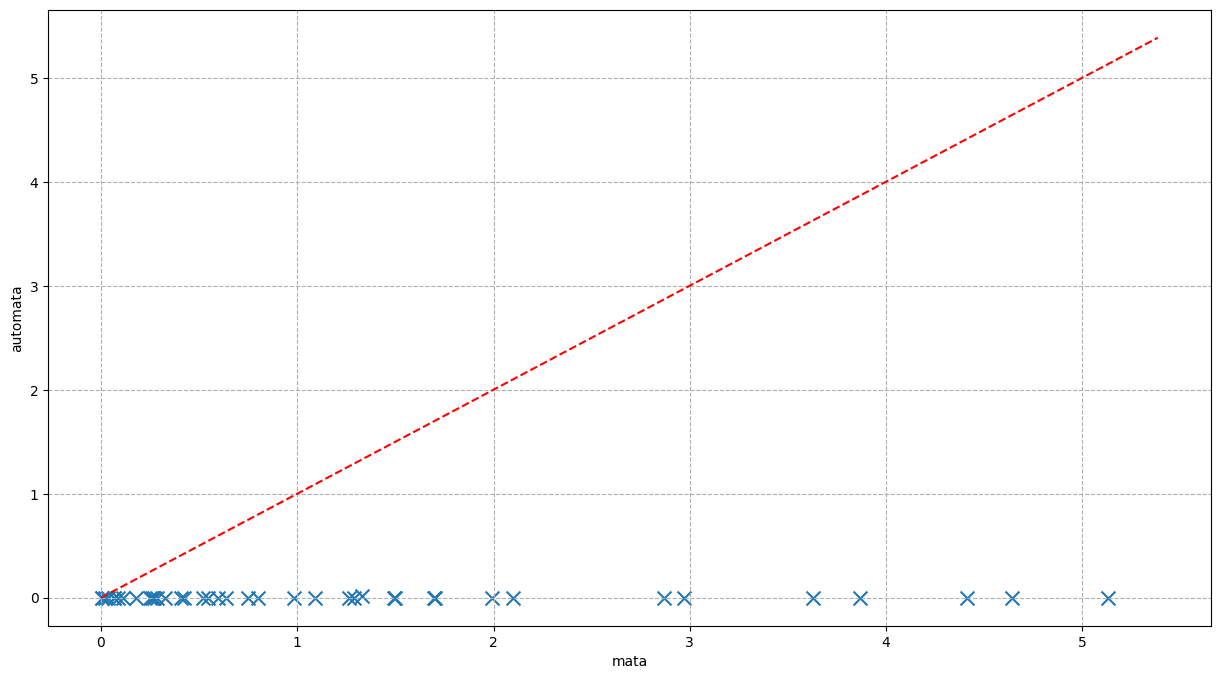

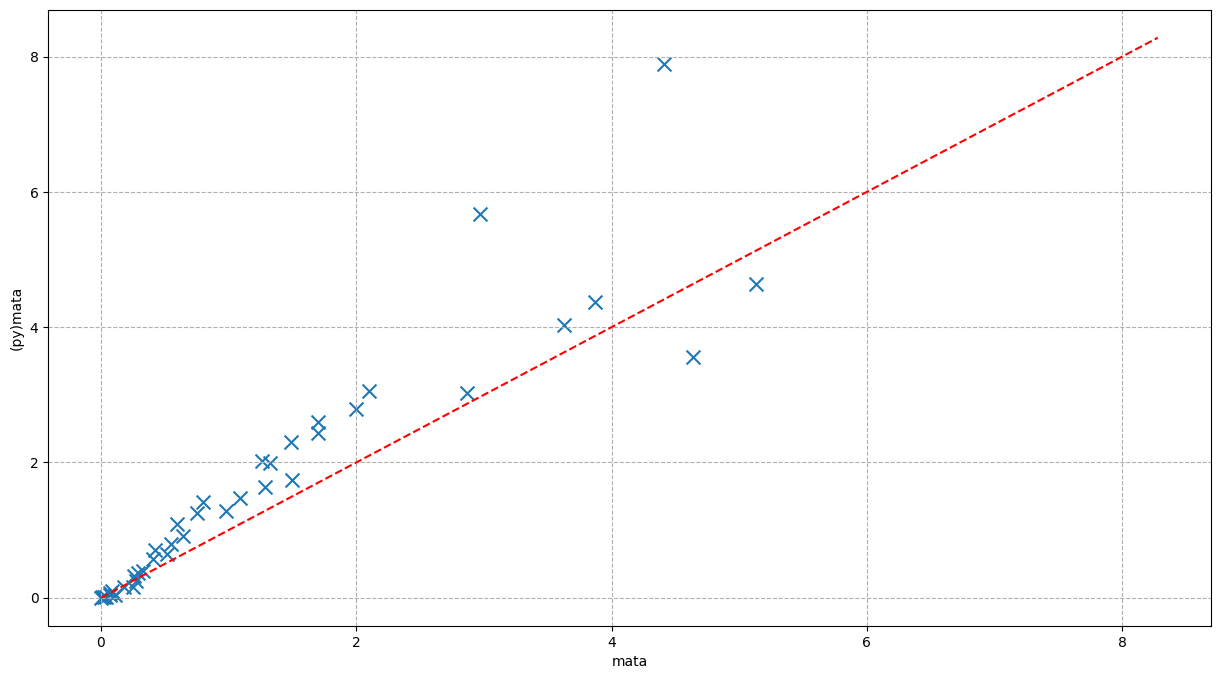

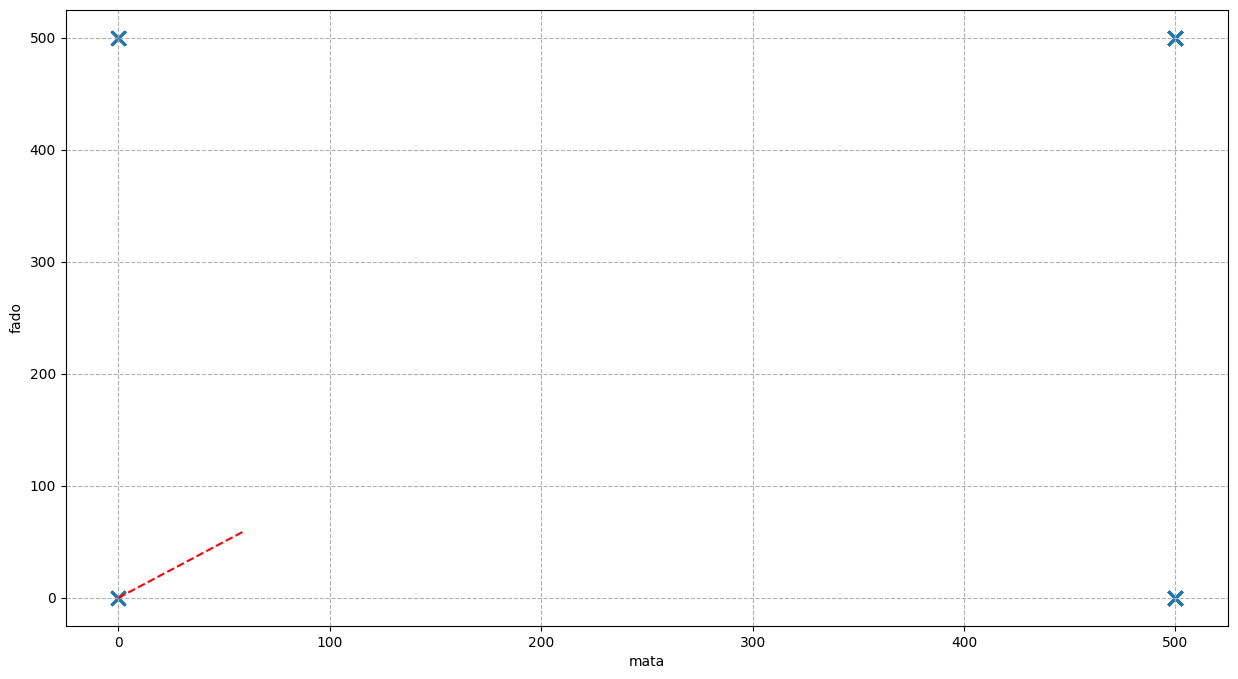

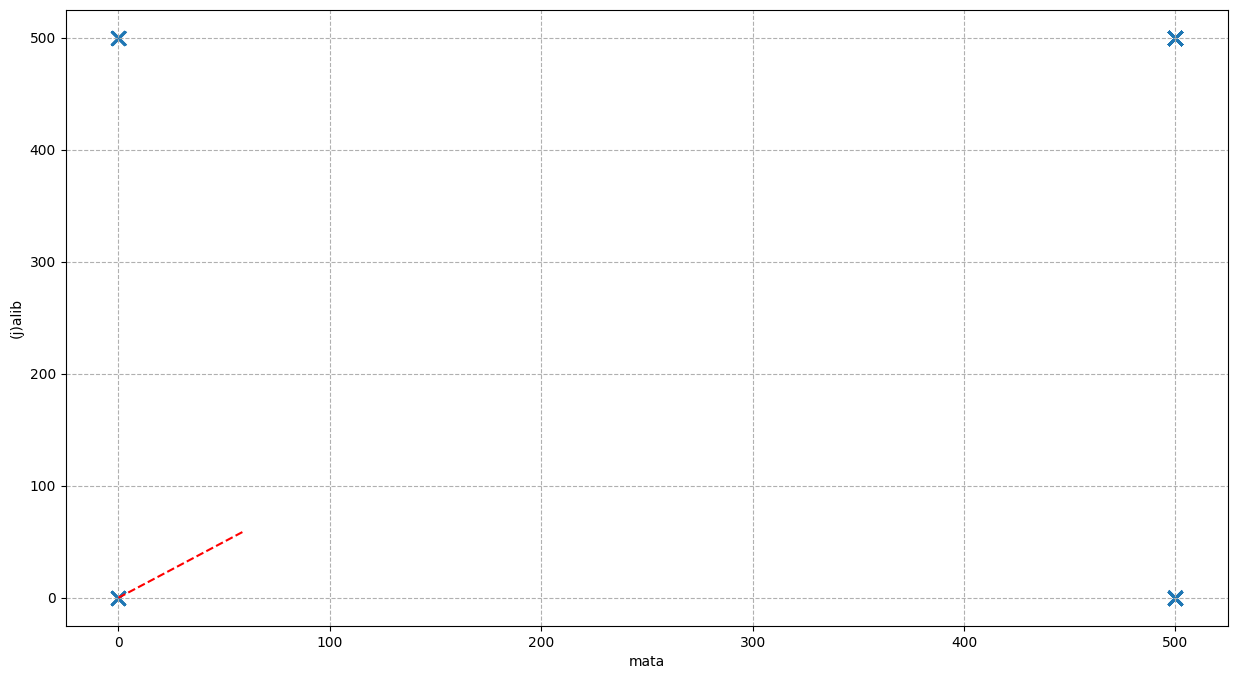

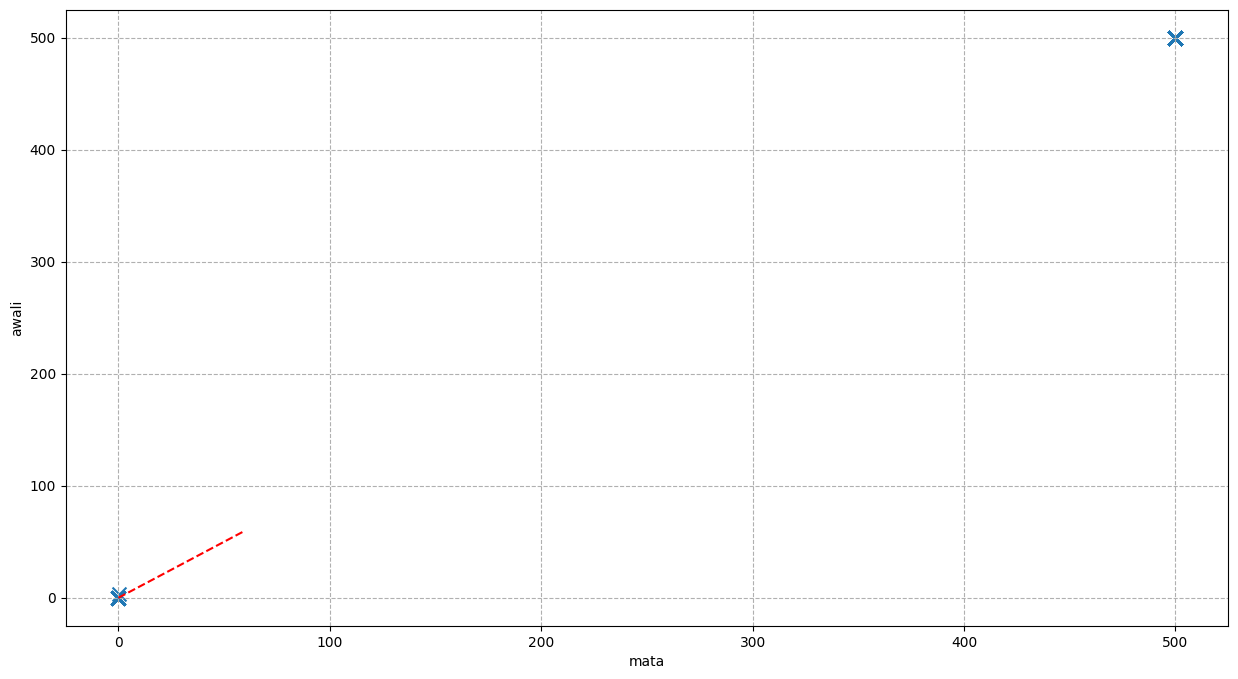

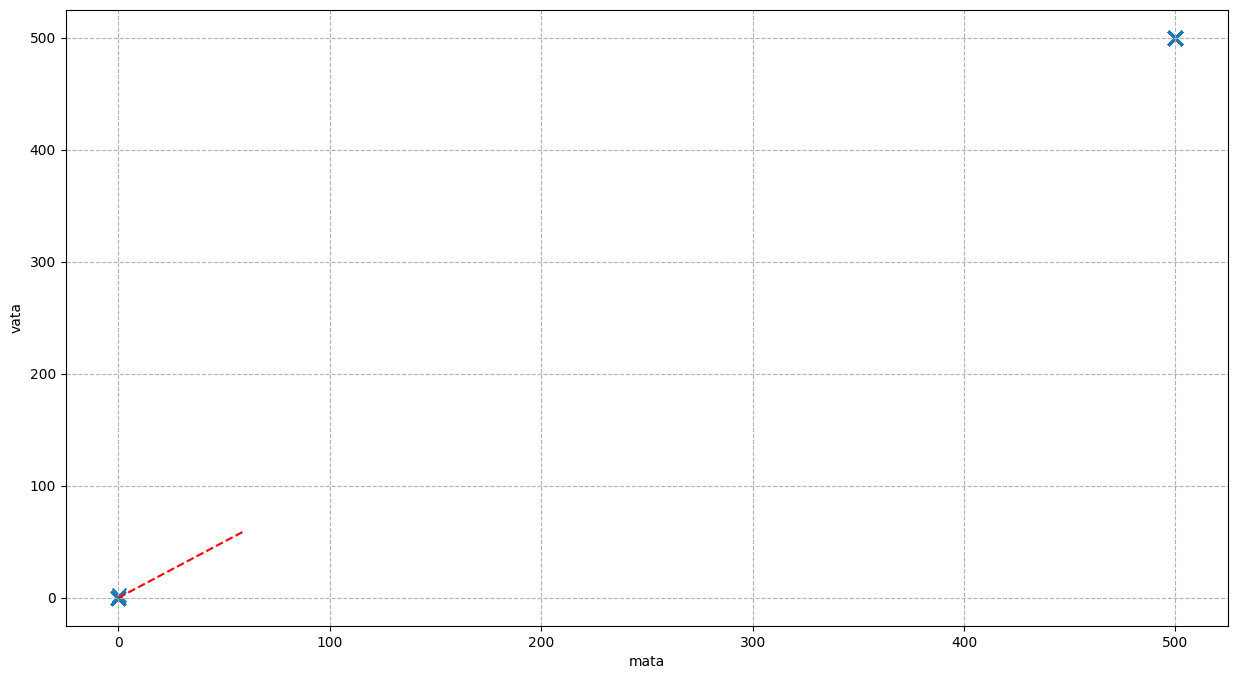

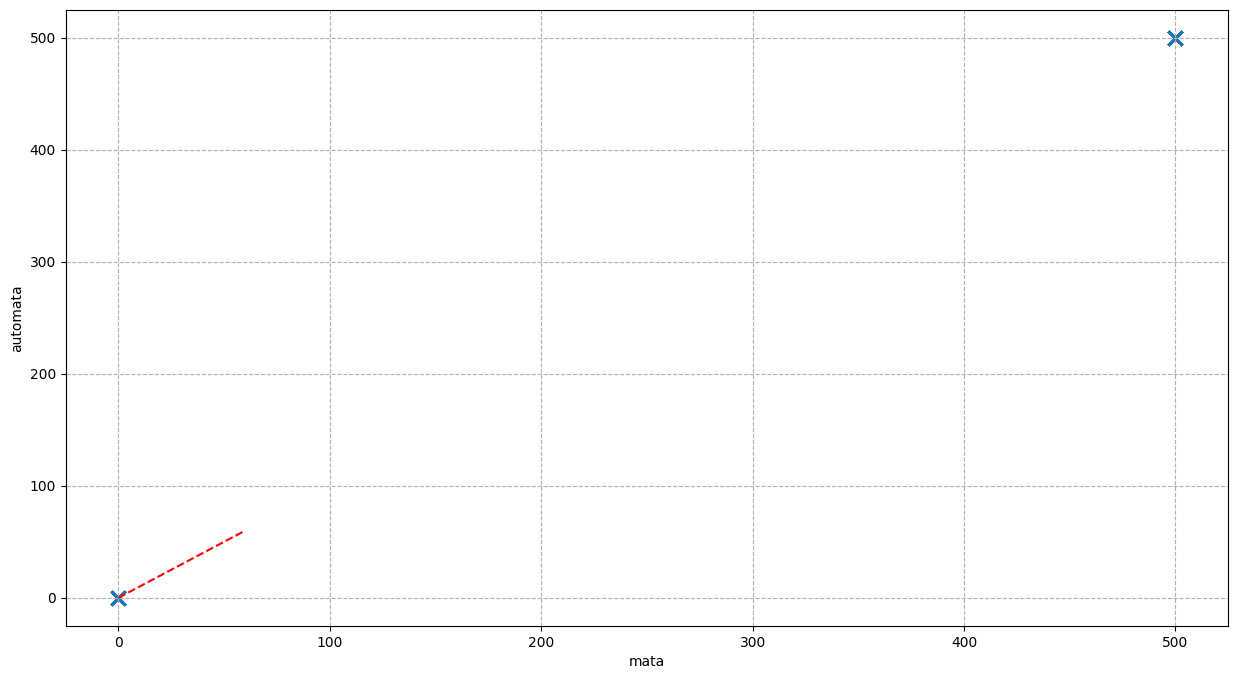

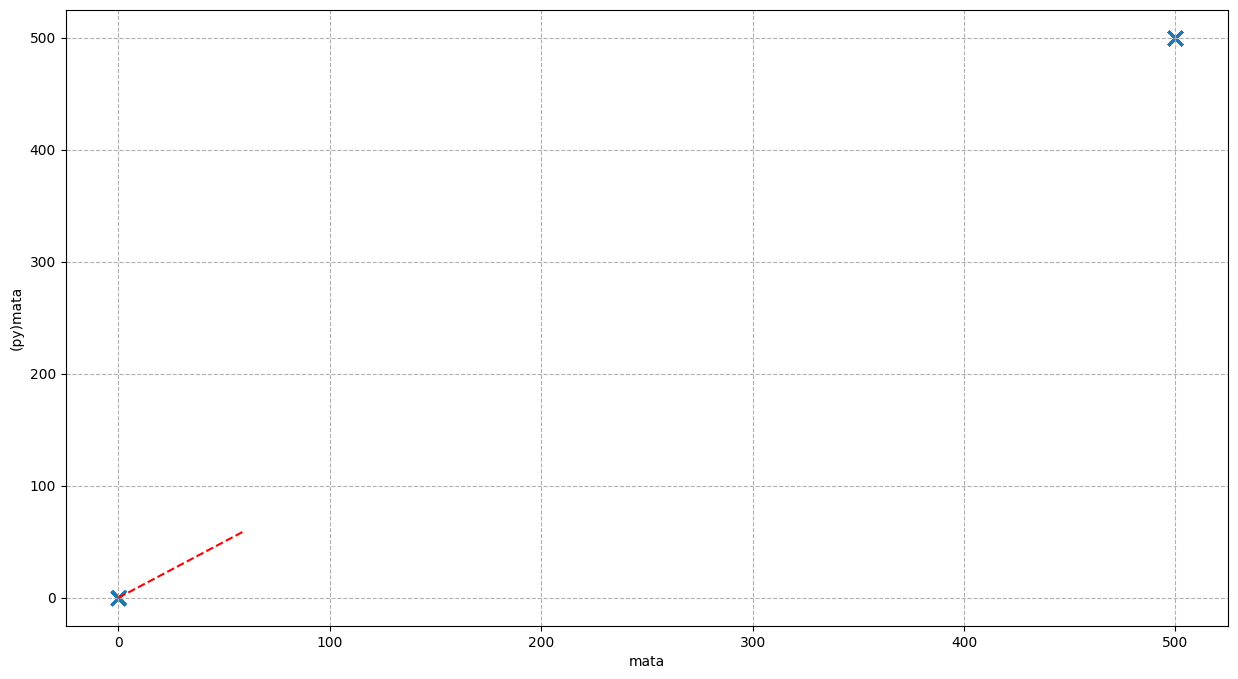

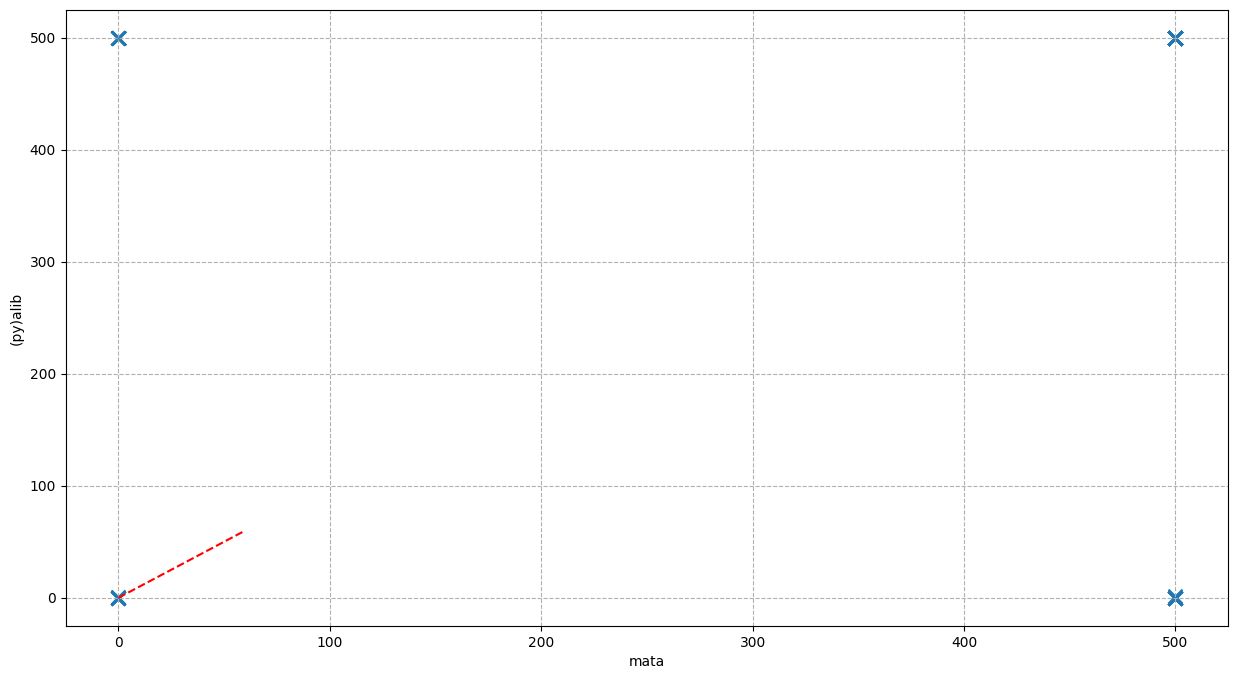

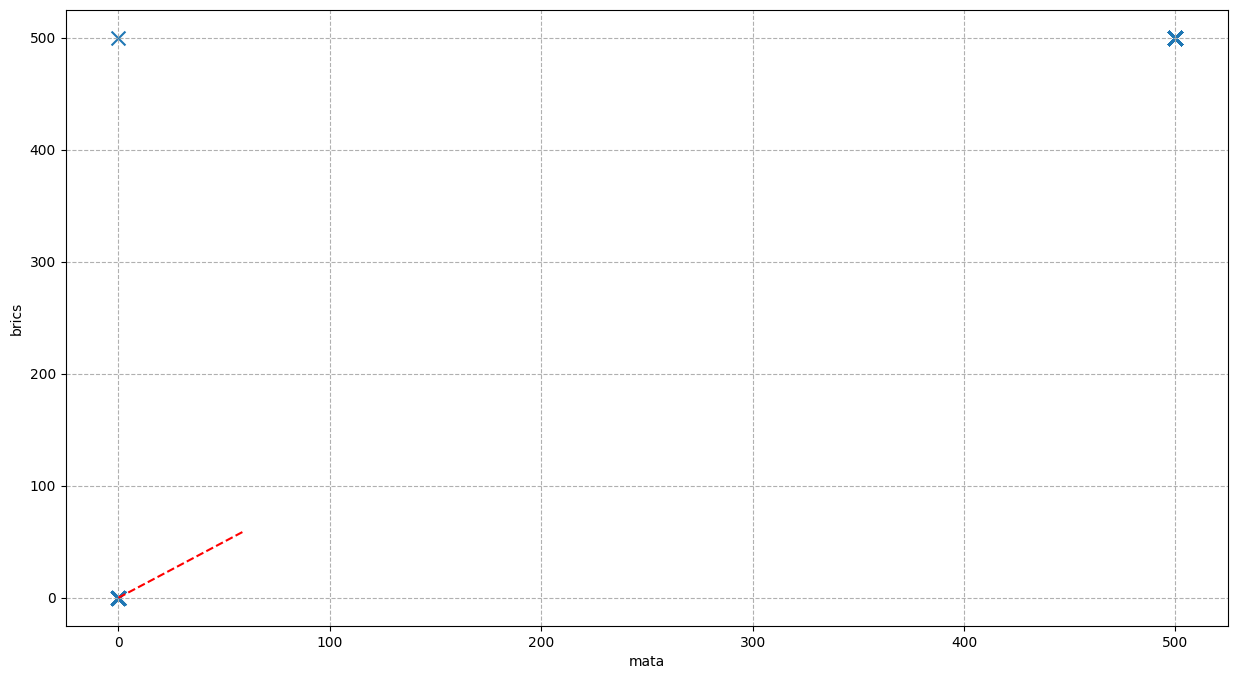

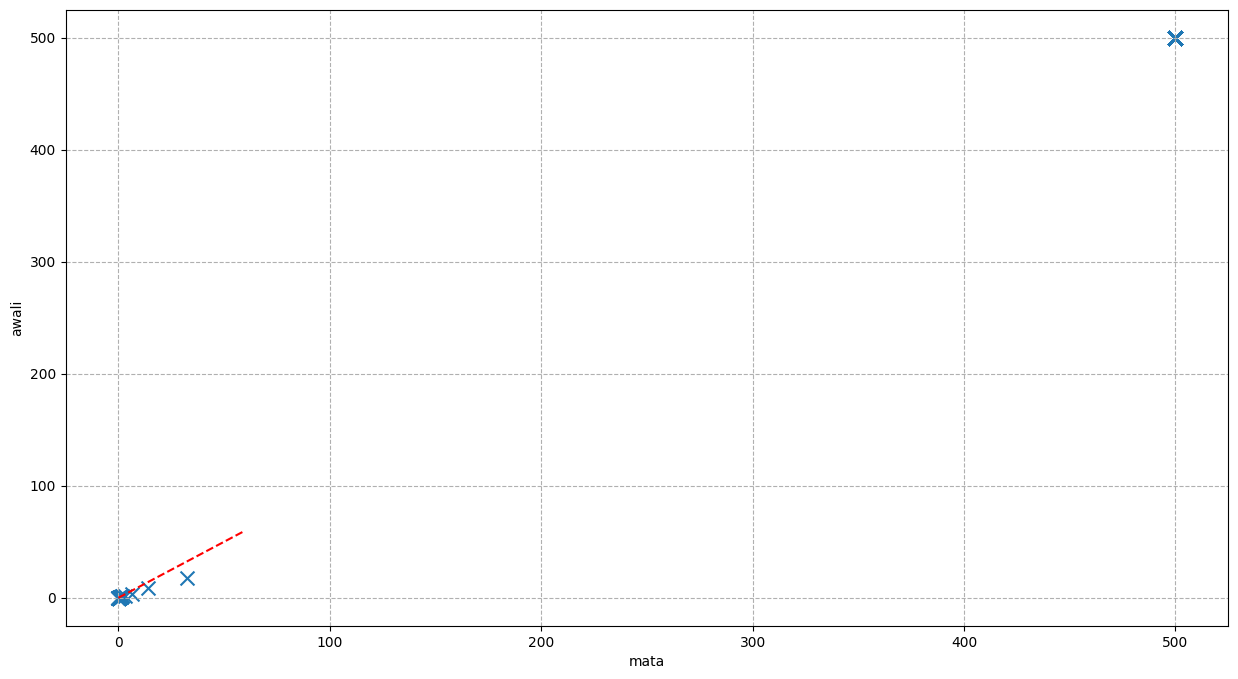

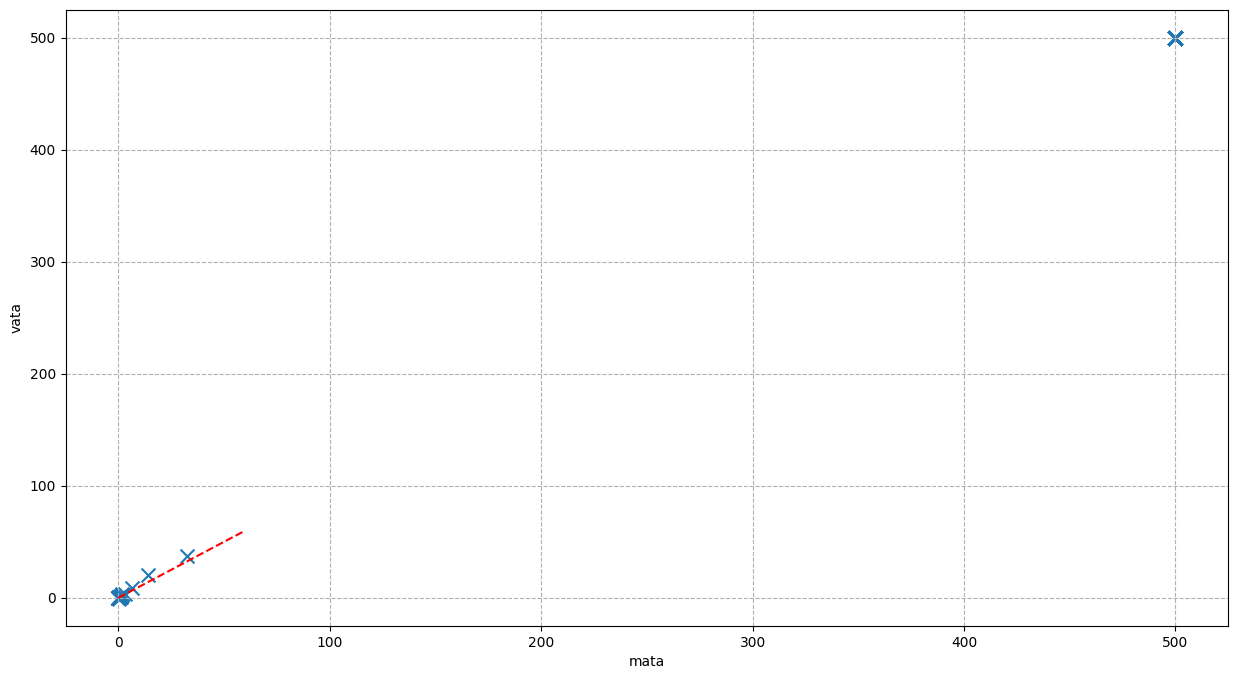

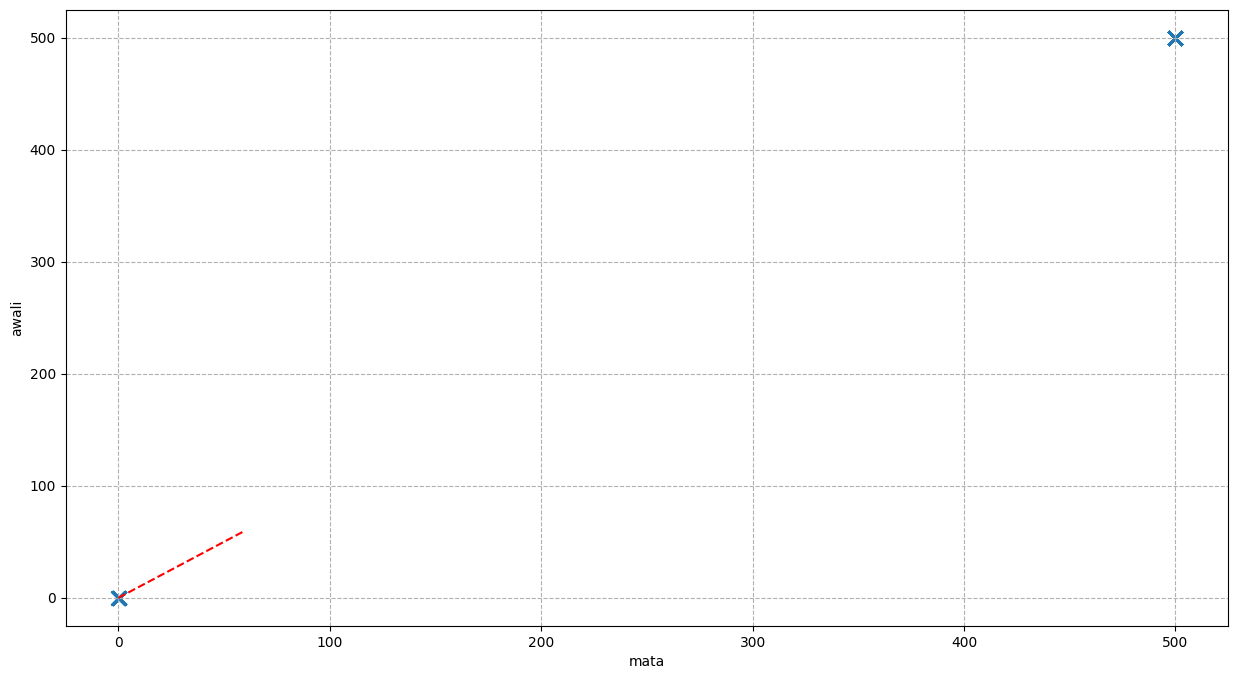

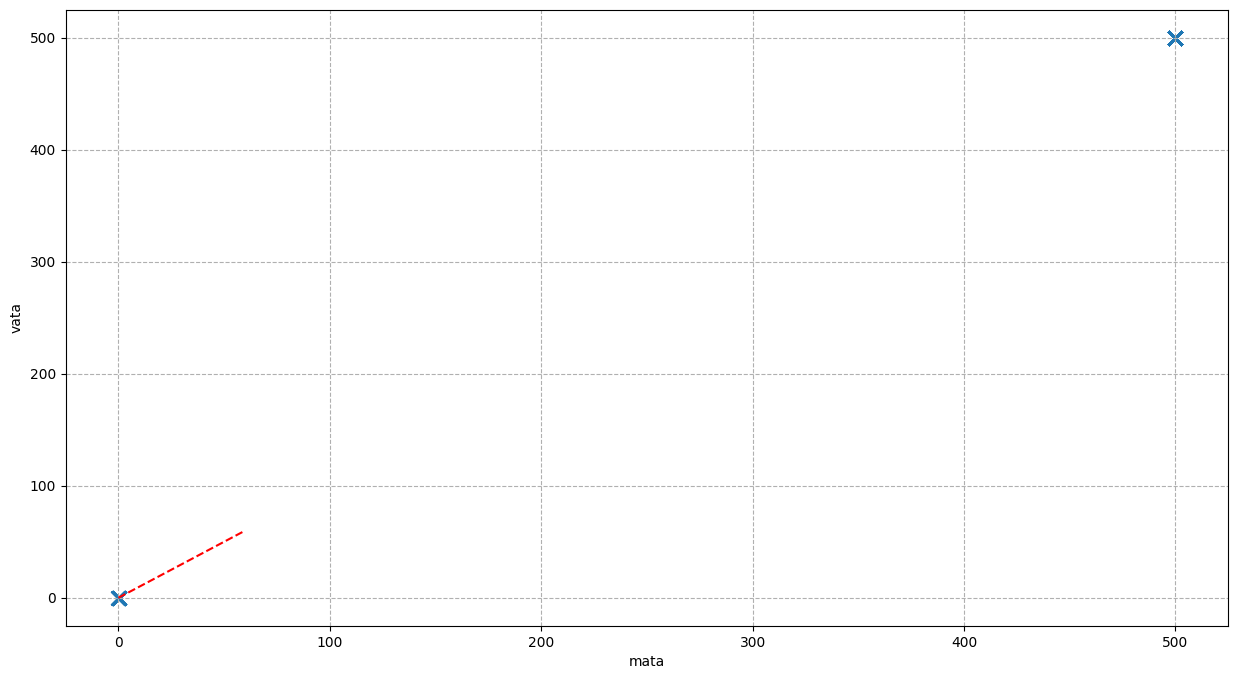

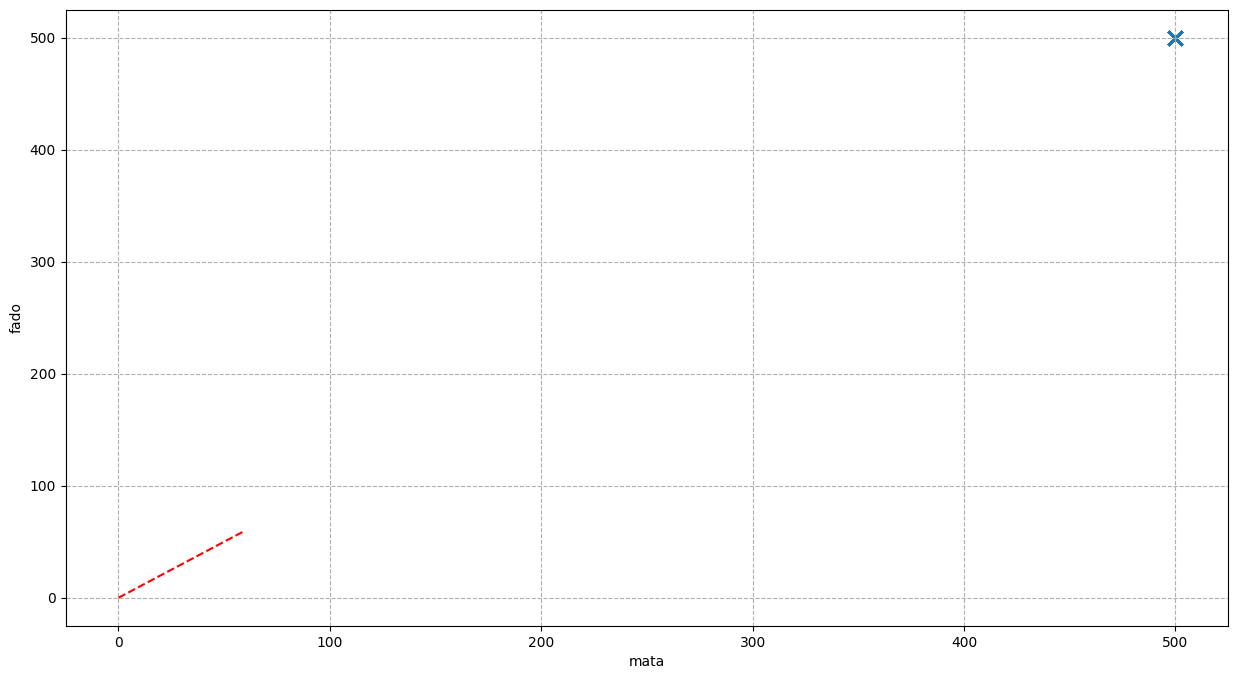

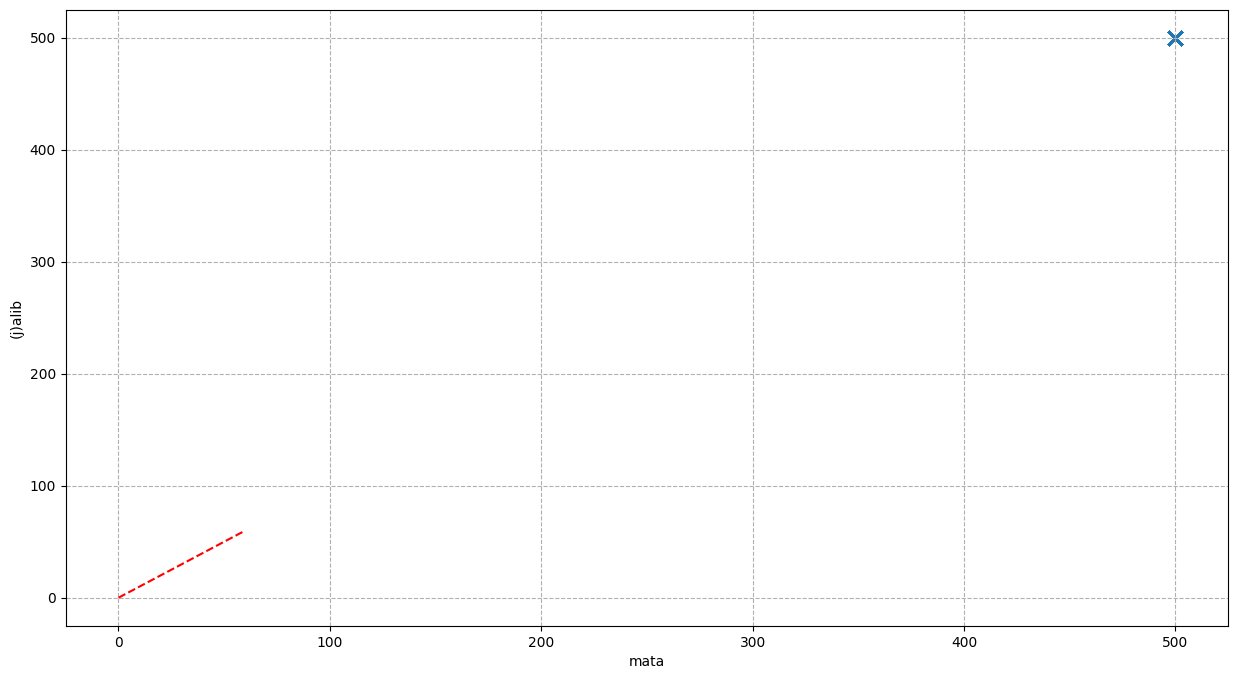

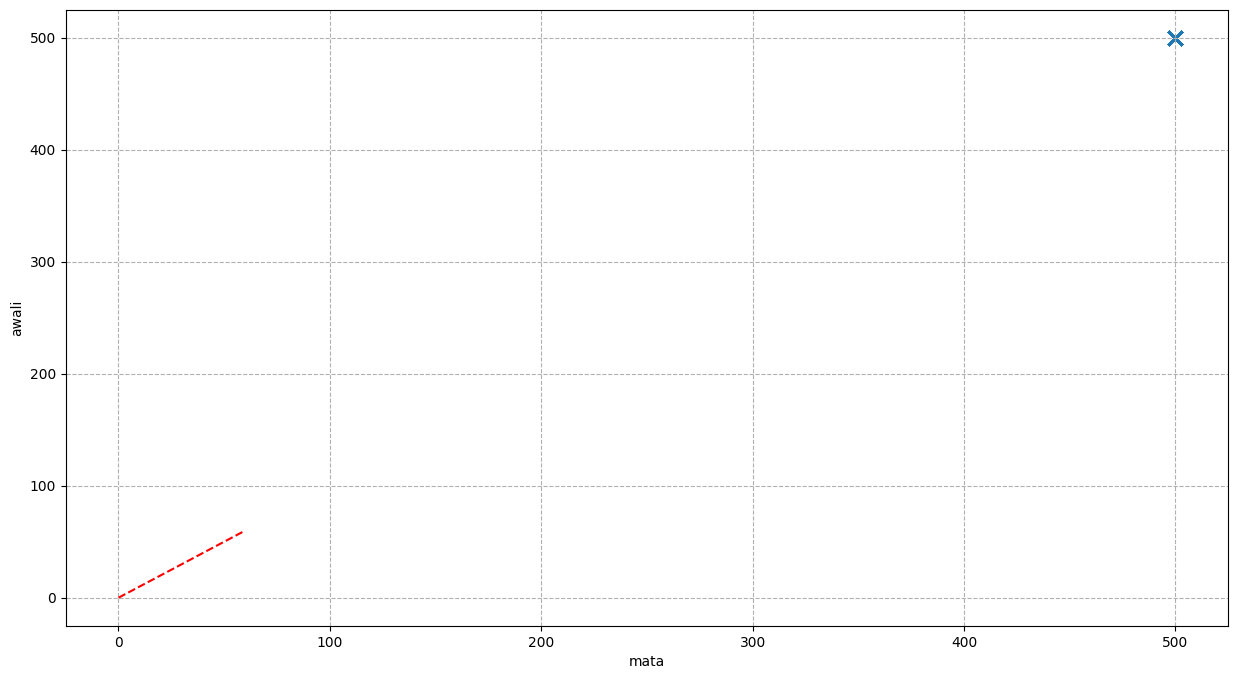

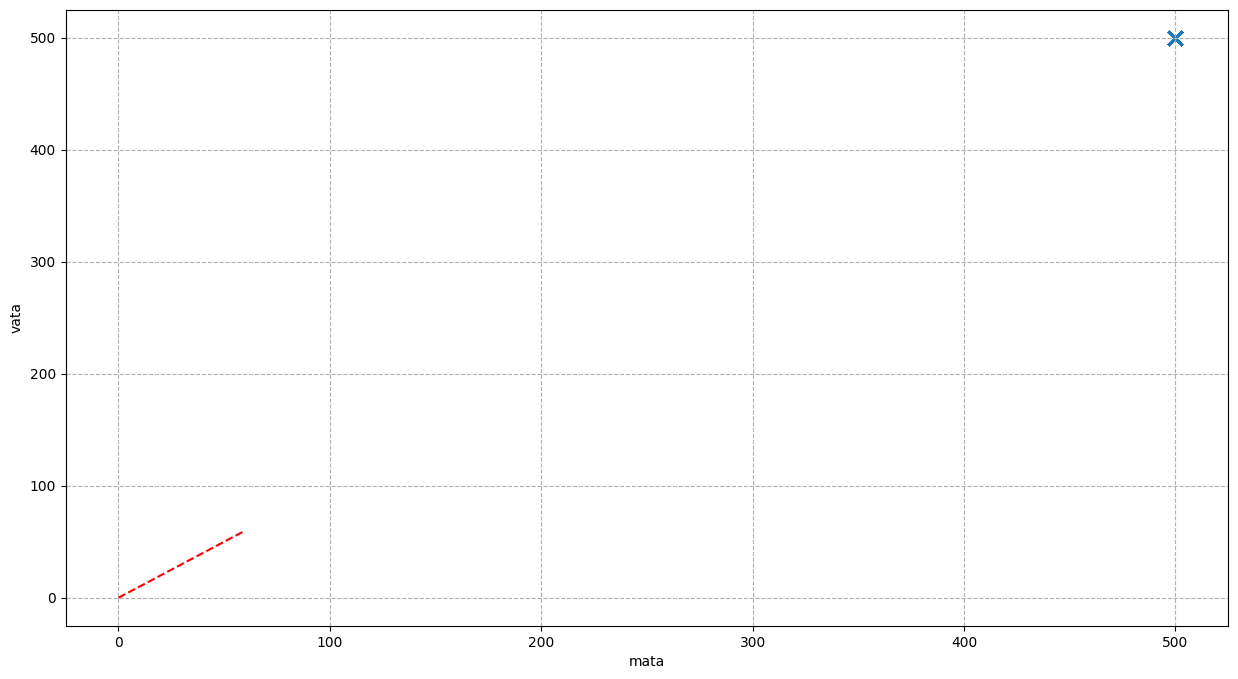

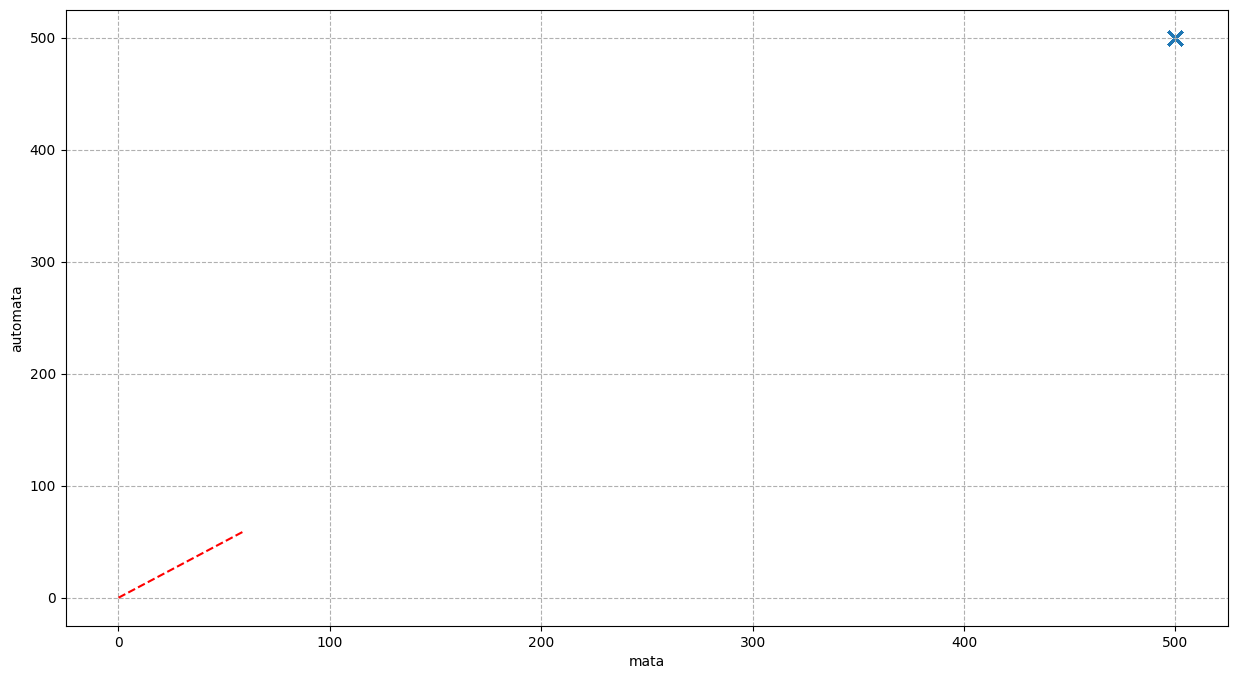

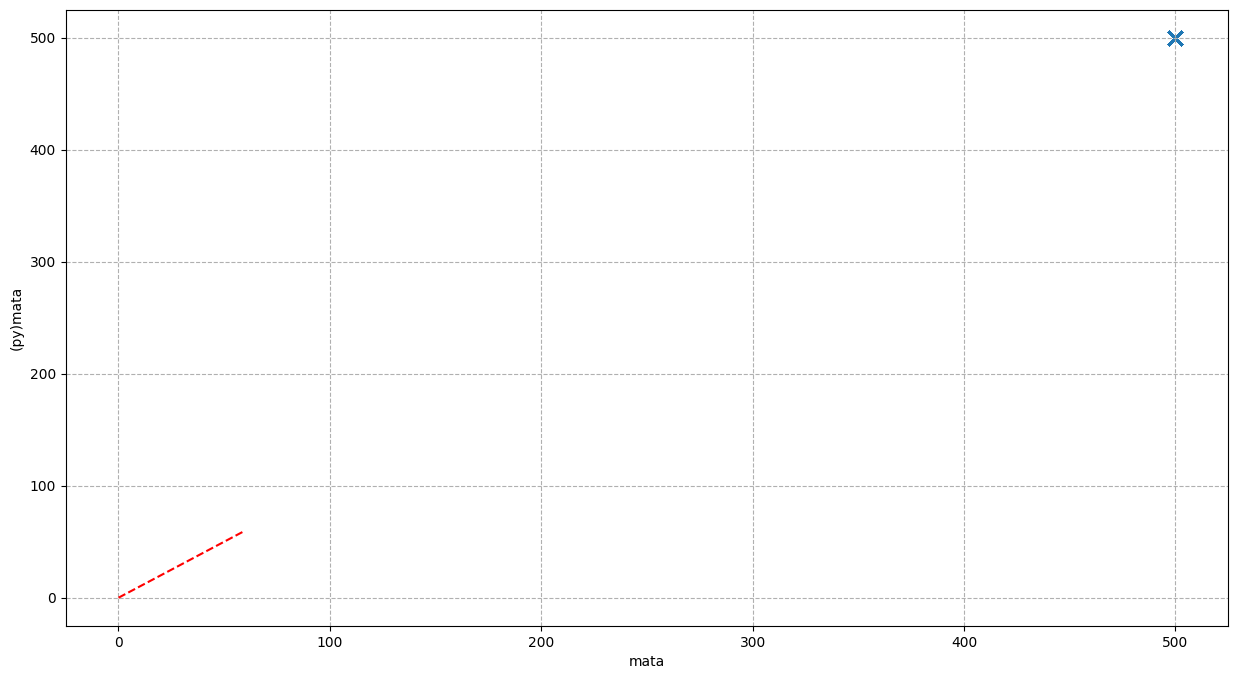

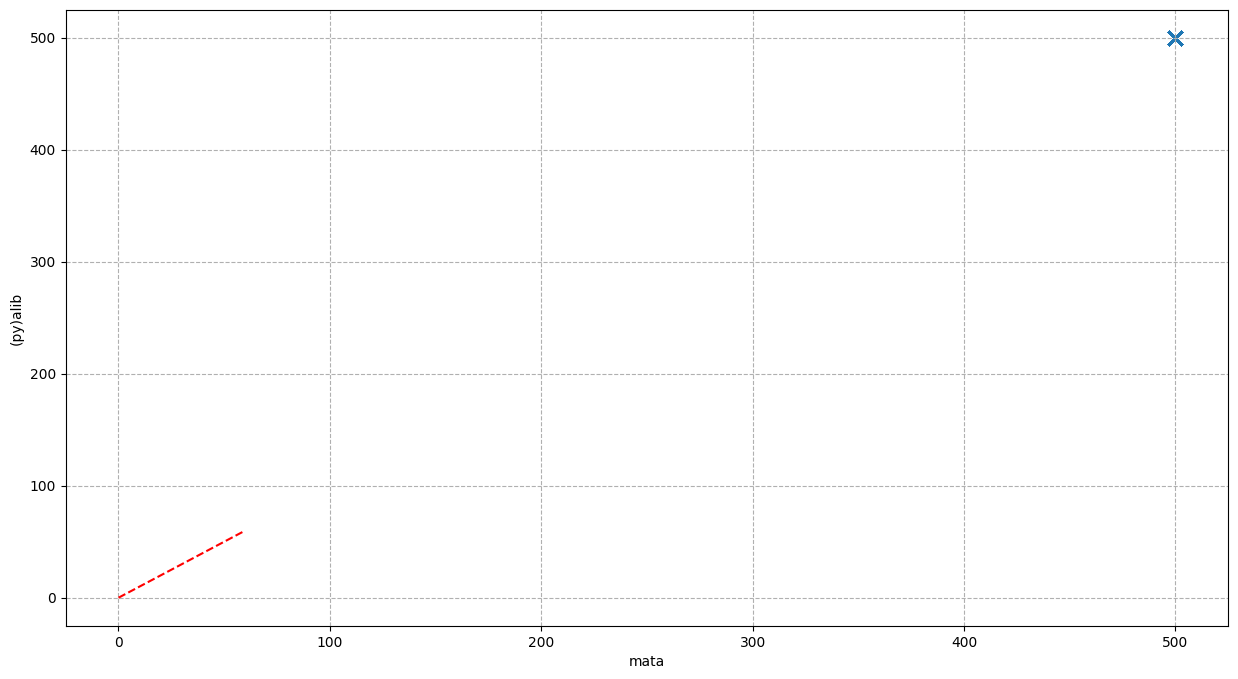

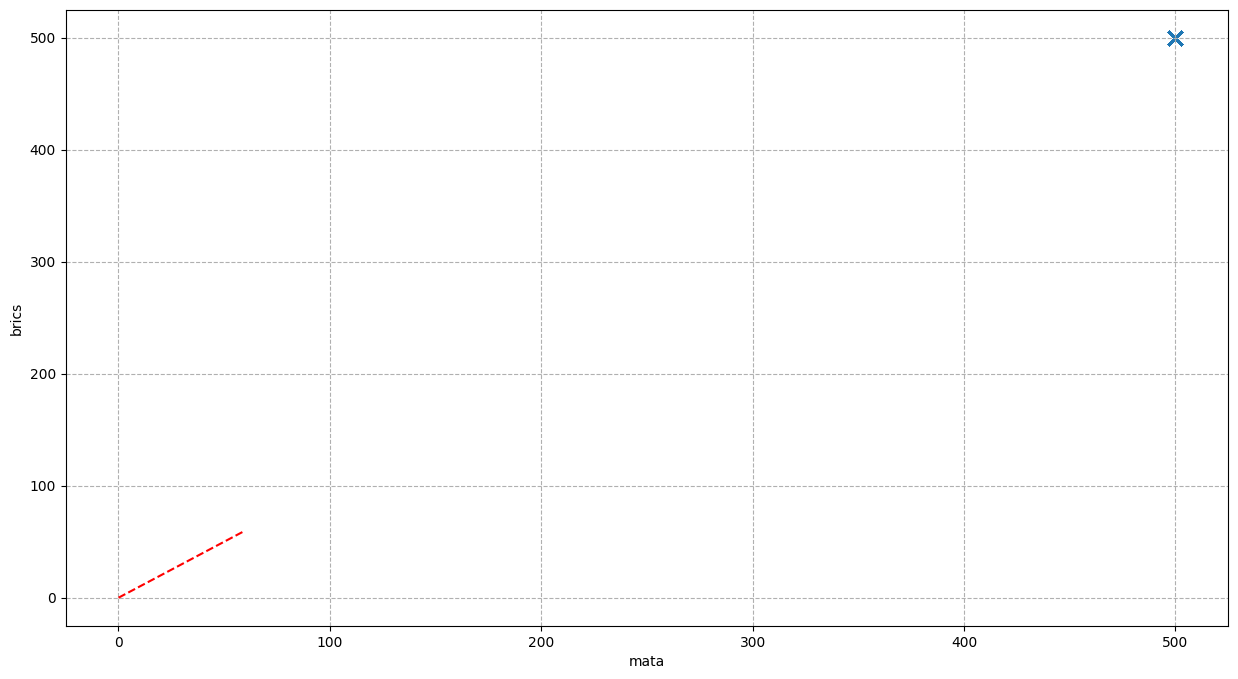

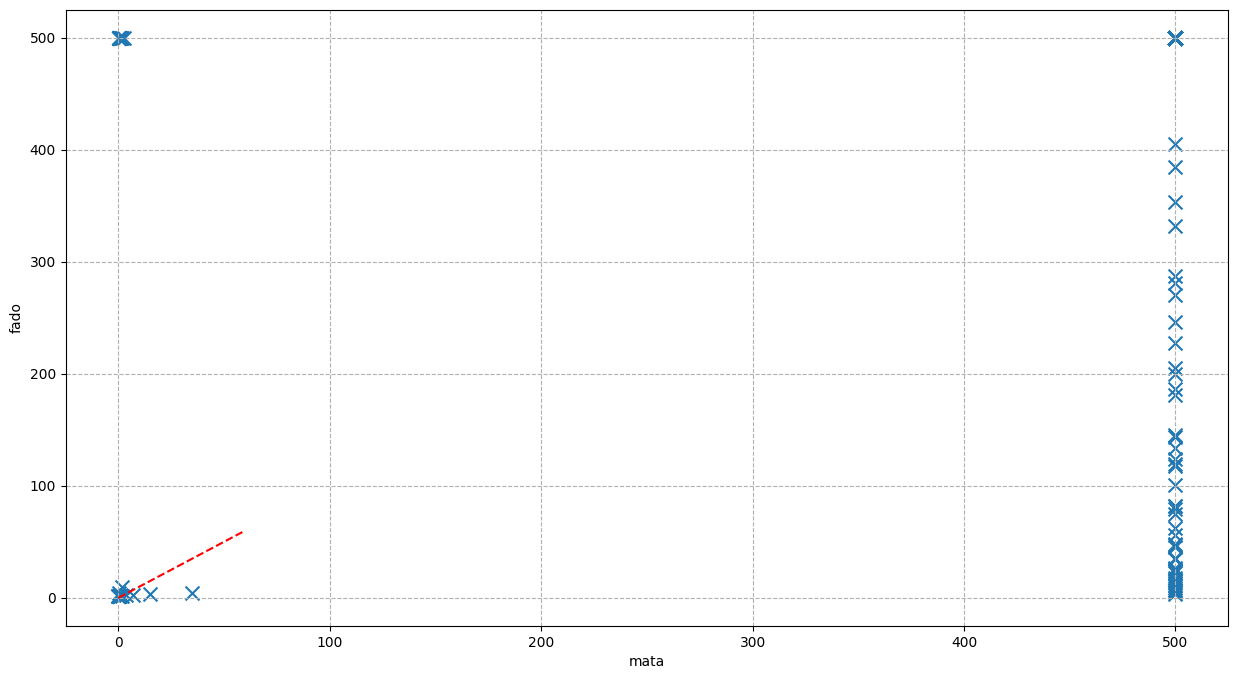

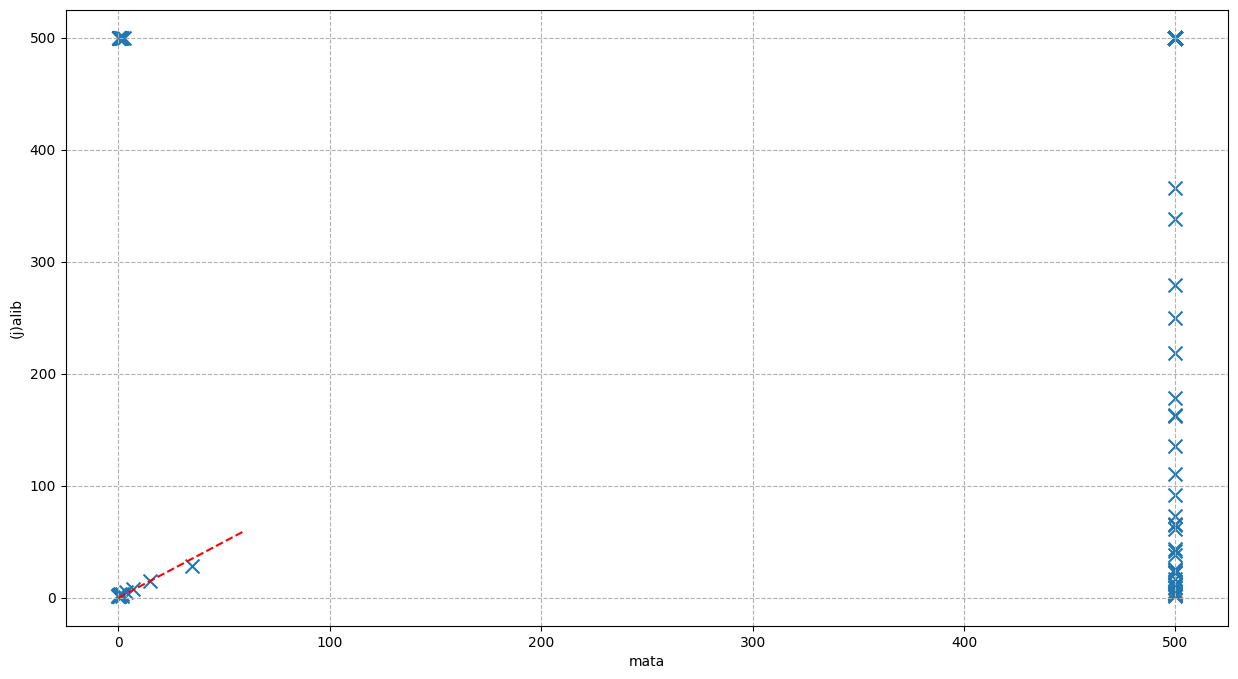

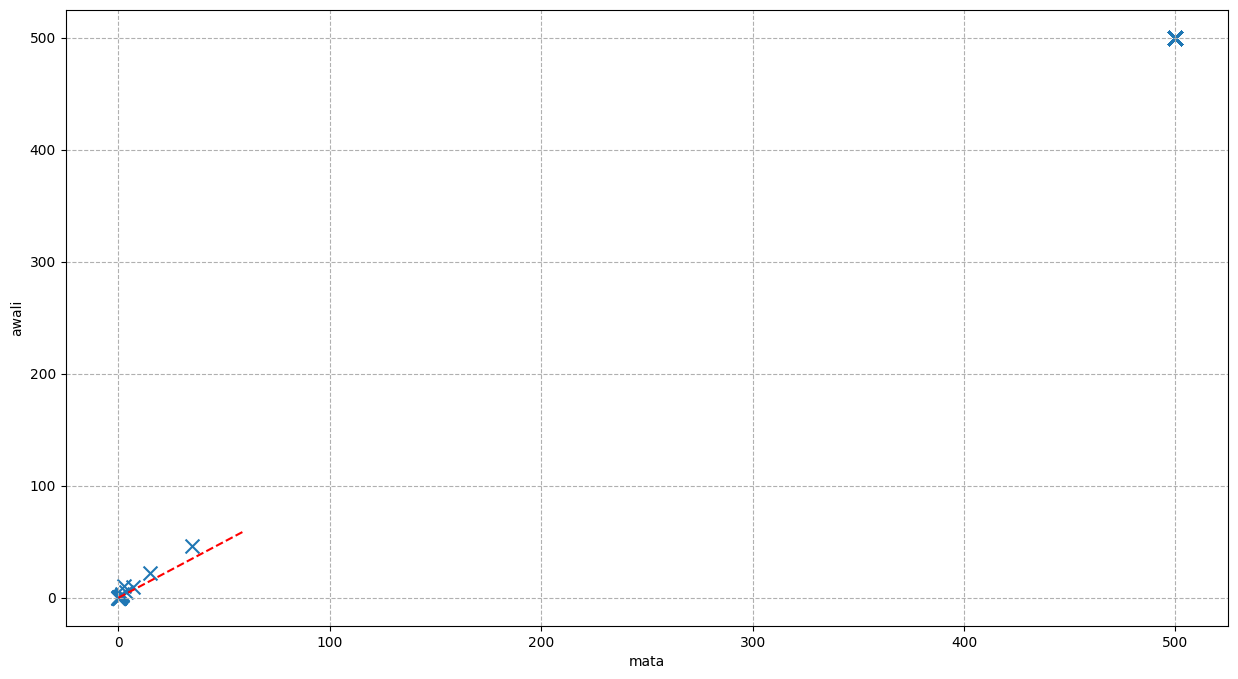

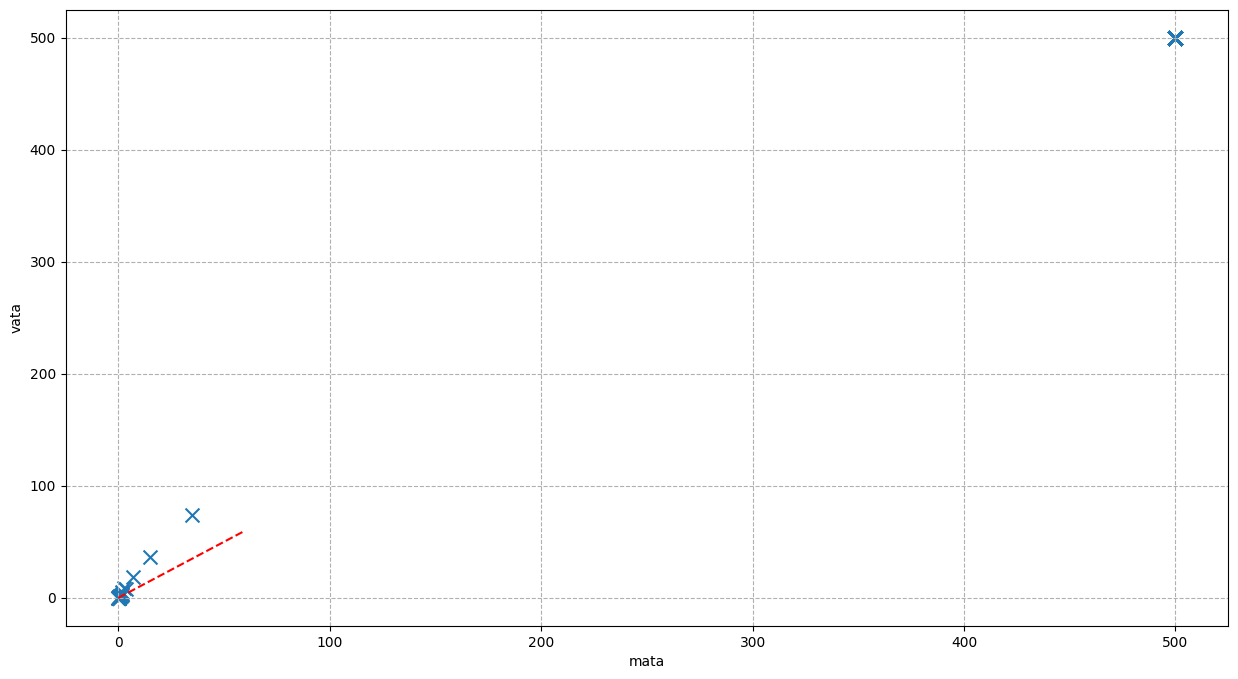

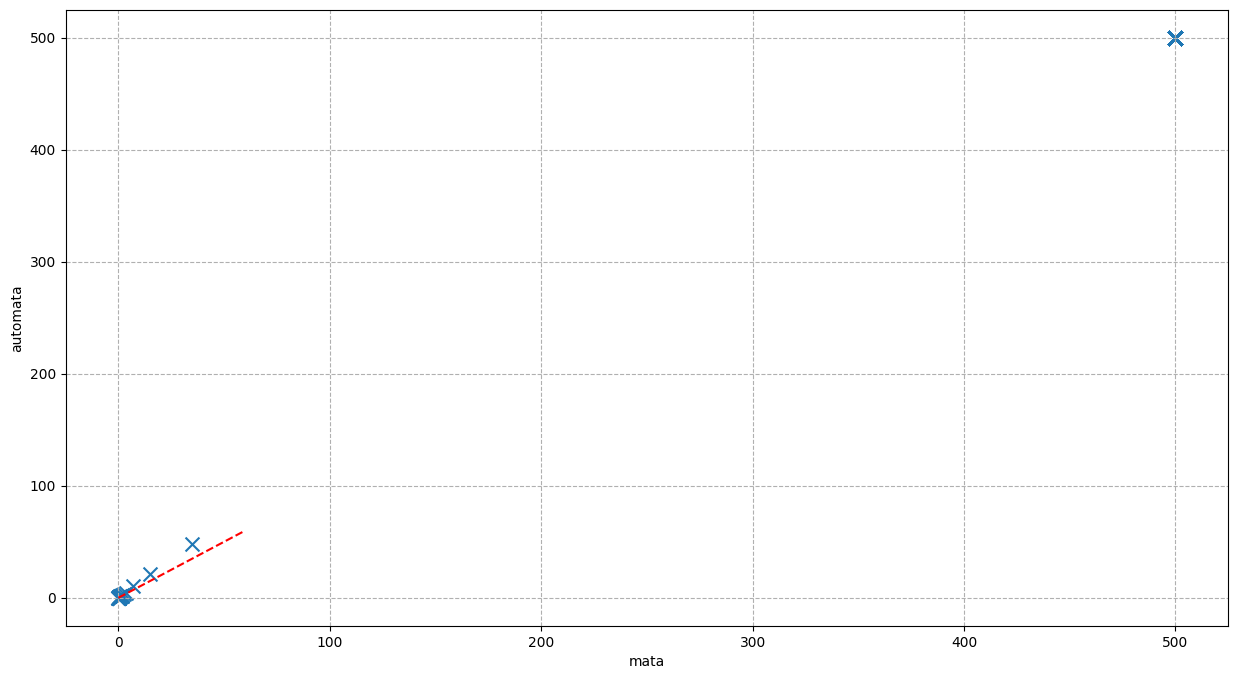

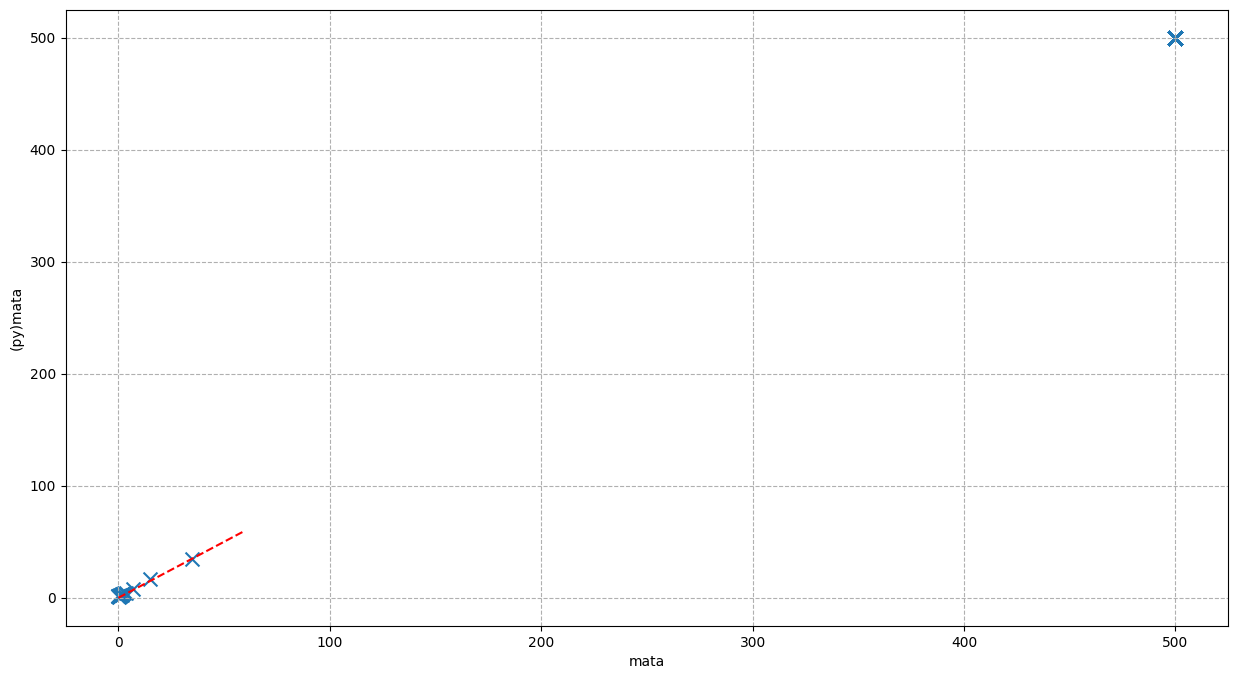

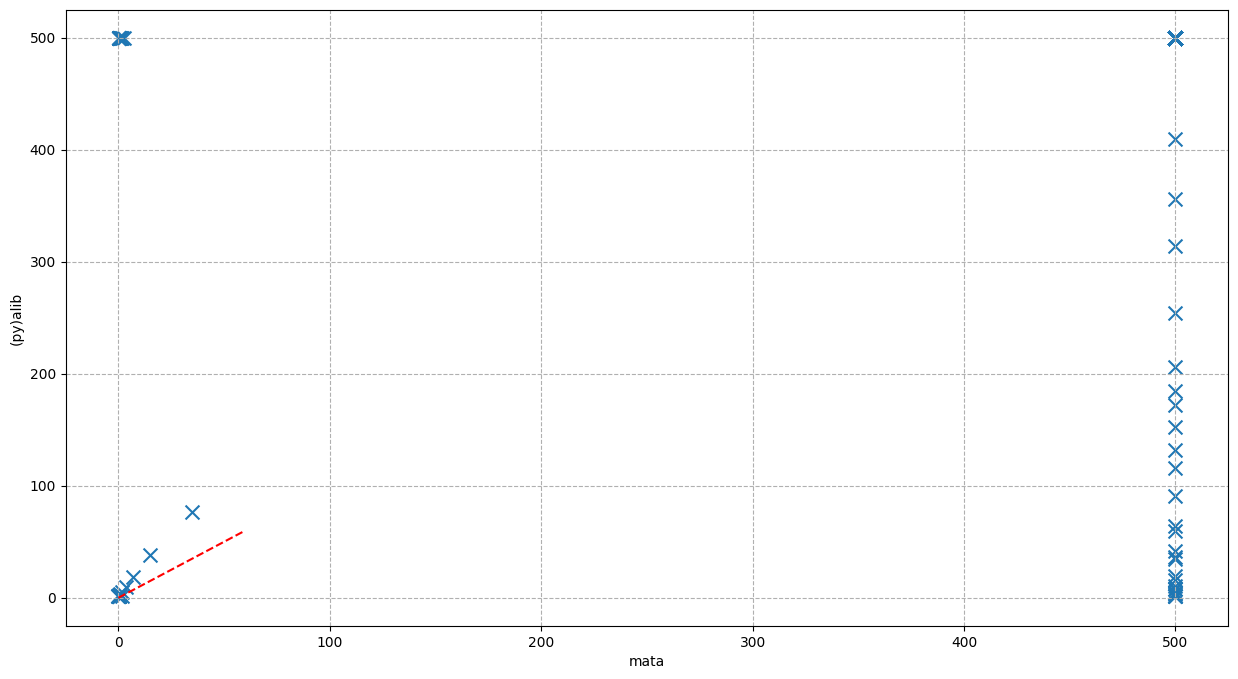

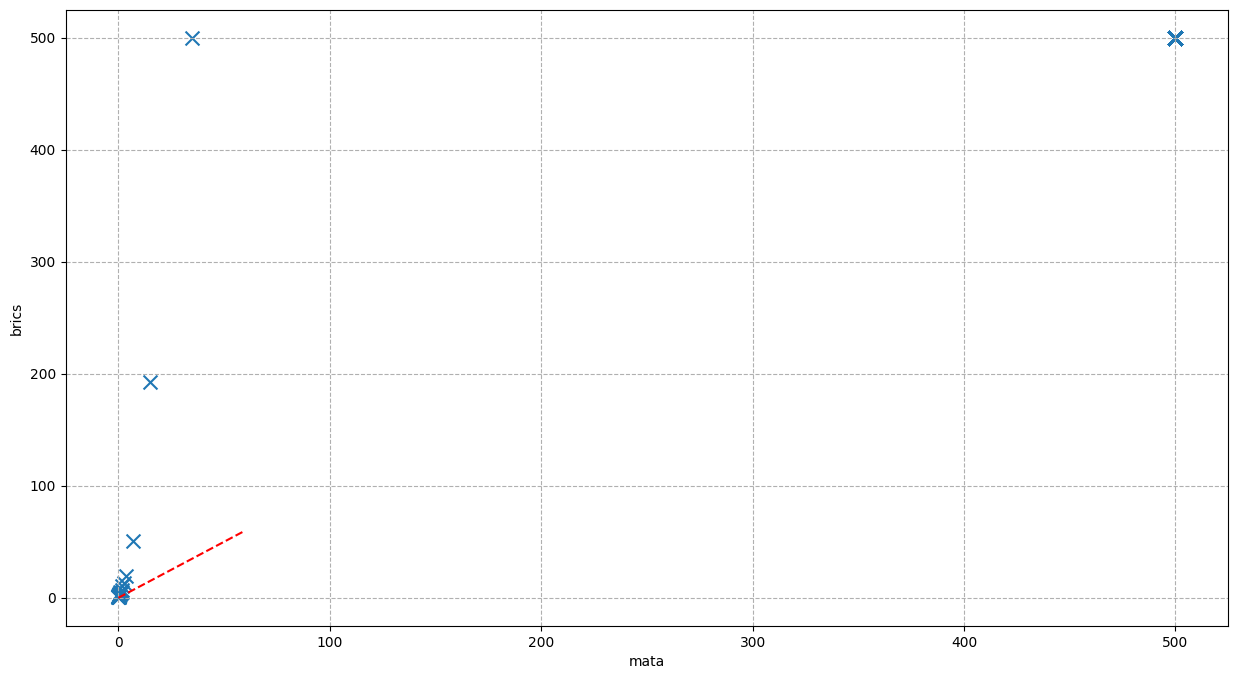

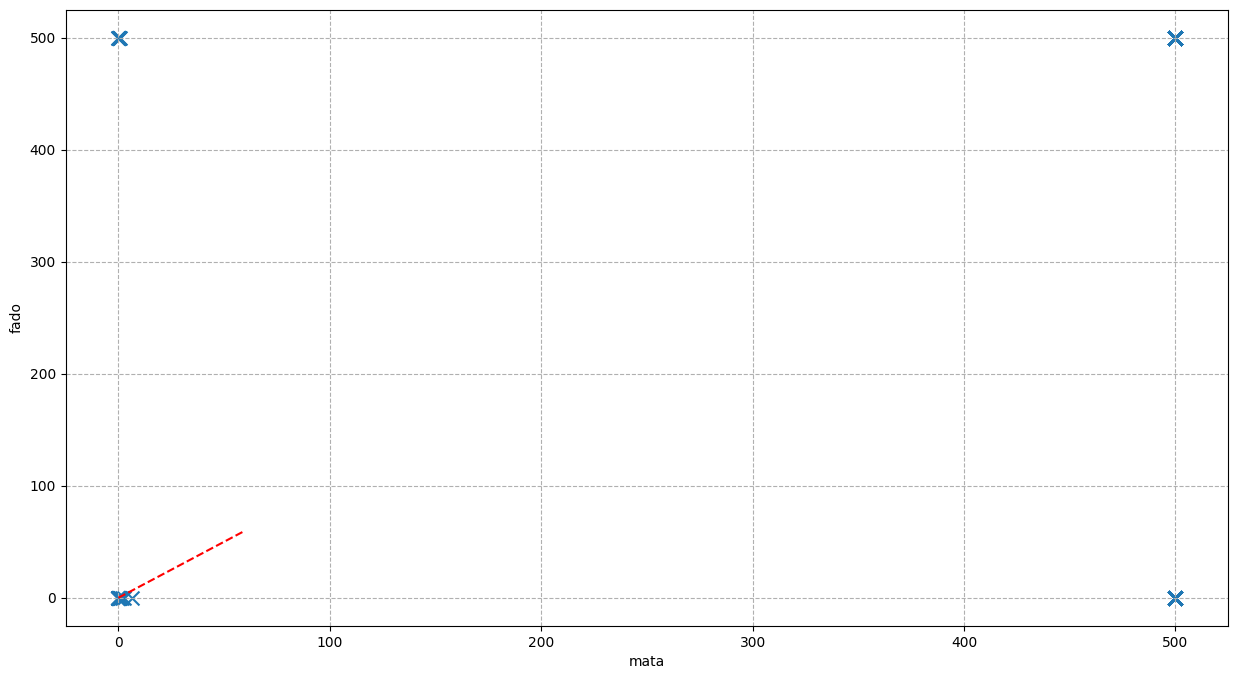

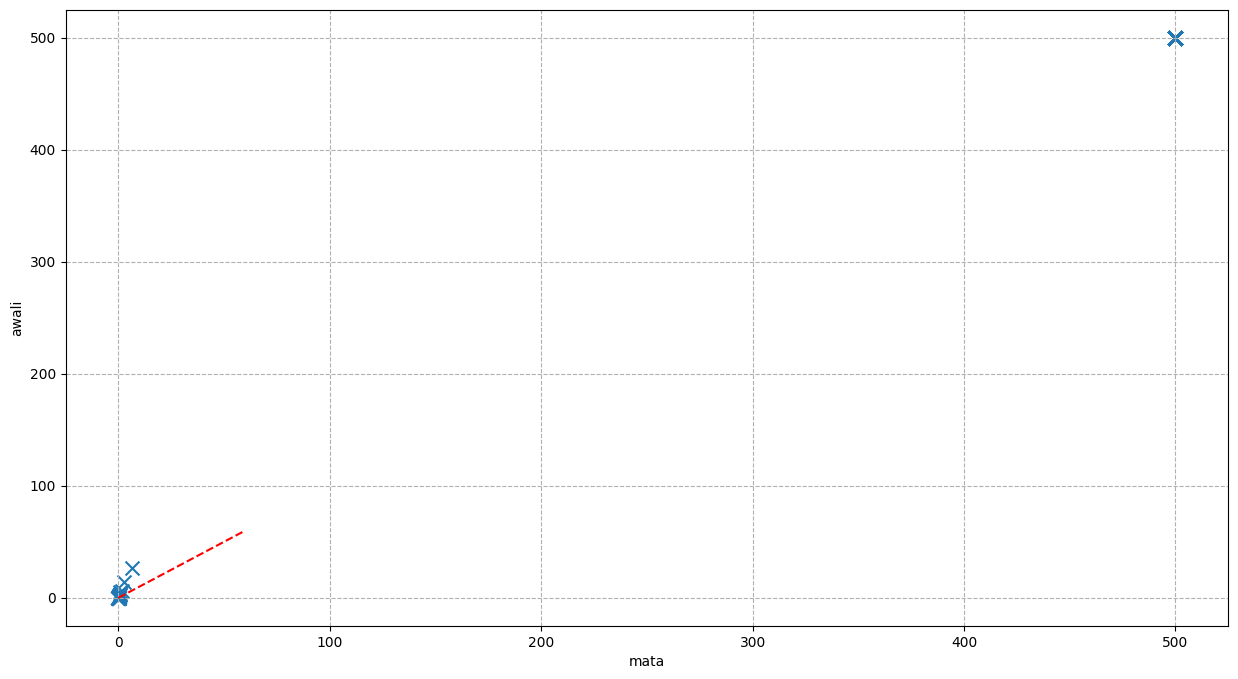

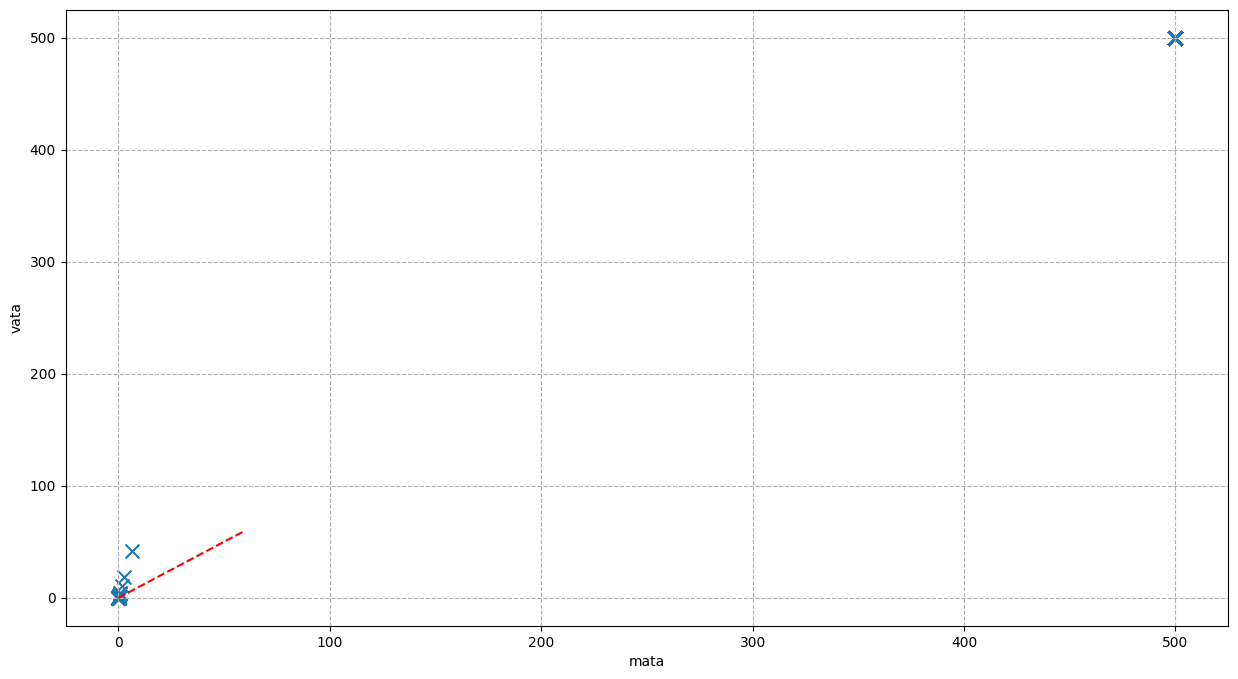

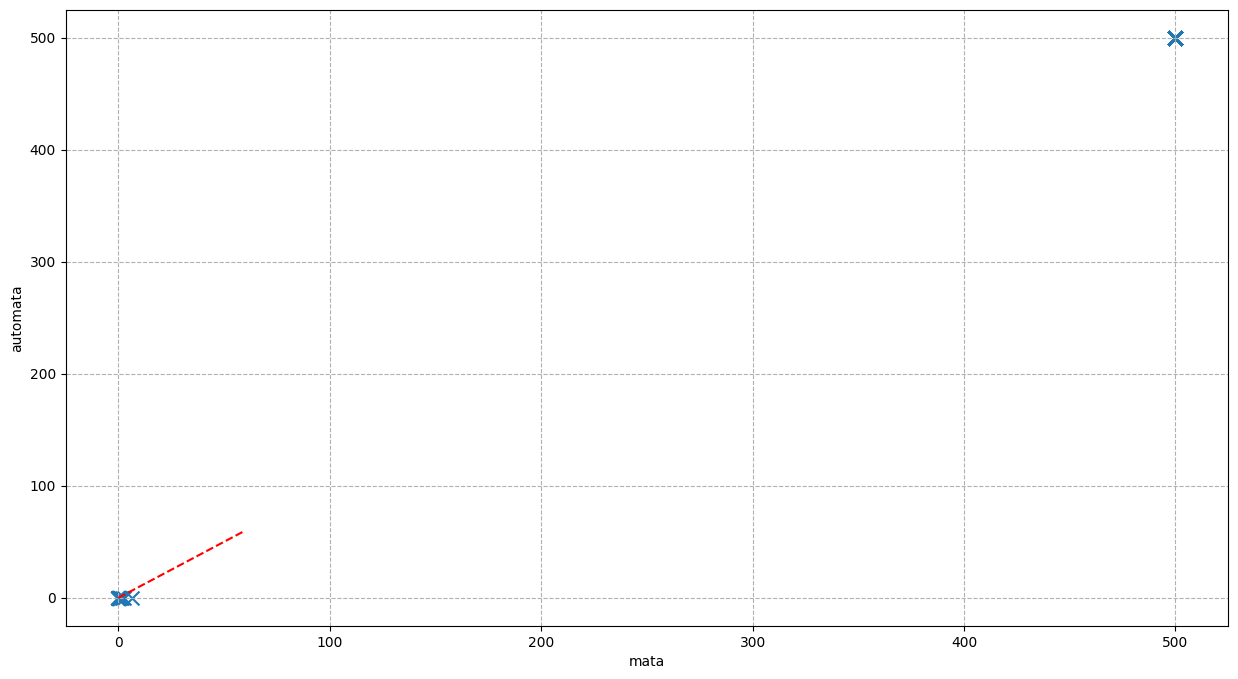

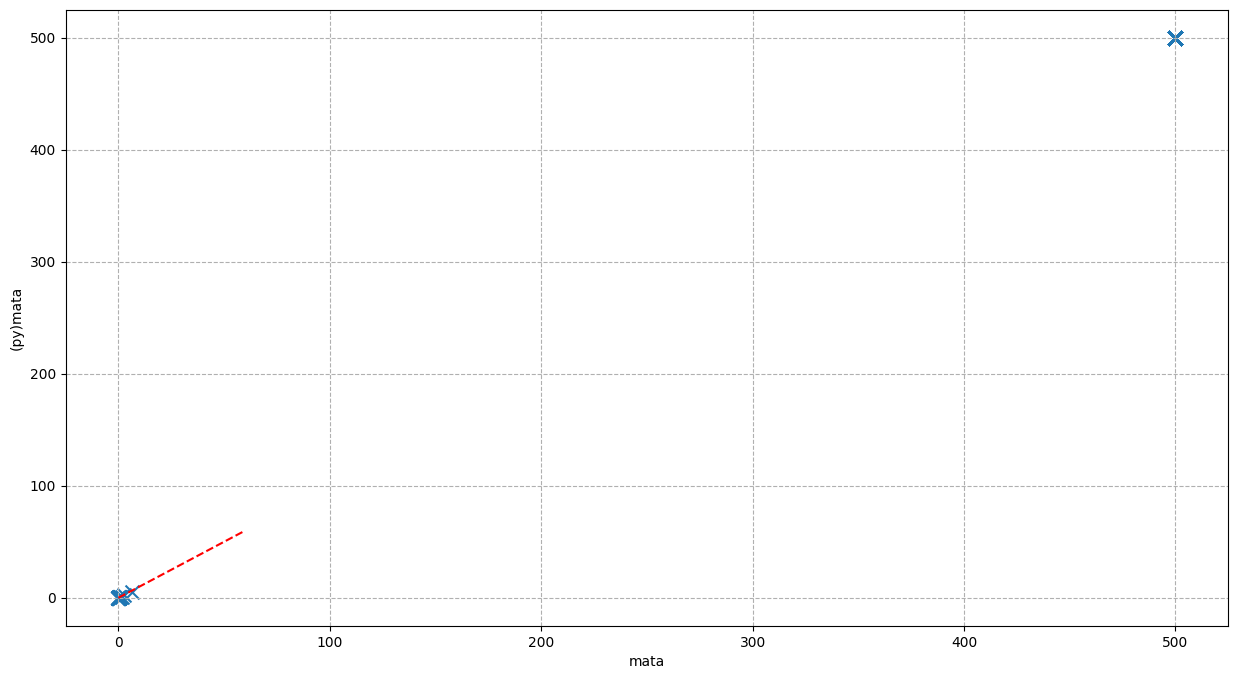

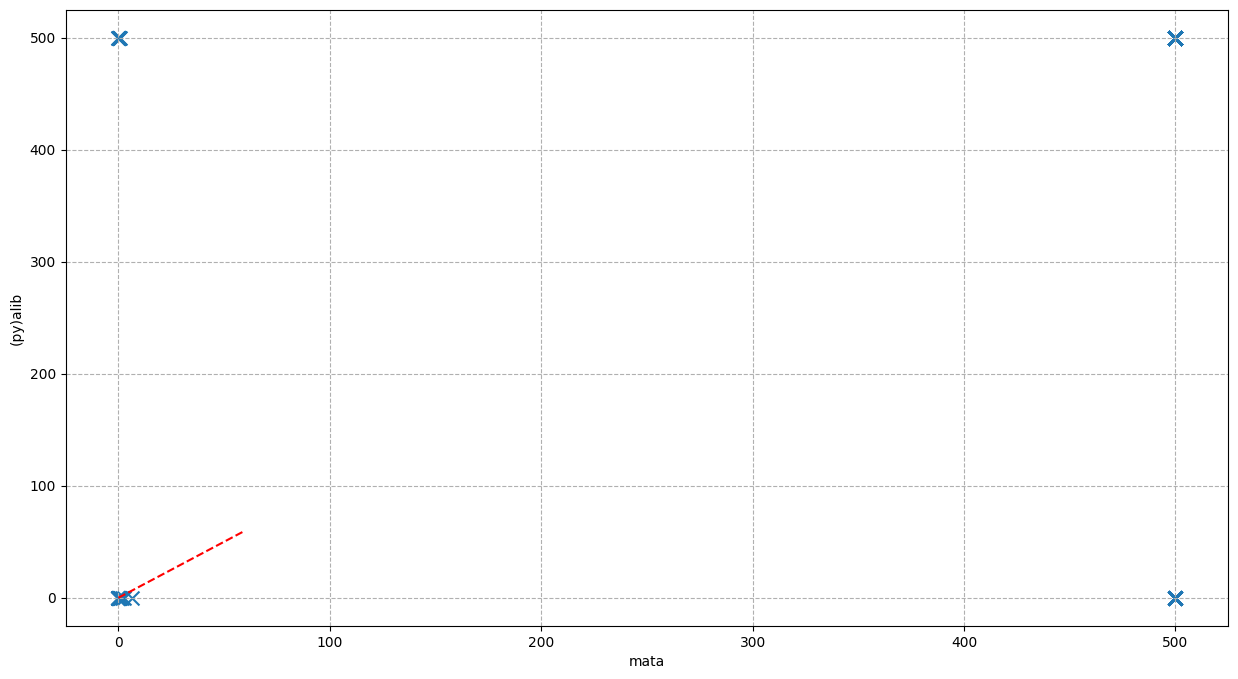

In [18]:
tools = [tool for tool in set(df['tool']) if tool != 'mata']

def to_values(series):
    return [
        a if isinstance(a, float) and not numpy.isnan(a) else TIMEOUT for a in series
    ]

for grp, series in df.groupby(['bench', 'op']):
    for tool in tools:
        s = list(series[series['tool'] == 'mata']['time'])
        ss = list(series[series['tool'] == tool]['time'])
        if len(s) == 0 or len(ss) == 0 or len(s) != len(ss):
            continue
        plt.figure(figsize=(15, 8))
        plt.scatter(
            to_values(s), to_values(ss), marker='x', s=100,
        )
        plt.grid(True, which='both', linestyle='--')
        pt = min(max(plt.xlim()[1], plt.ylim()[1]), 60)
        plt.plot([0, pt], [0, pt], linestyle='--', color='red')
        ax = plt.gca()
        ax.set_xlabel(f"mata")
        ax.set_ylabel(f"{tool}")
        save_figure(f"scatter-plot-mata-{tool}-{grp[0]}-{grp[1]}")
        #plt.show()
        
        

Saving to ./data/experiments-09-23/figs/cactus-plot-emptiness.png
Saving to ./data/experiments-09-23/figs/cactus-plot-intersection.png
Saving to ./data/experiments-09-23/figs/cactus-plot-parsing.png
Saving to ./data/experiments-09-23/figs/cactus-plot-result.png
Saving to ./data/experiments-09-23/figs/cactus-plot-runtime.png
Saving to ./data/experiments-09-23/figs/cactus-plot-transform.png
Saving to ./data/experiments-09-23/figs/cactus-plot-trim.png


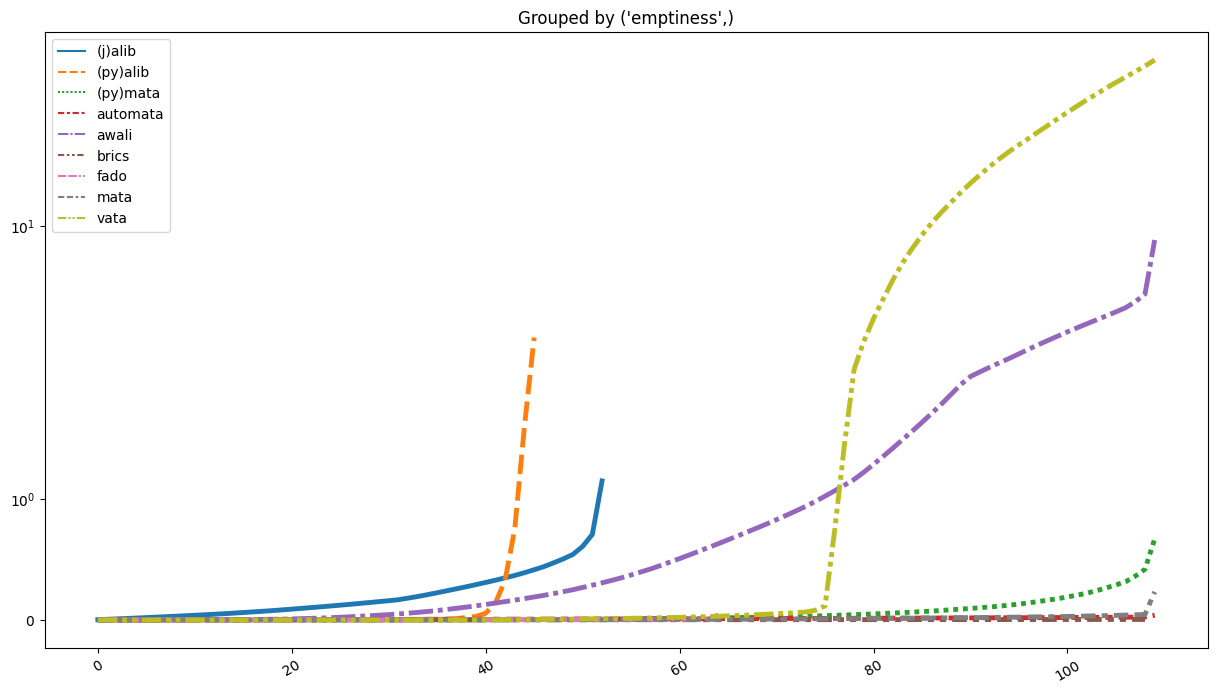

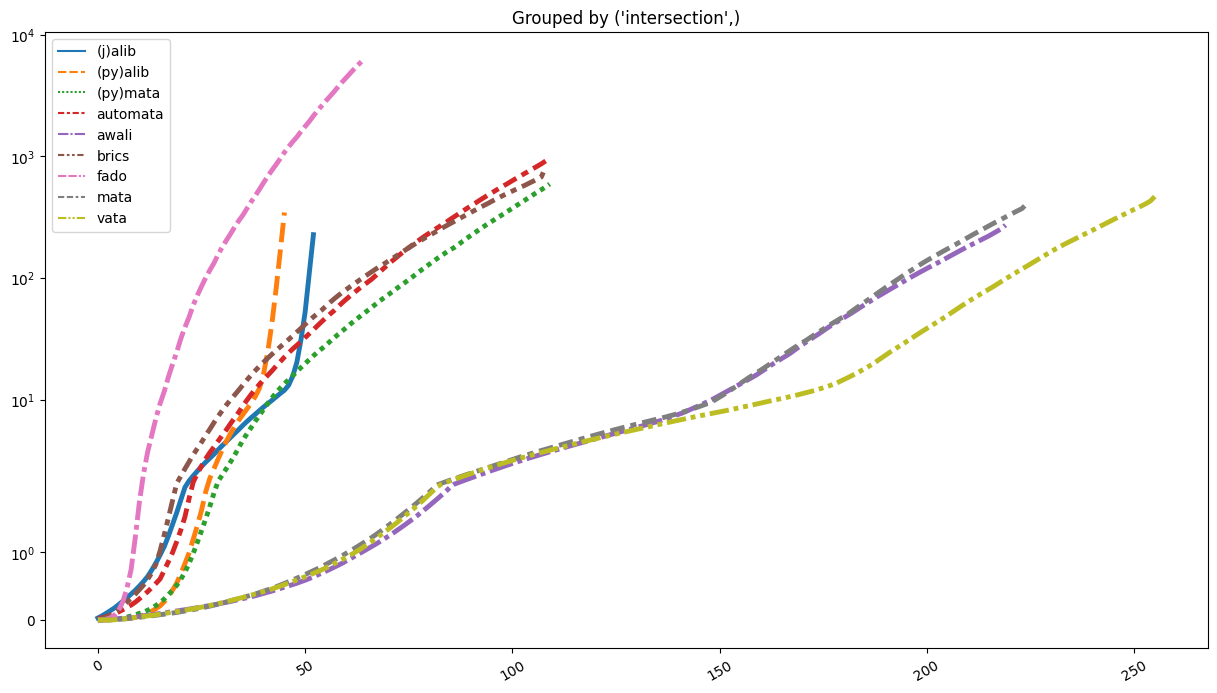

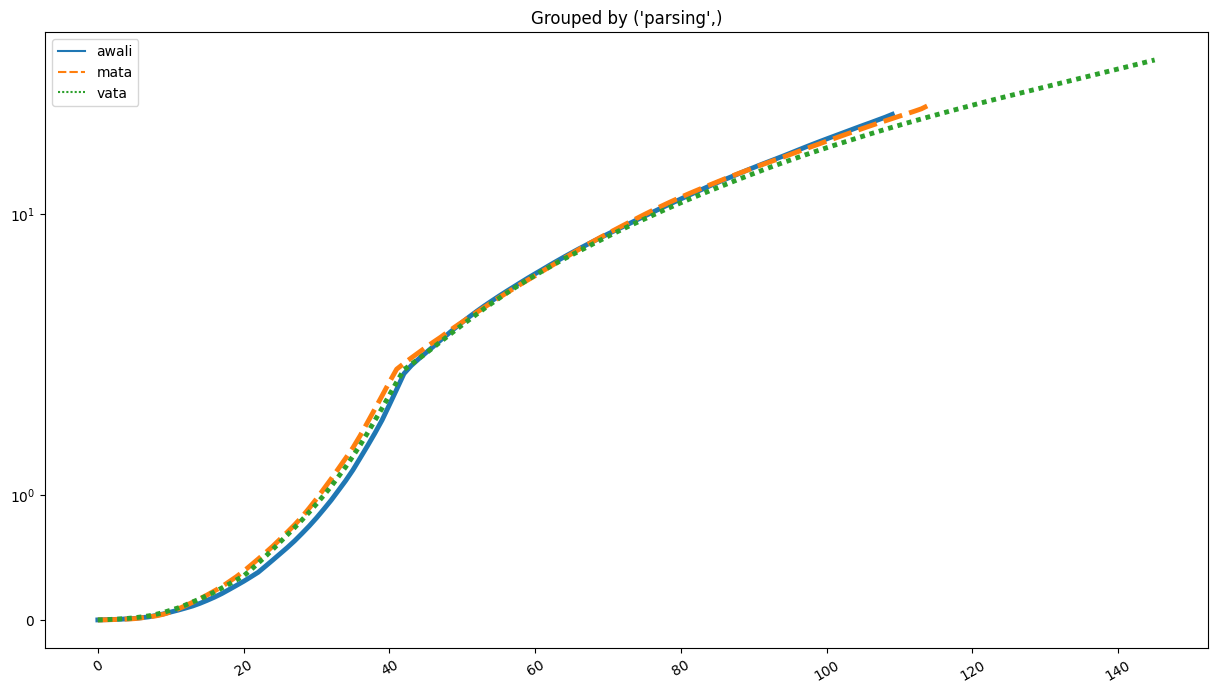

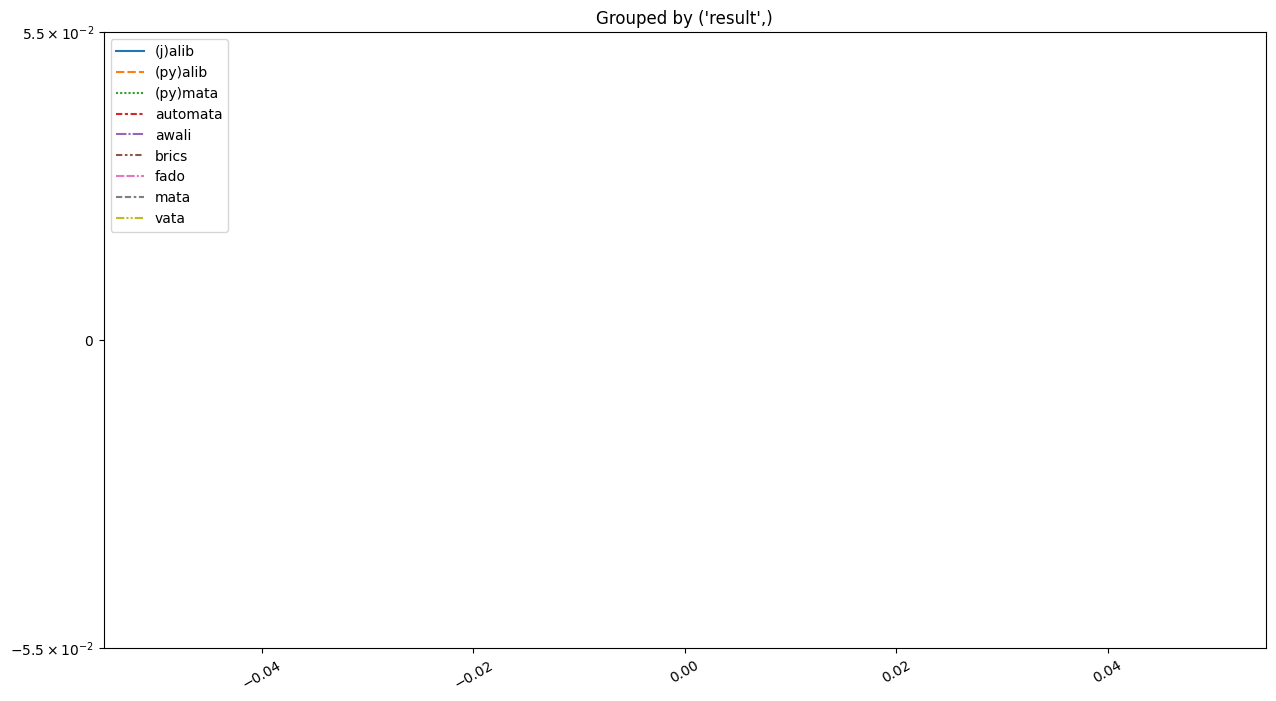

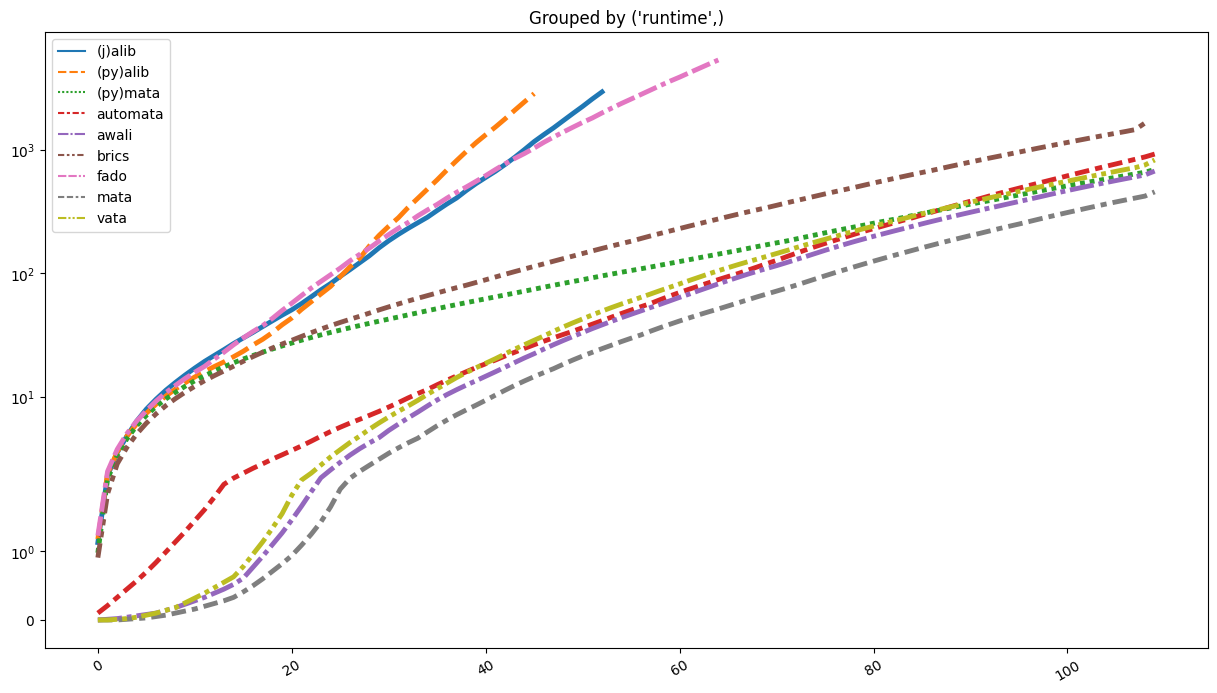

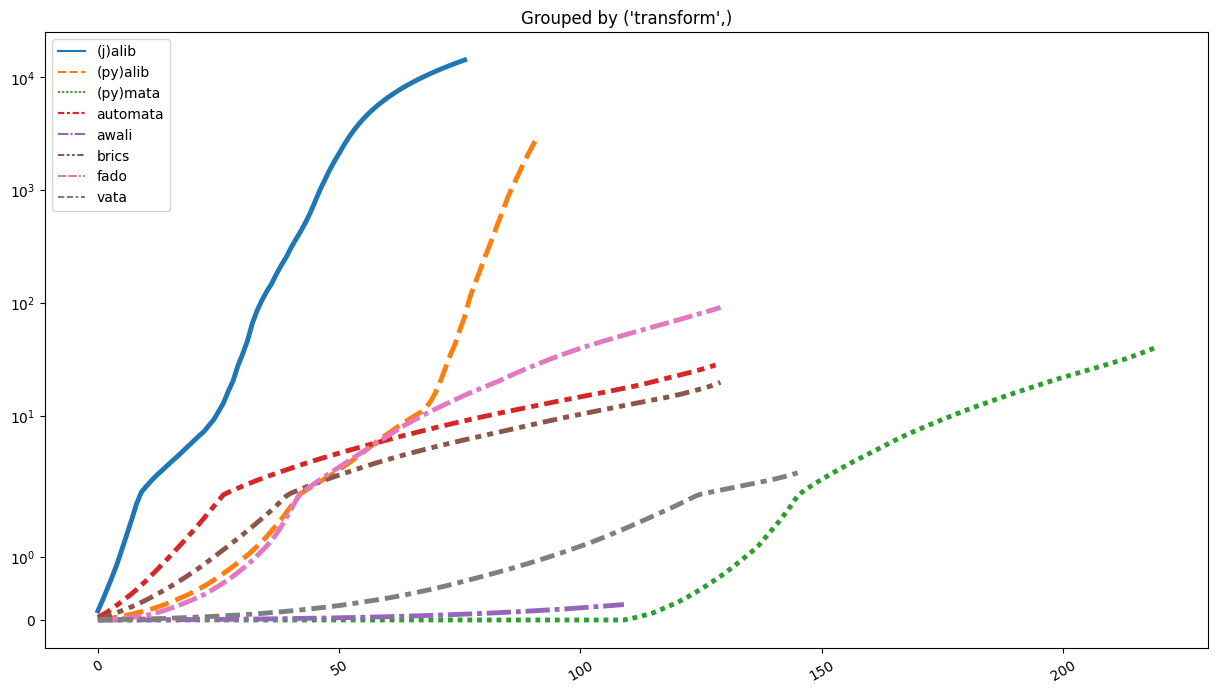

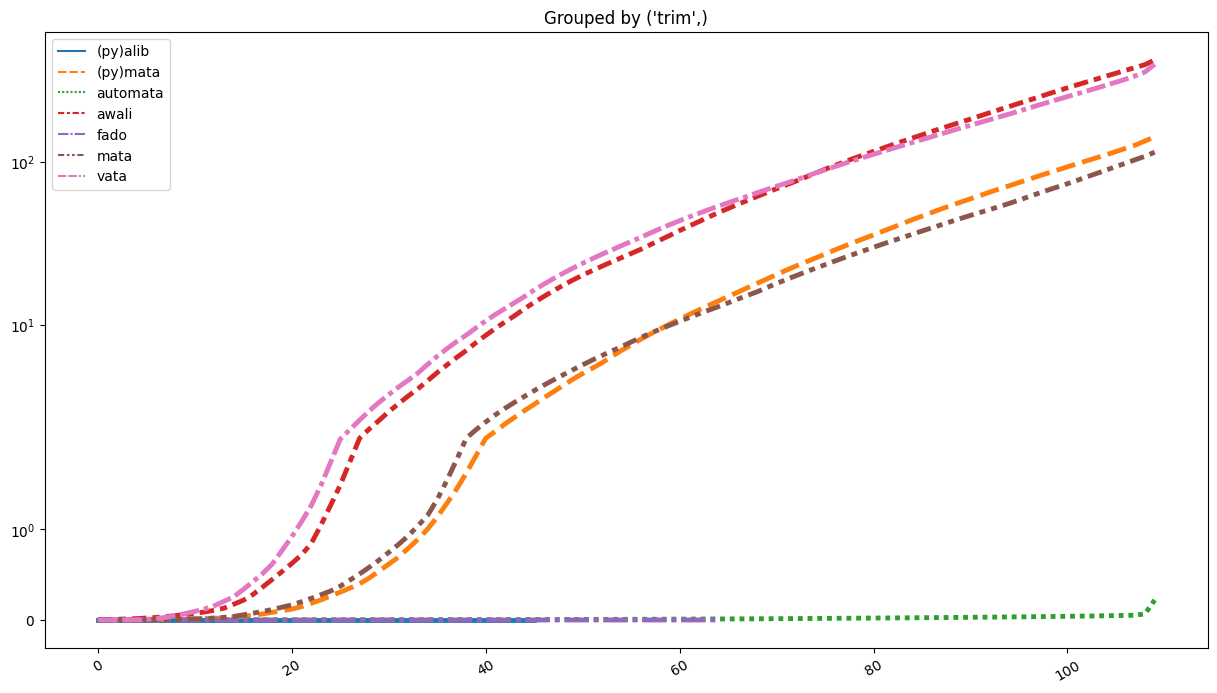

In [19]:
for grp, series in df.groupby(['op']):
    plt.figure(figsize=(15, 8))
    data = {}
    for tool, values in series.groupby('tool'):
        data[tool] = list(sum_generator(values))
        
    g = seaborn.lineplot(
        data, linewidth=3.5
    )
    g.set(yscale="symlog")
    g.set_xticklabels(g.get_xticklabels(), rotation=30)
    g.set_title(f"Grouped by {grp}")
    seaborn.move_legend(g, "upper left", bbox_to_anchor=(0., 1), frameon=True)
    save_figure(f"cactus-plot-{grp[0]}")

In [119]:
operations = set(list(df['op']))
operations

{'complement',
 'emptiness',
 'inclusion',
 'intersection',
 'parsing',
 'result',
 'runtime',
 'transform',
 'trim'}

In [127]:
tools = set(list(df['tool']))
tools

{'(j)alib',
 '(py)alib',
 '(py)mata',
 'automata',
 'awali',
 'brics',
 'fado',
 'mata',
 'vata'}

In [208]:
op_to_problem = defaultdict(set)
for op in operations:
    if op in ('result', 'trim', 'parsing', 'transform'):
        continue
    for grp, data in df[df['op'] == op].groupby('input'):
        mata_time = None
        pymata_time = None
        other_times = []
        for tool in tools:
            time = list(data[data['tool'] == tool]['time'])
            if len(time) == 1:
                if time[0] == 'ERR':
                    continue
                elif tool == 'mata':
                    mata_time = int(time[0]) if not numpy.isnan(time[0]) else abs(TIMEOUT)
                elif tool == '(py)mata':
                    pymata_time = int(time[0]) if not numpy.isnan(time[0]) else abs(TIMEOUT)
                else:
                    other_times.append(abs(int(time[0])) if not numpy.isnan(time[0]) else abs(TIMEOUT))
        if set(other_times) == {TIMEOUT} or set(other_times) == {TIMEOUT, 0} or len(set(other_times + [mata_time])) == 1:
            continue
        if pymata_time is not None and mata_time is not None and pymata_time < mata_time:
            op_to_problem['pymata_faster_than_mata'].add(op + ";" + grp + ";" + str(pymata_time) + ";" + str(mata_time))
        if pymata_time is not None and mata_time is not None and (pymata_time - mata_time) > 1:
            op_to_problem['mata_faster_than_pymata'].add(op + ";" + grp + ";" + str(mata_time) + ";" + str(pymata_time))
        if mata_time is not None and all(mata_time > tool_time for tool_time in other_times):
            op_to_problem['mata_is_slowest'].add(op + ";" + grp+ ";" + str(mata_time) + ";" + ", ".join(str(a) for a in other_times))
        if mata_time is not None and not all(mata_time < tool_time or mata_time == tool_time == TIMEOUT for tool_time in other_times) and not mata_time == 0 and op != 'trim':
            op_to_problem['mata_is_not_fastest'].add(op + ";" + grp+ ";"+ str(mata_time) + ";" + ", ".join(str(a) for a in other_times))

In [209]:
output = ""
for key in op_to_problem.keys():
    output += key + "\n"
    output += "--------------------------" + "\n"
    for problem in sorted(op_to_problem[key]):
        output += problem + "\n"
    output += "\n"
print(len(output.split('\n')))

134


In [211]:
print(output)
with open('weird-shit-experiments-09-21.txt', 'w') as shit_handle:
    shit_handle.write(output)

mata_is_not_fastest
--------------------------
complement;/home/experiments/nfa-bench/benchmarks/presburger/complement/UltimateAutomizer/Primes_true-unreach-call.c_1657.0.mata;2;0, 0, 8, 60, 0
complement;/home/experiments/nfa-bench/benchmarks/presburger/complement/UltimateAutomizer/Primes_true-unreach-call.c_798.0.mata;3;0, 0, 14, 60, 60
inclusion;/home/experiments/nfa-bench/benchmarks/automata_inclusion/true-IBakery4pBinEnc-FbOneOne-Nondet-Partial-A-2-lhs.mata,/home/experiments/nfa-bench/benchmarks/automata_inclusion/true-IBakery4pBinEnc-FbOneOne-Nondet-Partial-A-2-rhs.mata;1;0, 0, 10, 0, 0, 60
inclusion;/home/experiments/nfa-bench/benchmarks/automata_inclusion/true-IBakery4pBinEnc-FbOneOne-Nondet-Partial-A-3-lhs.mata,/home/experiments/nfa-bench/benchmarks/automata_inclusion/true-IBakery4pBinEnc-FbOneOne-Nondet-Partial-A-3-rhs.mata;1;0, 0, 17, 0, 0, 60
inclusion;/home/experiments/nfa-bench/benchmarks/automata_inclusion/true-IBakery4pBinEnc-FbOneOne-Nondet-Partiali-B-0-lhs.mata,/home/e

In [11]:
print("DONE")

DONE


In [234]:
q = df.query("tool == 'mata' & op == 'intersection' & time != 'ERR'")
intersects = [list(a) for a in q[['input', 'time']].values]
with open('costly-intersect', 'w') as ch:
    for a, b in sorted(intersects, key=lambda x: x[1], reverse=True):
        ch.write(f"{a};{b}\n")